In [1]:
from datetime import datetime, timedelta
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from simulaciones import *
from prioridad_dinamica import *
sns.set_theme()

In [34]:
df = pd.read_csv('data/muestras_clean.csv')
df = df[df["TurnoMinutosEspera"] < 100]
df = df[df["TAPRecepcionMinutos"] < 20]
df["FechaHoraLLegada"] = pd.to_datetime(df["FechaHoraLLegada"])
df.head()

,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,FechaHoraLLegada,Cajas,Prioridad
0,316483,COYOACAN,20240301,6,41684208,N015,Solicitar Estudios,06:02:44,06:13:23,13.321135,3.518992,2024-03-01 06:02:44,10,1
1,316499,COYOACAN,20240301,6,41684414,N025,Solicitar Estudios,06:09:35,06:19:43,10.130000,3.518992,2024-03-01 06:09:35,10,0
2,316515,COYOACAN,20240301,6,41684824,N038,Solicitar Estudios,06:18:16,06:30:42,12.430000,3.518992,2024-03-01 06:18:16,10,0
3,316531,COYOACAN,20240301,6,41684679,P004,Triage,06:25:09,06:27:01,1.870000,3.518992,2024-03-01 06:25:09,10,1
4,316547,COYOACAN,20240301,6,41685173,C011,Citado,06:35:09,06:37:47,2.630000,3.518992,2024-03-01 06:35:09,10,0


# Coyoacan

In [35]:
df_fechas1 = df[df["Sucursal"]=="COYOACAN"]
df_fechas1["FechaID"] = df_fechas1["FechaID"].astype(str)
fechas = df_fechas1["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

C:\Users\jajp2\AppData\Local\Temp\ipykernel_49636\3407414572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas1["FechaID"] = df_fechas1["FechaID"].astype(str)


In [36]:
simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("COYOACAN", df,i)
    df_te = simular_atencion(df_sim, cajas=11) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

06:02:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 3 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 4 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 5 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 6 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 7 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 2 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 3 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 4 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 5 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 6 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 2 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:13:00 | Caja 3 atiende ID 16 (Prioridad 1) - Es

07:19:00 | Caja 2 atiende ID 169 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 11 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 3 atiende ID 171 (Prioridad 1) - Espera: 1.0 min
07:20:00 | Caja 4 atiende ID 156 (Prioridad 0) - Espera: 5.0 min
07:20:00 | Caja 7 atiende ID 157 (Prioridad 0) - Espera: 5.0 min
07:21:00 | Caja 5 atiende ID 160 (Prioridad 0) - Espera: 6.0 min
07:21:00 | Caja 8 atiende ID 172 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 9 atiende ID 161 (Prioridad 0) - Espera: 5.0 min
07:22:00 | Caja 1 atiende ID 162 (Prioridad 0) - Espera: 6.0 min
07:22:00 | Caja 6 atiende ID 163 (Prioridad 0) - Espera: 6.0 min
07:22:00 | Caja 10 atiende ID 175 (Prioridad 1) - Espera: 1.0 min
07:23:00 | Caja 2 atiende ID 164 (Prioridad 0) - Espera: 6.0 min
07:23:00 | Caja 11 atiende ID 178 (Prioridad 1) - Espera: 1.0 min
07:24:00 | Caja 3 atiende ID 166 (Prioridad 0) - Espera: 6.0 min
07:24:00 | Caja 4 atiende ID 179 (Prioridad 1) - Espera: 1.0 min
07:24:00 | Caja 7 atie

08:32:00 | Caja 2 atiende ID 354 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 3 atiende ID 355 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 357 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 5 atiende ID 359 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 9 atiende ID 356 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 10 atiende ID 358 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 1 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 6 atiende ID 360 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 11 atiende ID 362 (Prioridad 0) - Espera: 0.0 min
08:35:00 | Caja 7 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 8 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 4 atiende ID 374 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 5 atiende ID 376 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 9 atien

09:37:00 | Caja 4 atiende ID 527 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 1 atiende ID 529 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 7 atiende ID 526 (Prioridad 0) - Espera: 1.0 min
09:38:00 | Caja 8 atiende ID 528 (Prioridad 0) - Espera: 1.0 min
09:39:00 | Caja 5 atiende ID 530 (Prioridad 0) - Espera: 1.0 min
09:39:00 | Caja 9 atiende ID 531 (Prioridad 0) - Espera: 0.0 min
09:40:00 | Caja 2 atiende ID 533 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 3 atiende ID 534 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 6 atiende ID 532 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 1 atiende ID 535 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 4 atiende ID 536 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 5 atiende ID 538 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 7 atiende ID 537 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 2 atiende ID 539 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 3 atiende ID 540 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 6 atiende

10:55:00 | Caja 3 atiende ID 685 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 4 atiende ID 684 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 6 atiende ID 686 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 687 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 7 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 8 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 5 atiende ID 690 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 9 atiende ID 691 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 2 atiende ID 693 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 10 atiende ID 692 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 11 atiende ID 694 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 3 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 4 atiende ID 695 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 1 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 2 atiende ID 698 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 5 atien

12:31:00 | Caja 3 atiende ID 820 (Prioridad 0) - Espera: 0.0 min
12:34:00 | Caja 1 atiende ID 821 (Prioridad 1) - Espera: 0.0 min
12:35:00 | Caja 2 atiende ID 822 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 3 atiende ID 823 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 4 atiende ID 824 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 5 atiende ID 825 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 6 atiende ID 826 (Prioridad 1) - Espera: 0.0 min
12:38:00 | Caja 1 atiende ID 827 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 2 atiende ID 828 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 3 atiende ID 829 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 4 atiende ID 830 (Prioridad 0) - Espera: 0.0 min
12:41:00 | Caja 5 atiende ID 831 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 1 atiende ID 832 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 2 atiende ID 833 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 6 atiende ID 834 (Prioridad 0) - Espera: 0.0 min
12:45:00 | Caja 3 atiende

14:52:00 | Caja 1 atiende ID 961 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 3 atiende ID 962 (Prioridad 0) - Espera: 0.0 min
14:52:00 | Caja 4 atiende ID 963 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 2 atiende ID 964 (Prioridad 0) - Espera: 0.0 min
14:56:00 | Caja 1 atiende ID 965 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 3 atiende ID 966 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 4 atiende ID 967 (Prioridad 0) - Espera: 0.0 min
14:58:00 | Caja 5 atiende ID 968 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 6 atiende ID 969 (Prioridad 0) - Espera: 0.0 min
14:58:00 | Caja 7 atiende ID 970 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 2 atiende ID 971 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 8 atiende ID 972 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 9 atiende ID 973 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 1 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
15:05:00 | Caja 1 atiende ID 975 (Prioridad 0) - Espera: 0.0 min
15:05:00 | Caja 2 atiende

17:57:00 | Caja 2 atiende ID 1086 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 3 atiende ID 1087 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 4 atiende ID 1088 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 4 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 5 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 6 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 7 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 3 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 4 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 8 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 5 atiende ID 12 (Prioridad 0

07:46:00 | Caja 2 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 3 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 4 atiende ID 210 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 5 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
07:48:00 | Caja 1 atiende ID 211 (Prioridad 0) - Espera: 0.0 min
07:48:00 | Caja 6 atiende ID 212 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 7 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 8 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 3 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 4 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 5 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 9 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 220 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 6 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 10 atiend

08:55:00 | Caja 5 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 1 atiende ID 365 (Prioridad 1) - Espera: 1.0 min
08:56:00 | Caja 8 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 11 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 2 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 9 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 10 atiende ID 358 (Prioridad 0) - Espera: 3.0 min
08:58:00 | Caja 3 atiende ID 370 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 4 atiende ID 362 (Prioridad 0) - Espera: 3.0 min
08:58:00 | Caja 6 atiende ID 363 (Prioridad 0) - Espera: 3.0 min
08:58:00 | Caja 7 atiende ID 364 (Prioridad 0) - Espera: 3.0 min
08:59:00 | Caja 5 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
09:00:00 | Caja 1 atiende ID 372 (Prioridad 1) - Espera: 1.0 min
09:00:00 | Caja 8 atiende ID 373 (Prioridad 1) - Espera: 1.0 min
09:00:00 | Caja 11 atiende ID 374 (Prioridad 1) - Espera: 1.0 min
09:01:00 | Caja 2 atie

09:53:00 | Caja 9 atiende ID 500 (Prioridad 0) - Espera: 1.0 min
09:53:00 | Caja 10 atiende ID 502 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 503 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 3 atiende ID 504 (Prioridad 1) - Espera: 1.0 min
09:55:00 | Caja 4 atiende ID 506 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 6 atiende ID 508 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 1 atiende ID 509 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 5 atiende ID 510 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 7 atiende ID 512 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 8 atiende ID 505 (Prioridad 0) - Espera: 2.0 min
09:56:00 | Caja 11 atiende ID 507 (Prioridad 0) - Espera: 1.0 min
09:57:00 | Caja 9 atiende ID 511 (Prioridad 0) - Espera: 1.0 min
09:57:00 | Caja 10 atiende ID 513 (Prioridad 0) - Espera: 1.0 min
09:58:00 | Caja 2 atiende ID 514 (Prioridad 0) - Espera: 1.0 min
09:59:00 | Caja 3 atiende ID 518 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 4 atie

11:10:00 | Caja 1 atiende ID 654 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 3 atiende ID 656 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 5 atiende ID 655 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 7 atiende ID 657 (Prioridad 0) - Espera: 0.0 min
11:13:00 | Caja 2 atiende ID 658 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 659 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 3 atiende ID 660 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 4 atiende ID 661 (Prioridad 1) - Espera: 0.0 min
11:16:00 | Caja 5 atiende ID 663 (Prioridad 1) - Espera: 0.0 min
11:16:00 | Caja 6 atiende ID 662 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 2 atiende ID 664 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 665 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 7 atiende ID 666 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 667 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 4 atiende ID 668 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 5 atiende

12:44:00 | Caja 5 atiende ID 784 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 6 atiende ID 785 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 786 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 2 atiende ID 787 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 3 atiende ID 788 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 4 atiende ID 790 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 5 atiende ID 791 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 6 atiende ID 789 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 792 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 2 atiende ID 794 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 7 atiende ID 793 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 795 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 1 atiende ID 796 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 2 atiende ID 798 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 4 atiende ID 797 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 5 atiende

15:07:00 | Caja 1 atiende ID 926 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 927 (Prioridad 0) - Espera: 0.0 min
15:09:00 | Caja 4 atiende ID 928 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 5 atiende ID 929 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 3 atiende ID 930 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 6 atiende ID 932 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 7 atiende ID 933 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 8 atiende ID 931 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 934 (Prioridad 1) - Espera: 0.0 min
15:16:00 | Caja 2 atiende ID 936 (Prioridad 1) - Espera: 0.0 min
15:16:00 | Caja 3 atiende ID 935 (Prioridad 0) - Espera: 0.0 min
15:17:00 | Caja 4 atiende ID 938 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 5 atiende ID 937 (Prioridad 0) - Espera: 0.0 min
15:17:00 | Caja 6 atiende ID 939 (Prioridad 0) - Espera: 0.0 min
15:19:00 | Caja 1 atiende ID 940 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 2 atiende

06:43:00 | Caja 5 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
06:45:00 | Caja 1 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
06:45:00 | Caja 6 atiende ID 97 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 2 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 3 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
06:47:00 | Caja 4 atiende ID 101 (Prioridad 0) - Espera: 0.0 min
06:48:00 | Caja 5 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
06:48:00 | Caja 7 atiende ID 103 (Prioridad 0) - Espera: 0.0 min
06:49:00 | Caja 1 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
06:51:00 | Caja 2 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 3 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 4 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
06:52:00 | Caja 5 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
06:55:00 | Caja 1 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
06:55:00 | Caja 2 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
06:56:00 | Caja 3 atiende ID 

07:47:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 9 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 10 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 11 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 3 atiende ID 249 (Prioridad 1) - Espera: 1.0 min
07:49:00 | Caja 4 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 6 atiende ID 243 (Prioridad 0) - Espera: 2.0 min
07:50:00 | Caja 5 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 7 atiende ID 251 (Prioridad 0) - Espera: 1.0 min
07:50:00 | Caja 8 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 9 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 10 atiende ID 255 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 11 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 2 ati

08:47:00 | Caja 1 atiende ID 413 (Prioridad 1) - Espera: 5.0 min
08:47:00 | Caja 9 atiende ID 414 (Prioridad 1) - Espera: 5.0 min
08:47:00 | Caja 10 atiende ID 415 (Prioridad 1) - Espera: 5.0 min
08:47:00 | Caja 11 atiende ID 397 (Prioridad 0) - Espera: 9.0 min
08:48:00 | Caja 2 atiende ID 400 (Prioridad 0) - Espera: 10.0 min
08:49:00 | Caja 3 atiende ID 405 (Prioridad 0) - Espera: 9.0 min
08:49:00 | Caja 4 atiende ID 417 (Prioridad 1) - Espera: 4.0 min
08:49:00 | Caja 6 atiende ID 419 (Prioridad 1) - Espera: 4.0 min
08:50:00 | Caja 5 atiende ID 420 (Prioridad 1) - Espera: 5.0 min
08:50:00 | Caja 7 atiende ID 409 (Prioridad 0) - Espera: 9.0 min
08:50:00 | Caja 8 atiende ID 410 (Prioridad 0) - Espera: 9.0 min
08:51:00 | Caja 1 atiende ID 423 (Prioridad 1) - Espera: 5.0 min
08:51:00 | Caja 9 atiende ID 427 (Prioridad 1) - Espera: 4.0 min
08:51:00 | Caja 10 atiende ID 416 (Prioridad 0) - Espera: 8.0 min
08:51:00 | Caja 11 atiende ID 428 (Prioridad 1) - Espera: 3.0 min
08:52:00 | Caja 2 at

09:49:00 | Caja 3 atiende ID 580 (Prioridad 1) - Espera: 7.0 min
09:49:00 | Caja 4 atiende ID 570 (Prioridad 0) - Espera: 11.0 min
09:49:00 | Caja 6 atiende ID 571 (Prioridad 0) - Espera: 10.0 min
09:50:00 | Caja 5 atiende ID 587 (Prioridad 1) - Espera: 4.0 min
09:50:00 | Caja 7 atiende ID 581 (Prioridad 0) - Espera: 8.0 min
09:50:00 | Caja 8 atiende ID 582 (Prioridad 0) - Espera: 7.0 min
09:51:00 | Caja 1 atiende ID 583 (Prioridad 0) - Espera: 8.0 min
09:51:00 | Caja 9 atiende ID 589 (Prioridad 1) - Espera: 3.0 min
09:51:00 | Caja 10 atiende ID 584 (Prioridad 0) - Espera: 7.0 min
09:51:00 | Caja 11 atiende ID 593 (Prioridad 1) - Espera: 2.0 min
09:52:00 | Caja 2 atiende ID 585 (Prioridad 0) - Espera: 7.0 min
09:53:00 | Caja 3 atiende ID 596 (Prioridad 1) - Espera: 3.0 min
09:53:00 | Caja 4 atiende ID 586 (Prioridad 0) - Espera: 7.0 min
09:53:00 | Caja 6 atiende ID 588 (Prioridad 0) - Espera: 6.0 min
09:54:00 | Caja 5 atiende ID 599 (Prioridad 1) - Espera: 2.0 min
09:54:00 | Caja 7 ati

10:55:00 | Caja 3 atiende ID 712 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 4 atiende ID 711 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 5 atiende ID 713 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 714 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 6 atiende ID 715 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 7 atiende ID 716 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 2 atiende ID 717 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 3 atiende ID 718 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 4 atiende ID 719 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 1 atiende ID 720 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 5 atiende ID 721 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 6 atiende ID 722 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 8 atiende ID 723 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 7 atiende ID 724 (Prioridad 1) - Espera: 0.0 min
11:04:00 | Caja 1 atiende ID 725 (Prioridad 0) - Espera: 0.0 min
11:05:00 | Caja 2 atiende

12:28:00 | Caja 1 atiende ID 837 (Prioridad 1) - Espera: 0.0 min
12:28:00 | Caja 2 atiende ID 838 (Prioridad 0) - Espera: 0.0 min
12:29:00 | Caja 3 atiende ID 840 (Prioridad 1) - Espera: 0.0 min
12:29:00 | Caja 4 atiende ID 839 (Prioridad 0) - Espera: 0.0 min
12:30:00 | Caja 5 atiende ID 841 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 6 atiende ID 842 (Prioridad 0) - Espera: 0.0 min
12:32:00 | Caja 1 atiende ID 843 (Prioridad 0) - Espera: 0.0 min
12:33:00 | Caja 2 atiende ID 844 (Prioridad 0) - Espera: 0.0 min
12:33:00 | Caja 3 atiende ID 845 (Prioridad 0) - Espera: 0.0 min
12:34:00 | Caja 4 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 5 atiende ID 847 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 7 atiende ID 848 (Prioridad 1) - Espera: 0.0 min
12:35:00 | Caja 6 atiende ID 850 (Prioridad 1) - Espera: 0.0 min
12:35:00 | Caja 8 atiende ID 849 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 851 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 2 atiende

14:49:00 | Caja 1 atiende ID 969 (Prioridad 1) - Espera: 0.0 min
14:50:00 | Caja 2 atiende ID 970 (Prioridad 1) - Espera: 0.0 min
14:50:00 | Caja 3 atiende ID 971 (Prioridad 0) - Espera: 0.0 min
14:50:00 | Caja 4 atiende ID 972 (Prioridad 0) - Espera: 0.0 min
14:51:00 | Caja 5 atiende ID 973 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 1 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 6 atiende ID 976 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 7 atiende ID 975 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 2 atiende ID 977 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 3 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 2 atiende ID 980 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 1 atiende ID 981 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 982 (Prioridad 0) - Espera: 0.0 min
15:08:00 | Caja 3 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
15:08:00 | Caja 4 atiende

06:16:00 | Caja 1 atiende ID 34 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 7 atiende ID 36 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 8 atiende ID 38 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 9 atiende ID 33 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 10 atiende ID 35 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 11 atiende ID 37 (Prioridad 0) - Espera: 0.0 min
06:17:00 | Caja 2 atiende ID 39 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 3 atiende ID 40 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 4 atiende ID 42 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 5 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 6 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 1 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 7 atiende ID 48 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 8 atiende ID 41 (Prioridad 0) - Espera: 2.0 min
06:20:00 | Caja 9 atiende ID 44 (Prioridad 0) - Espera: 1.0 min
06:20:00 | Caja 10 atiende ID 45 (Prio

07:23:00 | Caja 5 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
07:23:00 | Caja 7 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 1 atiende ID 182 (Prioridad 0) - Espera: 2.0 min
07:24:00 | Caja 6 atiende ID 183 (Prioridad 0) - Espera: 2.0 min
07:24:00 | Caja 8 atiende ID 184 (Prioridad 0) - Espera: 2.0 min
07:25:00 | Caja 3 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 4 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 9 atiende ID 187 (Prioridad 0) - Espera: 2.0 min
07:26:00 | Caja 2 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 10 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 11 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
07:27:00 | Caja 5 atiende ID 201 (Prioridad 1) - Espera: 1.0 min
07:27:00 | Caja 7 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 6 atiende ID 204 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 8 atien

08:17:00 | Caja 3 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 2 atiende ID 335 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 4 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 8 atiende ID 337 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 5 atiende ID 330 (Prioridad 0) - Espera: 4.0 min
08:19:00 | Caja 7 atiende ID 333 (Prioridad 0) - Espera: 2.0 min
08:19:00 | Caja 9 atiende ID 334 (Prioridad 0) - Espera: 2.0 min
08:19:00 | Caja 10 atiende ID 338 (Prioridad 0) - Espera: 0.0 min
08:20:00 | Caja 1 atiende ID 341 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 6 atiende ID 339 (Prioridad 0) - Espera: 0.0 min
08:20:00 | Caja 11 atiende ID 340 (Prioridad 0) - Espera: 0.0 min
08:21:00 | Caja 3 atiende ID 343 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 2 atiende ID 344 (Prioridad 1) - Espera: 1.0 min
08:22:00 | Caja 4 atiende ID 345 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 8 atiende ID 347 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 5 atien

09:34:00 | Caja 8 atiende ID 532 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 9 atiende ID 533 (Prioridad 0) - Espera: 0.0 min
09:34:00 | Caja 10 atiende ID 534 (Prioridad 0) - Espera: 0.0 min
09:35:00 | Caja 11 atiende ID 536 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 1 atiende ID 535 (Prioridad 0) - Espera: 1.0 min
09:36:00 | Caja 2 atiende ID 537 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 3 atiende ID 538 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 4 atiende ID 539 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 5 atiende ID 540 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 6 atiende ID 541 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 7 atiende ID 543 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 8 atiende ID 542 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 9 atiende ID 544 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 10 atiende ID 545 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 11 atiende ID 546 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 1 ati

11:06:00 | Caja 1 atiende ID 705 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 2 atiende ID 706 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 4 atiende ID 707 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 3 atiende ID 708 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 5 atiende ID 709 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 6 atiende ID 710 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 713 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 7 atiende ID 714 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 8 atiende ID 711 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 9 atiende ID 712 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 2 atiende ID 715 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 4 atiende ID 716 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 10 atiende ID 717 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 3 atiende ID 718 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 5 atiende ID 719 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 6 atiend

12:50:00 | Caja 1 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 2 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 3 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 4 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 1 atiende ID 861 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 2 atiende ID 859 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 3 atiende ID 860 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 4 atiende ID 862 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 5 atiende ID 863 (Prioridad 1) - Espera: 0.0 min
12:59:00 | Caja 6 atiende ID 864 (Prioridad 0) - Espera: 0.0 min
13:00:00 | Caja 1 atiende ID 865 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 2 atiende ID 867 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 3 atiende ID 866 (Prioridad 0) - Espera: 0.0 min
13:02:00 | Caja 4 atiende ID 868 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 5 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 6 atiende

15:34:00 | Caja 1 atiende ID 1000 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 2 atiende ID 1001 (Prioridad 0) - Espera: 0.0 min
15:36:00 | Caja 3 atiende ID 1002 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 6 atiende ID 1003 (Prioridad 0) - Espera: 0.0 min
15:37:00 | Caja 4 atiende ID 1004 (Prioridad 1) - Espera: 0.0 min
15:39:00 | Caja 1 atiende ID 1005 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 2 atiende ID 1006 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 3 atiende ID 1007 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 1 atiende ID 1008 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 2 atiende ID 1009 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 3 atiende ID 1010 (Prioridad 0) - Espera: 0.0 min
15:48:00 | Caja 4 atiende ID 1011 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 5 atiende ID 1012 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 6 atiende ID 1013 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 7 atiende ID 1014 (Prioridad 0) - Espera: 0.0 min
15:50:00 |

07:45:00 | Caja 5 atiende ID 253 (Prioridad 1) - Espera: 2.0 min
07:45:00 | Caja 7 atiende ID 254 (Prioridad 1) - Espera: 2.0 min
07:45:00 | Caja 8 atiende ID 241 (Prioridad 0) - Espera: 6.0 min
07:45:00 | Caja 9 atiende ID 257 (Prioridad 1) - Espera: 1.0 min
07:46:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 2.0 min
07:46:00 | Caja 10 atiende ID 259 (Prioridad 1) - Espera: 2.0 min
07:46:00 | Caja 11 atiende ID 245 (Prioridad 0) - Espera: 6.0 min
07:47:00 | Caja 2 atiende ID 260 (Prioridad 1) - Espera: 2.0 min
07:47:00 | Caja 3 atiende ID 261 (Prioridad 1) - Espera: 2.0 min
07:48:00 | Caja 4 atiende ID 262 (Prioridad 1) - Espera: 3.0 min
07:48:00 | Caja 6 atiende ID 247 (Prioridad 0) - Espera: 7.0 min
07:49:00 | Caja 5 atiende ID 263 (Prioridad 1) - Espera: 3.0 min
07:49:00 | Caja 7 atiende ID 264 (Prioridad 1) - Espera: 3.0 min
07:49:00 | Caja 8 atiende ID 265 (Prioridad 1) - Espera: 3.0 min
07:49:00 | Caja 9 atiende ID 266 (Prioridad 1) - Espera: 3.0 min
07:50:00 | Caja 1 atien

08:47:00 | Caja 2 atiende ID 414 (Prioridad 0) - Espera: 6.0 min
08:47:00 | Caja 3 atiende ID 415 (Prioridad 0) - Espera: 6.0 min
08:48:00 | Caja 4 atiende ID 416 (Prioridad 0) - Espera: 7.0 min
08:48:00 | Caja 6 atiende ID 417 (Prioridad 0) - Espera: 7.0 min
08:49:00 | Caja 5 atiende ID 428 (Prioridad 1) - Espera: 3.0 min
08:49:00 | Caja 7 atiende ID 429 (Prioridad 1) - Espera: 3.0 min
08:49:00 | Caja 8 atiende ID 430 (Prioridad 1) - Espera: 3.0 min
08:49:00 | Caja 9 atiende ID 431 (Prioridad 1) - Espera: 3.0 min
08:50:00 | Caja 1 atiende ID 418 (Prioridad 0) - Espera: 8.0 min
08:50:00 | Caja 10 atiende ID 432 (Prioridad 1) - Espera: 3.0 min
08:50:00 | Caja 11 atiende ID 433 (Prioridad 1) - Espera: 3.0 min
08:51:00 | Caja 2 atiende ID 421 (Prioridad 0) - Espera: 8.0 min
08:51:00 | Caja 3 atiende ID 434 (Prioridad 1) - Espera: 3.0 min
08:52:00 | Caja 4 atiende ID 435 (Prioridad 1) - Espera: 4.0 min
08:52:00 | Caja 6 atiende ID 423 (Prioridad 0) - Espera: 8.0 min
08:53:00 | Caja 5 atien

09:53:00 | Caja 3 atiende ID 572 (Prioridad 1) - Espera: 1.0 min
09:53:00 | Caja 4 atiende ID 573 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 5 atiende ID 574 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 575 (Prioridad 1) - Espera: 1.0 min
09:55:00 | Caja 6 atiende ID 576 (Prioridad 1) - Espera: 1.0 min
09:55:00 | Caja 7 atiende ID 577 (Prioridad 1) - Espera: 1.0 min
09:55:00 | Caja 8 atiende ID 578 (Prioridad 1) - Espera: 1.0 min
09:55:00 | Caja 9 atiende ID 568 (Prioridad 0) - Espera: 3.0 min
09:55:00 | Caja 10 atiende ID 570 (Prioridad 0) - Espera: 3.0 min
09:56:00 | Caja 2 atiende ID 580 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 11 atiende ID 581 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 3 atiende ID 582 (Prioridad 1) - Espera: 1.0 min
09:57:00 | Caja 4 atiende ID 583 (Prioridad 1) - Espera: 1.0 min
09:57:00 | Caja 5 atiende ID 585 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 587 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 6 atien

11:19:00 | Caja 1 atiende ID 704 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 706 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 4 atiende ID 705 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 5 atiende ID 707 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 708 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 6 atiende ID 709 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 7 atiende ID 710 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 8 atiende ID 711 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 9 atiende ID 712 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 1 atiende ID 713 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 3 atiende ID 714 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 2 atiende ID 715 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 4 atiende ID 716 (Prioridad 0) - Espera: 0.0 min
11:25:00 | Caja 5 atiende ID 717 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 6 atiende ID 718 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 7 atiende

13:08:00 | Caja 1 atiende ID 844 (Prioridad 0) - Espera: 0.0 min
13:08:00 | Caja 4 atiende ID 845 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 2 atiende ID 846 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 7 atiende ID 847 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 1 atiende ID 848 (Prioridad 0) - Espera: 0.0 min
13:14:00 | Caja 2 atiende ID 849 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 3 atiende ID 850 (Prioridad 0) - Espera: 0.0 min
13:17:00 | Caja 1 atiende ID 851 (Prioridad 0) - Espera: 0.0 min
13:18:00 | Caja 2 atiende ID 852 (Prioridad 0) - Espera: 0.0 min
13:20:00 | Caja 3 atiende ID 853 (Prioridad 0) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 854 (Prioridad 0) - Espera: 0.0 min
13:22:00 | Caja 2 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 4 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 5 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
13:23:00 | Caja 6 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
13:23:00 | Caja 7 atiende

15:48:00 | Caja 1 atiende ID 983 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 2 atiende ID 984 (Prioridad 0) - Espera: 0.0 min
15:51:00 | Caja 3 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 1 atiende ID 986 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 4 atiende ID 987 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 2 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
15:55:00 | Caja 3 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
15:55:00 | Caja 5 atiende ID 990 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 1 atiende ID 992 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 2 atiende ID 991 (Prioridad 0) - Espera: 0.0 min
15:59:00 | Caja 3 atiende ID 993 (Prioridad 1) - Espera: 0.0 min
16:00:00 | Caja 4 atiende ID 994 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 5 atiende ID 995 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 6 atiende ID 996 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 997 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 1 atiende

07:47:00 | Caja 5 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 6 atiende ID 257 (Prioridad 1) - Espera: 1.0 min
07:48:00 | Caja 7 atiende ID 258 (Prioridad 1) - Espera: 1.0 min
07:48:00 | Caja 9 atiende ID 261 (Prioridad 1) - Espera: 1.0 min
07:48:00 | Caja 10 atiende ID 254 (Prioridad 0) - Espera: 3.0 min
07:49:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 11 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 259 (Prioridad 0) - Espera: 3.0 min
07:50:00 | Caja 4 atiende ID 260 (Prioridad 0) - Espera: 3.0 min
07:51:00 | Caja 5 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 8 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 6 atiende ID 267 (Prioridad 1) - Espera: 1.0 min
07:52:00 | Caja 7 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 2 atien

08:54:00 | Caja 5 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 7 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 2 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 8 atiende ID 413 (Prioridad 0) - Espera: 3.0 min
08:55:00 | Caja 9 atiende ID 414 (Prioridad 0) - Espera: 3.0 min
08:55:00 | Caja 10 atiende ID 420 (Prioridad 0) - Espera: 1.0 min
08:56:00 | Caja 3 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 6 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 1 atiende ID 427 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 4 atiende ID 428 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 11 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 5 atiende ID 431 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 7 atiende ID 432 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 2 atiende ID 433 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 8 atiende ID 434 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 9 atien

10:20:00 | Caja 2 atiende ID 591 (Prioridad 1) - Espera: 0.0 min
10:20:00 | Caja 3 atiende ID 592 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 5 atiende ID 593 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 4 atiende ID 594 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 6 atiende ID 595 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 7 atiende ID 596 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 1 atiende ID 597 (Prioridad 0) - Espera: 0.0 min
10:25:00 | Caja 2 atiende ID 598 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 3 atiende ID 599 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 4 atiende ID 601 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 5 atiende ID 600 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 6 atiende ID 602 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 1 atiende ID 603 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 7 atiende ID 604 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 8 atiende ID 605 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 9 atiende

11:36:00 | Caja 4 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 5 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 6 atiende ID 730 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 7 atiende ID 731 (Prioridad 0) - Espera: 0.0 min
11:38:00 | Caja 8 atiende ID 733 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 734 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 735 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 3 atiende ID 736 (Prioridad 0) - Espera: 0.0 min
11:41:00 | Caja 4 atiende ID 737 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 5 atiende ID 738 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 6 atiende ID 739 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 7 atiende ID 740 (Prioridad 1) - Espera: 0.0 min
11:45:00 | Caja 1 atiende ID 741 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 2 atiende ID 743 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 3 atiende ID 742 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 4 atiende

13:30:00 | Caja 4 atiende ID 868 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 5 atiende ID 870 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 6 atiende ID 869 (Prioridad 0) - Espera: 0.0 min
13:31:00 | Caja 1 atiende ID 871 (Prioridad 1) - Espera: 0.0 min
13:33:00 | Caja 2 atiende ID 872 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 1 atiende ID 873 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 3 atiende ID 874 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 2 atiende ID 876 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 4 atiende ID 875 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 5 atiende ID 877 (Prioridad 0) - Espera: 0.0 min
13:38:00 | Caja 6 atiende ID 878 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 879 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 2 atiende ID 880 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 3 atiende ID 881 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 1 atiende ID 882 (Prioridad 0) - Espera: 0.0 min
13:45:00 | Caja 2 atiende

16:14:00 | Caja 1 atiende ID 1005 (Prioridad 0) - Espera: 0.0 min
16:15:00 | Caja 2 atiende ID 1006 (Prioridad 0) - Espera: 0.0 min
16:17:00 | Caja 3 atiende ID 1007 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 1 atiende ID 1009 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 2 atiende ID 1008 (Prioridad 0) - Espera: 0.0 min
16:21:00 | Caja 3 atiende ID 1010 (Prioridad 0) - Espera: 0.0 min
16:22:00 | Caja 4 atiende ID 1011 (Prioridad 1) - Espera: 0.0 min
16:22:00 | Caja 5 atiende ID 1012 (Prioridad 0) - Espera: 0.0 min
16:24:00 | Caja 1 atiende ID 1013 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 2 atiende ID 1014 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 3 atiende ID 1015 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 1 atiende ID 1017 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 2 atiende ID 1016 (Prioridad 0) - Espera: 0.0 min
16:34:00 | Caja 3 atiende ID 1018 (Prioridad 0) - Espera: 0.0 min
16:36:00 | Caja 4 atiende ID 1019 (Prioridad 0) - Espera: 0.0 min
16:37:00 |

07:17:00 | Caja 3 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 8 atiende ID 155 (Prioridad 0) - Espera: 3.0 min
07:18:00 | Caja 9 atiende ID 156 (Prioridad 0) - Espera: 4.0 min
07:19:00 | Caja 2 atiende ID 158 (Prioridad 0) - Espera: 4.0 min
07:19:00 | Caja 4 atiende ID 163 (Prioridad 0) - Espera: 1.0 min
07:19:00 | Caja 5 atiende ID 164 (Prioridad 0) - Espera: 1.0 min
07:20:00 | Caja 1 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 3 atiende ID 166 (Prioridad 0) - Espera: 0.0 min
07:23:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
07:23:00 | Caja 4 atiende ID 167 (Prioridad 0) - Espera: 0.0 min
07:24:00 | Caja 1 atiende ID 169 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 5 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 6 atiende ID 171 (Prioridad 0) - Espera: 0.0 min
07:25:00 | Caja 3 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 7 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 8 atiende

08:10:00 | Caja 6 atiende ID 294 (Prioridad 1) - Espera: 1.0 min
08:11:00 | Caja 7 atiende ID 278 (Prioridad 0) - Espera: 6.0 min
08:12:00 | Caja 8 atiende ID 297 (Prioridad 1) - Espera: 1.0 min
08:12:00 | Caja 9 atiende ID 285 (Prioridad 0) - Espera: 5.0 min
08:12:00 | Caja 10 atiende ID 286 (Prioridad 0) - Espera: 5.0 min
08:13:00 | Caja 1 atiende ID 300 (Prioridad 1) - Espera: 1.0 min
08:13:00 | Caja 11 atiende ID 290 (Prioridad 0) - Espera: 5.0 min
08:14:00 | Caja 2 atiende ID 304 (Prioridad 1) - Espera: 1.0 min
08:14:00 | Caja 3 atiende ID 295 (Prioridad 0) - Espera: 5.0 min
08:14:00 | Caja 4 atiende ID 305 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 5 atiende ID 306 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 6 atiende ID 308 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 7 atiende ID 309 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 8 atiende ID 310 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 9 atiende ID 311 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 10 atie

09:22:00 | Caja 1 atiende ID 474 (Prioridad 0) - Espera: 2.0 min
09:22:00 | Caja 7 atiende ID 475 (Prioridad 0) - Espera: 0.0 min
09:23:00 | Caja 2 atiende ID 476 (Prioridad 1) - Espera: 0.0 min
09:23:00 | Caja 8 atiende ID 477 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 3 atiende ID 478 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 479 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 4 atiende ID 480 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 5 atiende ID 482 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 6 atiende ID 481 (Prioridad 0) - Espera: 0.0 min
09:27:00 | Caja 2 atiende ID 483 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 7 atiende ID 484 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 8 atiende ID 485 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 9 atiende ID 486 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 10 atiende ID 487 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 11 atiende ID 488 (Prioridad 0) - Espera: 0.0 min
09:29:00 | Caja 3 atien

10:33:00 | Caja 4 atiende ID 613 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 5 atiende ID 615 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 6 atiende ID 616 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 7 atiende ID 614 (Prioridad 0) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 617 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 2 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 3 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 4 atiende ID 620 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 6 atiende ID 623 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 7 atiende ID 624 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 8 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 9 atiende ID 621 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 10 atiende ID 626 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 627 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 2 atiend

12:12:00 | Caja 3 atiende ID 764 (Prioridad 1) - Espera: 0.0 min
12:12:00 | Caja 6 atiende ID 765 (Prioridad 0) - Espera: 0.0 min
12:15:00 | Caja 1 atiende ID 766 (Prioridad 1) - Espera: 0.0 min
12:16:00 | Caja 2 atiende ID 767 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 3 atiende ID 769 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 4 atiende ID 768 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 5 atiende ID 770 (Prioridad 0) - Espera: 0.0 min
12:19:00 | Caja 1 atiende ID 771 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 6 atiende ID 773 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 7 atiende ID 774 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 8 atiende ID 772 (Prioridad 0) - Espera: 0.0 min
12:23:00 | Caja 1 atiende ID 775 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 2 atiende ID 776 (Prioridad 0) - Espera: 0.0 min
12:26:00 | Caja 3 atiende ID 777 (Prioridad 0) - Espera: 0.0 min
12:28:00 | Caja 1 atiende ID 779 (Prioridad 1) - Espera: 0.0 min
12:28:00 | Caja 4 atiende

14:15:00 | Caja 3 atiende ID 898 (Prioridad 0) - Espera: 0.0 min
14:16:00 | Caja 4 atiende ID 899 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 5 atiende ID 900 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 901 (Prioridad 0) - Espera: 0.0 min
14:23:00 | Caja 2 atiende ID 902 (Prioridad 1) - Espera: 0.0 min
14:26:00 | Caja 1 atiende ID 903 (Prioridad 0) - Espera: 0.0 min
14:26:00 | Caja 3 atiende ID 904 (Prioridad 0) - Espera: 0.0 min
14:27:00 | Caja 2 atiende ID 906 (Prioridad 1) - Espera: 0.0 min
14:27:00 | Caja 4 atiende ID 905 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 5 atiende ID 907 (Prioridad 0) - Espera: 0.0 min
14:29:00 | Caja 6 atiende ID 908 (Prioridad 0) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 909 (Prioridad 1) - Espera: 0.0 min
14:33:00 | Caja 2 atiende ID 910 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 1 atiende ID 911 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 3 atiende ID 912 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 4 atiende

17:30:00 | Caja 1 atiende ID 1029 (Prioridad 0) - Espera: 0.0 min
17:31:00 | Caja 2 atiende ID 1030 (Prioridad 1) - Espera: 0.0 min
17:31:00 | Caja 3 atiende ID 1031 (Prioridad 0) - Espera: 0.0 min
17:32:00 | Caja 4 atiende ID 1032 (Prioridad 0) - Espera: 0.0 min
17:39:00 | Caja 1 atiende ID 1033 (Prioridad 1) - Espera: 0.0 min
17:40:00 | Caja 2 atiende ID 1034 (Prioridad 0) - Espera: 0.0 min
17:42:00 | Caja 3 atiende ID 1035 (Prioridad 1) - Espera: 0.0 min
17:47:00 | Caja 1 atiende ID 1036 (Prioridad 1) - Espera: 0.0 min
17:48:00 | Caja 2 atiende ID 1037 (Prioridad 1) - Espera: 0.0 min
17:49:00 | Caja 3 atiende ID 1038 (Prioridad 1) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 1039 (Prioridad 1) - Espera: 0.0 min
17:52:00 | Caja 2 atiende ID 1040 (Prioridad 0) - Espera: 0.0 min
17:53:00 | Caja 3 atiende ID 1041 (Prioridad 0) - Espera: 0.0 min
17:58:00 | Caja 1 atiende ID 1042 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Ca

07:11:00 | Caja 2 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 3 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 4 atiende ID 148 (Prioridad 0) - Espera: 4.0 min
07:12:00 | Caja 5 atiende ID 151 (Prioridad 0) - Espera: 3.0 min
07:13:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 6 atiende ID 152 (Prioridad 0) - Espera: 4.0 min
07:13:00 | Caja 7 atiende ID 153 (Prioridad 0) - Espera: 4.0 min
07:13:00 | Caja 8 atiende ID 155 (Prioridad 0) - Espera: 2.0 min
07:13:00 | Caja 9 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
07:14:00 | Caja 10 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 11 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 2 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 3 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 4 atiende ID 166 (Prioridad 1) - Espera: 1.0 min
07:16:00 | Caja 5 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 1 atien

08:06:00 | Caja 9 atiende ID 296 (Prioridad 0) - Espera: 6.0 min
08:06:00 | Caja 10 atiende ID 298 (Prioridad 0) - Espera: 6.0 min
08:07:00 | Caja 2 atiende ID 307 (Prioridad 1) - Espera: 2.0 min
08:07:00 | Caja 3 atiende ID 308 (Prioridad 1) - Espera: 2.0 min
08:07:00 | Caja 11 atiende ID 309 (Prioridad 1) - Espera: 2.0 min
08:08:00 | Caja 4 atiende ID 310 (Prioridad 1) - Espera: 3.0 min
08:08:00 | Caja 5 atiende ID 311 (Prioridad 1) - Espera: 2.0 min
08:09:00 | Caja 1 atiende ID 303 (Prioridad 0) - Espera: 5.0 min
08:09:00 | Caja 6 atiende ID 304 (Prioridad 0) - Espera: 5.0 min
08:09:00 | Caja 7 atiende ID 306 (Prioridad 0) - Espera: 5.0 min
08:09:00 | Caja 8 atiende ID 312 (Prioridad 0) - Espera: 3.0 min
08:10:00 | Caja 9 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 10 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 2 atiende ID 319 (Prioridad 1) - Espera: 1.0 min
08:11:00 | Caja 3 atiende ID 320 (Prioridad 1) - Espera: 1.0 min
08:11:00 | Caja 11 ati

09:01:00 | Caja 7 atiende ID 448 (Prioridad 1) - Espera: 0.0 min
09:01:00 | Caja 8 atiende ID 447 (Prioridad 0) - Espera: 0.0 min
09:01:00 | Caja 9 atiende ID 449 (Prioridad 0) - Espera: 0.0 min
09:01:00 | Caja 10 atiende ID 450 (Prioridad 0) - Espera: 0.0 min
09:02:00 | Caja 1 atiende ID 451 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 11 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 2 atiende ID 453 (Prioridad 1) - Espera: 1.0 min
09:03:00 | Caja 3 atiende ID 454 (Prioridad 1) - Espera: 1.0 min
09:04:00 | Caja 4 atiende ID 455 (Prioridad 1) - Espera: 2.0 min
09:04:00 | Caja 5 atiende ID 456 (Prioridad 1) - Espera: 1.0 min
09:04:00 | Caja 6 atiende ID 457 (Prioridad 1) - Espera: 1.0 min
09:05:00 | Caja 7 atiende ID 460 (Prioridad 1) - Espera: 1.0 min
09:05:00 | Caja 8 atiende ID 458 (Prioridad 0) - Espera: 2.0 min
09:05:00 | Caja 9 atiende ID 459 (Prioridad 0) - Espera: 2.0 min
09:05:00 | Caja 10 atiende ID 461 (Prioridad 0) - Espera: 1.0 min
09:06:00 | Caja 1 atie

09:58:00 | Caja 1 atiende ID 582 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 2 atiende ID 580 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 3 atiende ID 581 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 10 atiende ID 583 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 11 atiende ID 584 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 4 atiende ID 585 (Prioridad 0) - Espera: 0.0 min
10:00:00 | Caja 5 atiende ID 586 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 6 atiende ID 587 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 7 atiende ID 588 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 8 atiende ID 589 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 9 atiende ID 590 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 1 atiende ID 592 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 2 atiende ID 593 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 3 atiende ID 591 (Prioridad 0) - Espera: 0.0 min
10:02:00 | Caja 10 atiende ID 594 (Prioridad 0) - Espera: 0.0 min
10:03:00 | Caja 4 atie

11:15:00 | Caja 1 atiende ID 719 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 2 atiende ID 718 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 3 atiende ID 720 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 4 atiende ID 721 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 5 atiende ID 722 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 1 atiende ID 723 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 724 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 3 atiende ID 725 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 6 atiende ID 726 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 4 atiende ID 727 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 1 atiende ID 728 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 2 atiende ID 729 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 3 atiende ID 731 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 4 atiende ID 730 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 2 atiende

12:59:00 | Caja 1 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
12:59:00 | Caja 8 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 2 atiende ID 847 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 1 atiende ID 848 (Prioridad 0) - Espera: 0.0 min
13:05:00 | Caja 2 atiende ID 849 (Prioridad 0) - Espera: 0.0 min
13:07:00 | Caja 3 atiende ID 850 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 4 atiende ID 851 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 1 atiende ID 852 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 2 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 3 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 4 atiende ID 854 (Prioridad 0) - Espera: 0.0 min
13:14:00 | Caja 1 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 2 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 3 atiende ID 858 (Prioridad 0) - Espera: 0.0 min
13:18:00 | Caja 1 atiende ID 859 (Prioridad 1) - Espera: 0.0 min
13:18:00 | Caja 4 atiende

15:45:00 | Caja 2 atiende ID 984 (Prioridad 0) - Espera: 0.0 min
15:48:00 | Caja 1 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 2 atiende ID 986 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 3 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 4 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 1 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 5 atiende ID 990 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 2 atiende ID 991 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 6 atiende ID 992 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 993 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 2 atiende ID 994 (Prioridad 0) - Espera: 0.0 min
15:58:00 | Caja 3 atiende ID 995 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 1 atiende ID 996 (Prioridad 0) - Espera: 0.0 min
16:02:00 | Caja 2 atiende ID 997 (Prioridad 0) - Espera: 0.0 min
16:03:00 | Caja 3 atiende ID 998 (Prioridad 0) - Espera: 0.0 min
16:05:00 | Caja 1 atiende

07:14:00 | Caja 3 atiende ID 146 (Prioridad 0) - Espera: 2.0 min
07:14:00 | Caja 7 atiende ID 149 (Prioridad 0) - Espera: 1.0 min
07:15:00 | Caja 4 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 8 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 9 atiende ID 151 (Prioridad 0) - Espera: 1.0 min
07:15:00 | Caja 10 atiende ID 152 (Prioridad 0) - Espera: 1.0 min
07:15:00 | Caja 11 atiende ID 153 (Prioridad 0) - Espera: 1.0 min
07:17:00 | Caja 1 atiende ID 158 (Prioridad 1) - Espera: 1.0 min
07:17:00 | Caja 2 atiende ID 159 (Prioridad 1) - Espera: 1.0 min
07:17:00 | Caja 5 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 6 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 3 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 7 atiende ID 155 (Prioridad 0) - Espera: 3.0 min
07:19:00 | Caja 4 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
07:19:00 | Caja 8 atiende ID 157 (Prioridad 0) - Espera: 3.0 min
07:19:00 | Caja 9 atien

08:03:00 | Caja 4 atiende ID 287 (Prioridad 1) - Espera: 2.0 min
08:03:00 | Caja 8 atiende ID 290 (Prioridad 1) - Espera: 2.0 min
08:03:00 | Caja 9 atiende ID 291 (Prioridad 1) - Espera: 2.0 min
08:03:00 | Caja 10 atiende ID 279 (Prioridad 0) - Espera: 6.0 min
08:03:00 | Caja 11 atiende ID 296 (Prioridad 1) - Espera: 1.0 min
08:05:00 | Caja 1 atiende ID 281 (Prioridad 0) - Espera: 6.0 min
08:05:00 | Caja 2 atiende ID 301 (Prioridad 1) - Espera: 1.0 min
08:05:00 | Caja 5 atiende ID 283 (Prioridad 0) - Espera: 5.0 min
08:05:00 | Caja 6 atiende ID 285 (Prioridad 0) - Espera: 5.0 min
08:06:00 | Caja 3 atiende ID 288 (Prioridad 0) - Espera: 5.0 min
08:06:00 | Caja 7 atiende ID 289 (Prioridad 0) - Espera: 5.0 min
08:07:00 | Caja 4 atiende ID 292 (Prioridad 0) - Espera: 5.0 min
08:07:00 | Caja 8 atiende ID 293 (Prioridad 0) - Espera: 5.0 min
08:07:00 | Caja 9 atiende ID 294 (Prioridad 0) - Espera: 5.0 min
08:07:00 | Caja 10 atiende ID 295 (Prioridad 0) - Espera: 5.0 min
08:07:00 | Caja 11 ati

08:57:00 | Caja 1 atiende ID 423 (Prioridad 0) - Espera: 7.0 min
08:57:00 | Caja 2 atiende ID 435 (Prioridad 1) - Espera: 2.0 min
08:57:00 | Caja 5 atiende ID 436 (Prioridad 1) - Espera: 2.0 min
08:57:00 | Caja 6 atiende ID 437 (Prioridad 1) - Espera: 2.0 min
08:58:00 | Caja 3 atiende ID 430 (Prioridad 0) - Espera: 7.0 min
08:58:00 | Caja 7 atiende ID 439 (Prioridad 1) - Espera: 2.0 min
08:59:00 | Caja 4 atiende ID 441 (Prioridad 1) - Espera: 2.0 min
08:59:00 | Caja 8 atiende ID 431 (Prioridad 0) - Espera: 6.0 min
08:59:00 | Caja 9 atiende ID 443 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 10 atiende ID 434 (Prioridad 0) - Espera: 5.0 min
08:59:00 | Caja 11 atiende ID 446 (Prioridad 1) - Espera: 0.0 min
09:01:00 | Caja 1 atiende ID 447 (Prioridad 1) - Espera: 1.0 min
09:01:00 | Caja 2 atiende ID 449 (Prioridad 1) - Espera: 1.0 min
09:01:00 | Caja 5 atiende ID 450 (Prioridad 1) - Espera: 1.0 min
09:01:00 | Caja 6 atiende ID 438 (Prioridad 0) - Espera: 5.0 min
09:02:00 | Caja 3 atien

09:59:00 | Caja 9 atiende ID 594 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 10 atiende ID 592 (Prioridad 0) - Espera: 1.0 min
10:00:00 | Caja 3 atiende ID 596 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 4 atiende ID 593 (Prioridad 0) - Espera: 2.0 min
10:01:00 | Caja 1 atiende ID 597 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 2 atiende ID 595 (Prioridad 0) - Espera: 1.0 min
10:02:00 | Caja 5 atiende ID 598 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 6 atiende ID 599 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 7 atiende ID 600 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 8 atiende ID 601 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 9 atiende ID 602 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 10 atiende ID 603 (Prioridad 0) - Espera: 0.0 min
10:04:00 | Caja 3 atiende ID 604 (Prioridad 1) - Espera: 0.0 min
10:05:00 | Caja 1 atiende ID 605 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 2 atiende ID 606 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 4 atien

11:22:00 | Caja 7 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 2 atiende ID 730 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 1 atiende ID 731 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 3 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 4 atiende ID 733 (Prioridad 0) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 734 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 735 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 3 atiende ID 736 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 4 atiende ID 737 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 5 atiende ID 738 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 1 atiende ID 739 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 2 atiende ID 740 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 3 atiende ID 741 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 4 atiende ID 742 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 5 atiende ID 743 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 1 atiende

13:31:00 | Caja 1 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 2 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 3 atiende ID 856 (Prioridad 0) - Espera: 0.0 min
13:33:00 | Caja 4 atiende ID 860 (Prioridad 1) - Espera: 0.0 min
13:33:00 | Caja 5 atiende ID 859 (Prioridad 0) - Espera: 0.0 min
13:34:00 | Caja 6 atiende ID 861 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 1 atiende ID 862 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 2 atiende ID 863 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 3 atiende ID 864 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 4 atiende ID 865 (Prioridad 0) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 866 (Prioridad 0) - Espera: 0.0 min
13:40:00 | Caja 2 atiende ID 867 (Prioridad 0) - Espera: 0.0 min
13:42:00 | Caja 3 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 4 atiende ID 870 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 5 atiende ID 868 (Prioridad 0) - Espera: 0.0 min
13:44:00 | Caja 1 atiende

16:13:00 | Caja 1 atiende ID 983 (Prioridad 0) - Espera: 0.0 min
16:13:00 | Caja 2 atiende ID 984 (Prioridad 0) - Espera: 0.0 min
16:17:00 | Caja 1 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
16:17:00 | Caja 2 atiende ID 986 (Prioridad 0) - Espera: 0.0 min
16:18:00 | Caja 3 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
16:20:00 | Caja 4 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 5 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 6 atiende ID 990 (Prioridad 1) - Espera: 0.0 min
16:21:00 | Caja 1 atiende ID 991 (Prioridad 0) - Espera: 0.0 min
16:23:00 | Caja 2 atiende ID 992 (Prioridad 0) - Espera: 0.0 min
16:24:00 | Caja 3 atiende ID 993 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 1 atiende ID 995 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 4 atiende ID 994 (Prioridad 0) - Espera: 0.0 min
16:26:00 | Caja 5 atiende ID 996 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 2 atiende ID 997 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 6 atiende

07:21:00 | Caja 1 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 11 atiende ID 165 (Prioridad 0) - Espera: 4.0 min
07:22:00 | Caja 3 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 4 atiende ID 170 (Prioridad 0) - Espera: 4.0 min
07:22:00 | Caja 5 atiende ID 174 (Prioridad 0) - Espera: 3.0 min
07:22:00 | Caja 6 atiende ID 176 (Prioridad 0) - Espera: 2.0 min
07:23:00 | Caja 7 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
07:23:00 | Caja 8 atiende ID 177 (Prioridad 0) - Espera: 3.0 min
07:23:00 | Caja 9 atiende ID 179 (Prioridad 0) - Espera: 2.0 min
07:24:00 | Caja 2 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 10 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 1 atiende ID 181 (Prioridad 0) - Espera: 2.0 min
07:25:00 | Caja 11 atiende ID 183 (Prioridad 0) - Espera: 1.0 min
07:26:00 | Caja 3 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 4 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 5 atie

08:16:00 | Caja 2 atiende ID 322 (Prioridad 0) - Espera: 2.0 min
08:16:00 | Caja 10 atiende ID 324 (Prioridad 0) - Espera: 2.0 min
08:17:00 | Caja 1 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 11 atiende ID 325 (Prioridad 0) - Espera: 3.0 min
08:18:00 | Caja 3 atiende ID 330 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 4 atiende ID 331 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 5 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 6 atiende ID 334 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 7 atiende ID 326 (Prioridad 0) - Espera: 4.0 min
08:19:00 | Caja 8 atiende ID 333 (Prioridad 0) - Espera: 1.0 min
08:19:00 | Caja 9 atiende ID 335 (Prioridad 0) - Espera: 0.0 min
08:20:00 | Caja 2 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 10 atiende ID 337 (Prioridad 0) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 338 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 3 atiende ID 339 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 4 atie

09:09:00 | Caja 1 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 10 atiende ID 453 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 11 atiende ID 451 (Prioridad 0) - Espera: 1.0 min
09:10:00 | Caja 4 atiende ID 455 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 5 atiende ID 456 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 6 atiende ID 454 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 3 atiende ID 457 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 7 atiende ID 458 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 8 atiende ID 459 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 460 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 2 atiende ID 461 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 3 atiende ID 462 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 4 atiende ID 463 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 5 atiende ID 464 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 6 atiende ID 465 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 7 atien

10:07:00 | Caja 3 atiende ID 581 (Prioridad 1) - Espera: 1.0 min
10:07:00 | Caja 4 atiende ID 585 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 5 atiende ID 578 (Prioridad 0) - Espera: 2.0 min
10:07:00 | Caja 6 atiende ID 582 (Prioridad 0) - Espera: 0.0 min
10:08:00 | Caja 7 atiende ID 586 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 8 atiende ID 587 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 9 atiende ID 588 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 10 atiende ID 583 (Prioridad 0) - Espera: 1.0 min
10:09:00 | Caja 1 atiende ID 589 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 2 atiende ID 584 (Prioridad 0) - Espera: 2.0 min
10:09:00 | Caja 11 atiende ID 590 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 3 atiende ID 592 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 4 atiende ID 591 (Prioridad 0) - Espera: 0.0 min
10:12:00 | Caja 5 atiende ID 593 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 1 atiende ID 595 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 2 atien

11:24:00 | Caja 2 atiende ID 717 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 6 atiende ID 719 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 7 atiende ID 718 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 3 atiende ID 720 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 8 atiende ID 721 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 1 atiende ID 722 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 4 atiende ID 723 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 2 atiende ID 725 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 5 atiende ID 724 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 3 atiende ID 726 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 6 atiende ID 727 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 728 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 4 atiende ID 729 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 7 atiende ID 730 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 8 atiende ID 731 (Prioridad 0) - Espera: 0.0 min
11:32:00 | Caja 9 atiende

13:21:00 | Caja 1 atiende ID 865 (Prioridad 0) - Espera: 0.0 min
13:21:00 | Caja 2 atiende ID 866 (Prioridad 0) - Espera: 0.0 min
13:22:00 | Caja 4 atiende ID 867 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 7 atiende ID 868 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 3 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 870 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 871 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 3 atiende ID 872 (Prioridad 0) - Espera: 0.0 min
13:30:00 | Caja 4 atiende ID 873 (Prioridad 1) - Espera: 0.0 min
13:32:00 | Caja 1 atiende ID 874 (Prioridad 1) - Espera: 0.0 min
13:32:00 | Caja 2 atiende ID 875 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 3 atiende ID 876 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 1 atiende ID 877 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 2 atiende ID 878 (Prioridad 0) - Espera: 0.0 min
13:38:00 | Caja 3 atiende ID 879 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 1 atiende

15:50:00 | Caja 1 atiende ID 999 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 4 atiende ID 998 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 2 atiende ID 1000 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 3 atiende ID 1001 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 5 atiende ID 1002 (Prioridad 0) - Espera: 0.0 min
15:54:00 | Caja 1 atiende ID 1003 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 4 atiende ID 1004 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 6 atiende ID 1005 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 2 atiende ID 1006 (Prioridad 0) - Espera: 0.0 min
15:58:00 | Caja 1 atiende ID 1007 (Prioridad 0) - Espera: 0.0 min
15:58:00 | Caja 3 atiende ID 1008 (Prioridad 0) - Espera: 0.0 min
16:02:00 | Caja 1 atiende ID 1009 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 2 atiende ID 1010 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 3 atiende ID 1011 (Prioridad 1) - Espera: 0.0 min
16:05:00 | Caja 4 atiende ID 1012 (Prioridad 0) - Espera: 0.0 min
16:06:00 | C

06:50:00 | Caja 4 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
06:50:00 | Caja 5 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
06:51:00 | Caja 3 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 6 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
06:51:00 | Caja 7 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
06:54:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
06:55:00 | Caja 2 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 3 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 1 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 4 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 5 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 6 atiende ID 124 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 2 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 7 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 8 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 3 atiende

07:45:00 | Caja 6 atiende ID 254 (Prioridad 1) - Espera: 3.0 min
07:45:00 | Caja 7 atiende ID 255 (Prioridad 1) - Espera: 3.0 min
07:45:00 | Caja 8 atiende ID 238 (Prioridad 0) - Espera: 7.0 min
07:45:00 | Caja 9 atiende ID 240 (Prioridad 0) - Espera: 7.0 min
07:46:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 3.0 min
07:46:00 | Caja 4 atiende ID 259 (Prioridad 1) - Espera: 3.0 min
07:46:00 | Caja 11 atiende ID 243 (Prioridad 0) - Espera: 7.0 min
07:47:00 | Caja 2 atiende ID 244 (Prioridad 0) - Espera: 8.0 min
07:47:00 | Caja 10 atiende ID 260 (Prioridad 1) - Espera: 3.0 min
07:48:00 | Caja 3 atiende ID 262 (Prioridad 1) - Espera: 4.0 min
07:48:00 | Caja 5 atiende ID 263 (Prioridad 1) - Espera: 4.0 min
07:49:00 | Caja 6 atiende ID 245 (Prioridad 0) - Espera: 9.0 min
07:49:00 | Caja 7 atiende ID 248 (Prioridad 0) - Espera: 9.0 min
07:49:00 | Caja 8 atiende ID 264 (Prioridad 1) - Espera: 4.0 min
07:49:00 | Caja 9 atiende ID 266 (Prioridad 1) - Espera: 4.0 min
07:50:00 | Caja 1 atien

08:46:00 | Caja 1 atiende ID 414 (Prioridad 0) - Espera: 2.0 min
08:46:00 | Caja 4 atiende ID 417 (Prioridad 0) - Espera: 1.0 min
08:46:00 | Caja 11 atiende ID 418 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 2 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 10 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 3 atiende ID 425 (Prioridad 1) - Espera: 1.0 min
08:48:00 | Caja 5 atiende ID 426 (Prioridad 1) - Espera: 1.0 min
08:49:00 | Caja 6 atiende ID 427 (Prioridad 1) - Espera: 1.0 min
08:49:00 | Caja 7 atiende ID 428 (Prioridad 1) - Espera: 1.0 min
08:49:00 | Caja 8 atiende ID 430 (Prioridad 1) - Espera: 1.0 min
08:49:00 | Caja 9 atiende ID 431 (Prioridad 1) - Espera: 1.0 min
08:50:00 | Caja 1 atiende ID 432 (Prioridad 1) - Espera: 1.0 min
08:50:00 | Caja 4 atiende ID 433 (Prioridad 1) - Espera: 1.0 min
08:50:00 | Caja 11 atiende ID 434 (Prioridad 1) - Espera: 1.0 min
08:51:00 | Caja 2 atiende ID 439 (Prioridad 1) - Espera: 1.0 min
08:51:00 | Caja 10 ati

09:39:00 | Caja 4 atiende ID 545 (Prioridad 1) - Espera: 1.0 min
09:39:00 | Caja 5 atiende ID 546 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 547 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 2 atiende ID 548 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 3 atiende ID 549 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 6 atiende ID 552 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 7 atiende ID 550 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 8 atiende ID 551 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 9 atiende ID 553 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 4 atiende ID 554 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 1 atiende ID 556 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 5 atiende ID 557 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 10 atiende ID 558 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 11 atiende ID 555 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 560 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 3 atien

11:01:00 | Caja 3 atiende ID 705 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 5 atiende ID 706 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 1 atiende ID 707 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 2 atiende ID 708 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 4 atiende ID 711 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 6 atiende ID 709 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 7 atiende ID 710 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 8 atiende ID 712 (Prioridad 1) - Espera: 0.0 min
11:04:00 | Caja 9 atiende ID 714 (Prioridad 1) - Espera: 0.0 min
11:04:00 | Caja 10 atiende ID 713 (Prioridad 0) - Espera: 0.0 min
11:06:00 | Caja 1 atiende ID 715 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 2 atiende ID 716 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 3 atiende ID 718 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 4 atiende ID 717 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 719 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 5 atiend

12:40:00 | Caja 3 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 8 atiende ID 844 (Prioridad 0) - Espera: 0.0 min
12:41:00 | Caja 9 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
12:42:00 | Caja 1 atiende ID 849 (Prioridad 1) - Espera: 0.0 min
12:42:00 | Caja 4 atiende ID 847 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 5 atiende ID 848 (Prioridad 0) - Espera: 0.0 min
12:43:00 | Caja 2 atiende ID 850 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 852 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 3 atiende ID 851 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 2 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 4 atiende ID 854 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 5 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 6 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 7 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 1 atiende ID 858 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 2 atiende

15:28:00 | Caja 2 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 3 atiende ID 979 (Prioridad 0) - Espera: 0.0 min
15:31:00 | Caja 1 atiende ID 980 (Prioridad 1) - Espera: 0.0 min
15:32:00 | Caja 2 atiende ID 981 (Prioridad 0) - Espera: 0.0 min
15:34:00 | Caja 3 atiende ID 982 (Prioridad 1) - Espera: 0.0 min
15:34:00 | Caja 4 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 1 atiende ID 984 (Prioridad 1) - Espera: 0.0 min
15:37:00 | Caja 2 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 3 atiende ID 986 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 4 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 1 atiende ID 988 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 2 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 3 atiende ID 990 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 1 atiende ID 992 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 4 atiende ID 991 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 2 atiende

07:26:00 | Caja 10 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 11 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
07:27:00 | Caja 1 atiende ID 192 (Prioridad 1) - Espera: 1.0 min
07:27:00 | Caja 2 atiende ID 193 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 3 atiende ID 194 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 4 atiende ID 184 (Prioridad 0) - Espera: 5.0 min
07:28:00 | Caja 7 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
07:29:00 | Caja 5 atiende ID 186 (Prioridad 0) - Espera: 5.0 min
07:29:00 | Caja 6 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
07:29:00 | Caja 8 atiende ID 187 (Prioridad 0) - Espera: 4.0 min
07:29:00 | Caja 9 atiende ID 196 (Prioridad 0) - Espera: 1.0 min
07:30:00 | Caja 10 atiende ID 197 (Prioridad 0) - Espera: 1.0 min
07:30:00 | Caja 11 atiende ID 198 (Prioridad 0) - Espera: 1.0 min
07:31:00 | Caja 1 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 2 atiende ID 200 (Prioridad 0) - Espera: 1.0 min
07:32:00 | Caja 3 ati

08:25:00 | Caja 4 atiende ID 338 (Prioridad 1) - Espera: 4.0 min
08:25:00 | Caja 7 atiende ID 339 (Prioridad 1) - Espera: 4.0 min
08:25:00 | Caja 8 atiende ID 340 (Prioridad 1) - Espera: 4.0 min
08:25:00 | Caja 9 atiende ID 323 (Prioridad 0) - Espera: 8.0 min
08:25:00 | Caja 10 atiende ID 341 (Prioridad 1) - Espera: 3.0 min
08:26:00 | Caja 3 atiende ID 343 (Prioridad 1) - Espera: 3.0 min
08:26:00 | Caja 5 atiende ID 327 (Prioridad 0) - Espera: 7.0 min
08:26:00 | Caja 6 atiende ID 328 (Prioridad 0) - Espera: 7.0 min
08:26:00 | Caja 11 atiende ID 329 (Prioridad 0) - Espera: 7.0 min
08:27:00 | Caja 1 atiende ID 330 (Prioridad 0) - Espera: 8.0 min
08:28:00 | Caja 2 atiende ID 332 (Prioridad 0) - Espera: 9.0 min
08:29:00 | Caja 4 atiende ID 345 (Prioridad 1) - Espera: 5.0 min
08:29:00 | Caja 7 atiende ID 346 (Prioridad 1) - Espera: 5.0 min
08:29:00 | Caja 8 atiende ID 347 (Prioridad 1) - Espera: 5.0 min
08:29:00 | Caja 9 atiende ID 349 (Prioridad 1) - Espera: 4.0 min
08:29:00 | Caja 10 atie

09:18:00 | Caja 3 atiende ID 484 (Prioridad 1) - Espera: 2.0 min
09:18:00 | Caja 5 atiende ID 477 (Prioridad 0) - Espera: 6.0 min
09:18:00 | Caja 6 atiende ID 478 (Prioridad 0) - Espera: 6.0 min
09:18:00 | Caja 11 atiende ID 487 (Prioridad 1) - Espera: 1.0 min
09:19:00 | Caja 1 atiende ID 488 (Prioridad 1) - Espera: 1.0 min
09:20:00 | Caja 2 atiende ID 489 (Prioridad 1) - Espera: 2.0 min
09:21:00 | Caja 4 atiende ID 482 (Prioridad 0) - Espera: 6.0 min
09:21:00 | Caja 7 atiende ID 483 (Prioridad 0) - Espera: 6.0 min
09:21:00 | Caja 8 atiende ID 492 (Prioridad 1) - Espera: 1.0 min
09:21:00 | Caja 9 atiende ID 494 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 10 atiende ID 485 (Prioridad 0) - Espera: 4.0 min
09:22:00 | Caja 3 atiende ID 486 (Prioridad 0) - Espera: 5.0 min
09:22:00 | Caja 5 atiende ID 496 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 6 atiende ID 497 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 11 atiende ID 490 (Prioridad 0) - Espera: 3.0 min
09:23:00 | Caja 1 atie

10:07:00 | Caja 1 atiende ID 610 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 4 atiende ID 603 (Prioridad 0) - Espera: 1.0 min
10:08:00 | Caja 2 atiende ID 611 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 5 atiende ID 612 (Prioridad 1) - Espera: 1.0 min
10:09:00 | Caja 6 atiende ID 613 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 7 atiende ID 605 (Prioridad 0) - Espera: 3.0 min
10:09:00 | Caja 8 atiende ID 606 (Prioridad 0) - Espera: 3.0 min
10:10:00 | Caja 3 atiende ID 614 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 9 atiende ID 615 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 10 atiende ID 616 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 1 atiende ID 617 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 4 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 2 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 11 atiende ID 620 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 5 atiende ID 621 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 6 atien

11:36:00 | Caja 2 atiende ID 748 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 3 atiende ID 749 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 1 atiende ID 750 (Prioridad 0) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 751 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 4 atiende ID 752 (Prioridad 0) - Espera: 0.0 min
11:41:00 | Caja 5 atiende ID 753 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 3 atiende ID 754 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 6 atiende ID 755 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 7 atiende ID 756 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 8 atiende ID 757 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 758 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 9 atiende ID 759 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 10 atiende ID 760 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 2 atiende ID 761 (Prioridad 1) - Espera: 0.0 min
11:45:00 | Caja 4 atiende ID 762 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 3 atiend

13:19:00 | Caja 1 atiende ID 875 (Prioridad 1) - Espera: 0.0 min
13:19:00 | Caja 7 atiende ID 876 (Prioridad 1) - Espera: 0.0 min
13:20:00 | Caja 2 atiende ID 877 (Prioridad 1) - Espera: 0.0 min
13:26:00 | Caja 1 atiende ID 878 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 2 atiende ID 879 (Prioridad 0) - Espera: 0.0 min
13:28:00 | Caja 3 atiende ID 880 (Prioridad 0) - Espera: 0.0 min
13:29:00 | Caja 4 atiende ID 881 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 1 atiende ID 882 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 5 atiende ID 883 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 2 atiende ID 884 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 3 atiende ID 885 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 6 atiende ID 886 (Prioridad 0) - Espera: 0.0 min
13:34:00 | Caja 1 atiende ID 887 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 2 atiende ID 888 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 3 atiende ID 889 (Prioridad 1) - Espera: 0.0 min
13:38:00 | Caja 1 atiende

15:49:00 | Caja 5 atiende ID 1003 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 6 atiende ID 1002 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 1004 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 2 atiende ID 1005 (Prioridad 0) - Espera: 0.0 min
15:51:00 | Caja 3 atiende ID 1006 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 4 atiende ID 1007 (Prioridad 0) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 1008 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 2 atiende ID 1009 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 3 atiende ID 1010 (Prioridad 0) - Espera: 0.0 min
16:02:00 | Caja 1 atiende ID 1011 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 1 atiende ID 1013 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 2 atiende ID 1012 (Prioridad 0) - Espera: 0.0 min
16:07:00 | Caja 3 atiende ID 1014 (Prioridad 1) - Espera: 0.0 min
16:08:00 | Caja 4 atiende ID 1015 (Prioridad 1) - Espera: 0.0 min
16:10:00 | Caja 1 atiende ID 1016 (Prioridad 0) - Espera: 0.0 min
16:14:00 |

07:11:00 | Caja 1 atiende ID 141 (Prioridad 0) - Espera: 3.0 min
07:11:00 | Caja 4 atiende ID 143 (Prioridad 0) - Espera: 3.0 min
07:12:00 | Caja 2 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 5 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 3 atiende ID 144 (Prioridad 0) - Espera: 5.0 min
07:13:00 | Caja 6 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 7 atiende ID 148 (Prioridad 0) - Espera: 5.0 min
07:14:00 | Caja 8 atiende ID 150 (Prioridad 0) - Espera: 4.0 min
07:14:00 | Caja 9 atiende ID 151 (Prioridad 0) - Espera: 4.0 min
07:14:00 | Caja 10 atiende ID 152 (Prioridad 0) - Espera: 4.0 min
07:14:00 | Caja 11 atiende ID 154 (Prioridad 0) - Espera: 2.0 min
07:15:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 4 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 2 atiende ID 156 (Prioridad 0) - Espera: 4.0 min
07:16:00 | Caja 5 atiende ID 158 (Prioridad 0) - Espera: 1.0 min
07:17:00 | Caja 3 atien

08:02:00 | Caja 7 atiende ID 275 (Prioridad 0) - Espera: 5.0 min
08:03:00 | Caja 1 atiende ID 278 (Prioridad 0) - Espera: 6.0 min
08:03:00 | Caja 4 atiende ID 280 (Prioridad 0) - Espera: 6.0 min
08:03:00 | Caja 8 atiende ID 294 (Prioridad 1) - Espera: 1.0 min
08:03:00 | Caja 9 atiende ID 282 (Prioridad 0) - Espera: 5.0 min
08:04:00 | Caja 2 atiende ID 283 (Prioridad 0) - Espera: 6.0 min
08:04:00 | Caja 5 atiende ID 284 (Prioridad 0) - Espera: 6.0 min
08:04:00 | Caja 10 atiende ID 295 (Prioridad 1) - Espera: 1.0 min
08:05:00 | Caja 3 atiende ID 296 (Prioridad 1) - Espera: 2.0 min
08:05:00 | Caja 6 atiende ID 298 (Prioridad 1) - Espera: 2.0 min
08:05:00 | Caja 11 atiende ID 286 (Prioridad 0) - Espera: 6.0 min
08:06:00 | Caja 7 atiende ID 299 (Prioridad 1) - Espera: 2.0 min
08:07:00 | Caja 1 atiende ID 300 (Prioridad 1) - Espera: 3.0 min
08:07:00 | Caja 4 atiende ID 287 (Prioridad 0) - Espera: 7.0 min
08:07:00 | Caja 8 atiende ID 302 (Prioridad 1) - Espera: 2.0 min
08:07:00 | Caja 9 atien

09:15:00 | Caja 1 atiende ID 485 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 4 atiende ID 481 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 11 atiende ID 482 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 2 atiende ID 486 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 5 atiende ID 487 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 7 atiende ID 483 (Prioridad 0) - Espera: 1.0 min
09:17:00 | Caja 3 atiende ID 484 (Prioridad 0) - Espera: 2.0 min
09:17:00 | Caja 6 atiende ID 488 (Prioridad 0) - Espera: 1.0 min
09:18:00 | Caja 8 atiende ID 492 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 9 atiende ID 493 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 10 atiende ID 494 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 1 atiende ID 495 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 4 atiende ID 496 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 11 atiende ID 489 (Prioridad 0) - Espera: 2.0 min
09:20:00 | Caja 2 atiende ID 497 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 5 atie

10:16:00 | Caja 2 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:17:00 | Caja 4 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:17:00 | Caja 5 atiende ID 620 (Prioridad 0) - Espera: 0.0 min
10:17:00 | Caja 6 atiende ID 621 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 3 atiende ID 623 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 7 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 8 atiende ID 624 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 626 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 2 atiende ID 627 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 4 atiende ID 628 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 1 atiende ID 629 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 3 atiende ID 630 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 5 atiende ID 631 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 2 atiende ID 632 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 4 atiende ID 633 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 6 atiende

11:41:00 | Caja 3 atiende ID 757 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 1 atiende ID 760 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 5 atiende ID 758 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 6 atiende ID 759 (Prioridad 0) - Espera: 0.0 min
11:44:00 | Caja 2 atiende ID 761 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 1 atiende ID 762 (Prioridad 1) - Espera: 0.0 min
11:47:00 | Caja 3 atiende ID 763 (Prioridad 1) - Espera: 0.0 min
11:48:00 | Caja 2 atiende ID 764 (Prioridad 0) - Espera: 0.0 min
11:48:00 | Caja 4 atiende ID 765 (Prioridad 0) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 766 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 3 atiende ID 767 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 5 atiende ID 768 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 769 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 4 atiende ID 772 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 6 atiende ID 770 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 7 atiende

13:50:00 | Caja 1 atiende ID 905 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 2 atiende ID 906 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 3 atiende ID 907 (Prioridad 0) - Espera: 0.0 min
13:54:00 | Caja 1 atiende ID 908 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 4 atiende ID 909 (Prioridad 0) - Espera: 0.0 min
13:55:00 | Caja 5 atiende ID 910 (Prioridad 0) - Espera: 0.0 min
13:55:00 | Caja 6 atiende ID 911 (Prioridad 0) - Espera: 0.0 min
13:58:00 | Caja 1 atiende ID 912 (Prioridad 1) - Espera: 0.0 min
13:59:00 | Caja 2 atiende ID 913 (Prioridad 1) - Espera: 0.0 min
13:59:00 | Caja 3 atiende ID 914 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 1 atiende ID 915 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 2 atiende ID 916 (Prioridad 1) - Espera: 0.0 min
14:05:00 | Caja 3 atiende ID 917 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 4 atiende ID 918 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 5 atiende ID 920 (Prioridad 1) - Espera: 0.0 min
14:06:00 | Caja 6 atiende

17:06:00 | Caja 1 atiende ID 1039 (Prioridad 1) - Espera: 0.0 min
17:08:00 | Caja 2 atiende ID 1040 (Prioridad 0) - Espera: 0.0 min
17:09:00 | Caja 3 atiende ID 1041 (Prioridad 0) - Espera: 0.0 min
17:11:00 | Caja 1 atiende ID 1042 (Prioridad 1) - Espera: 0.0 min
17:12:00 | Caja 2 atiende ID 1043 (Prioridad 1) - Espera: 0.0 min
17:15:00 | Caja 1 atiende ID 1044 (Prioridad 1) - Espera: 0.0 min
17:15:00 | Caja 3 atiende ID 1045 (Prioridad 0) - Espera: 0.0 min
17:16:00 | Caja 2 atiende ID 1046 (Prioridad 1) - Espera: 0.0 min
17:21:00 | Caja 1 atiende ID 1047 (Prioridad 1) - Espera: 0.0 min
17:21:00 | Caja 2 atiende ID 1048 (Prioridad 1) - Espera: 0.0 min
17:24:00 | Caja 3 atiende ID 1049 (Prioridad 1) - Espera: 0.0 min
17:27:00 | Caja 1 atiende ID 1051 (Prioridad 1) - Espera: 0.0 min
17:27:00 | Caja 2 atiende ID 1050 (Prioridad 0) - Espera: 0.0 min
17:29:00 | Caja 3 atiende ID 1052 (Prioridad 1) - Espera: 0.0 min
17:36:00 | Caja 1 atiende ID 1053 (Prioridad 0) - Espera: 0.0 min
17:39:00 |

07:26:00 | Caja 5 atiende ID 191 (Prioridad 1) - Espera: 1.0 min
07:26:00 | Caja 6 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 7 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
07:27:00 | Caja 8 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 1 atiende ID 198 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 9 atiende ID 199 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 10 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 11 atiende ID 193 (Prioridad 0) - Espera: 2.0 min
07:29:00 | Caja 2 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
07:29:00 | Caja 3 atiende ID 195 (Prioridad 0) - Espera: 2.0 min
07:29:00 | Caja 4 atiende ID 196 (Prioridad 0) - Espera: 2.0 min
07:30:00 | Caja 5 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 6 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 7 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 8 atiende ID 201 (Prioridad 0) - Espera: 3.0 min
07:32:00 | Caja 1 atien

08:15:00 | Caja 4 atiende ID 324 (Prioridad 1) - Espera: 1.0 min
08:15:00 | Caja 5 atiende ID 325 (Prioridad 1) - Espera: 1.0 min
08:15:00 | Caja 6 atiende ID 326 (Prioridad 1) - Espera: 1.0 min
08:15:00 | Caja 7 atiende ID 318 (Prioridad 0) - Espera: 4.0 min
08:15:00 | Caja 8 atiende ID 319 (Prioridad 0) - Espera: 3.0 min
08:15:00 | Caja 10 atiende ID 320 (Prioridad 0) - Espera: 2.0 min
08:16:00 | Caja 1 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 9 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 11 atiende ID 331 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 2 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 3 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 321 (Prioridad 0) - Espera: 6.0 min
08:19:00 | Caja 5 atiende ID 339 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 6 atiende ID 327 (Prioridad 0) - Espera: 4.0 min
08:19:00 | Caja 7 atiende ID 330 (Prioridad 0) - Espera: 3.0 min
08:19:00 | Caja 8 atien

09:28:00 | Caja 3 atiende ID 492 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 5 atiende ID 493 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 6 atiende ID 491 (Prioridad 0) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 494 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 2 atiende ID 495 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 4 atiende ID 496 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 3 atiende ID 497 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 5 atiende ID 499 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 6 atiende ID 498 (Prioridad 0) - Espera: 0.0 min
09:33:00 | Caja 7 atiende ID 500 (Prioridad 0) - Espera: 0.0 min
09:35:00 | Caja 1 atiende ID 501 (Prioridad 1) - Espera: 0.0 min
09:35:00 | Caja 2 atiende ID 504 (Prioridad 1) - Espera: 0.0 min
09:35:00 | Caja 4 atiende ID 505 (Prioridad 1) - Espera: 0.0 min
09:35:00 | Caja 8 atiende ID 507 (Prioridad 1) - Espera: 0.0 min
09:35:00 | Caja 9 atiende ID 502 (Prioridad 0) - Espera: 0.0 min
09:35:00 | Caja 10 atiend

10:30:00 | Caja 7 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 8 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 5 atiende ID 620 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 1 atiende ID 621 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 3 atiende ID 623 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 1 atiende ID 624 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 2 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 4 atiende ID 626 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 627 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 6 atiende ID 628 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 7 atiende ID 629 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 8 atiende ID 630 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 3 atiende ID 631 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 9 atiende ID 634 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 10 atiend

12:04:00 | Caja 1 atiende ID 747 (Prioridad 0) - Espera: 0.0 min
12:05:00 | Caja 2 atiende ID 748 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 3 atiende ID 749 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 4 atiende ID 750 (Prioridad 1) - Espera: 0.0 min
12:07:00 | Caja 5 atiende ID 751 (Prioridad 0) - Espera: 0.0 min
12:08:00 | Caja 1 atiende ID 752 (Prioridad 0) - Espera: 0.0 min
12:09:00 | Caja 2 atiende ID 753 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 3 atiende ID 754 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 4 atiende ID 755 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 5 atiende ID 756 (Prioridad 0) - Espera: 0.0 min
12:12:00 | Caja 1 atiende ID 757 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 2 atiende ID 758 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 6 atiende ID 760 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 7 atiende ID 759 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 3 atiende ID 761 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 4 atiende

14:28:00 | Caja 2 atiende ID 882 (Prioridad 0) - Espera: 0.0 min
14:29:00 | Caja 4 atiende ID 883 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 884 (Prioridad 0) - Espera: 0.0 min
14:36:00 | Caja 1 atiende ID 886 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 2 atiende ID 885 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 3 atiende ID 887 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 4 atiende ID 888 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 1 atiende ID 890 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 2 atiende ID 889 (Prioridad 0) - Espera: 0.0 min
14:44:00 | Caja 3 atiende ID 891 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 1 atiende ID 892 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 2 atiende ID 893 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 894 (Prioridad 0) - Espera: 0.0 min
14:53:00 | Caja 2 atiende ID 895 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 3 atiende ID 896 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 4 atiende

17:46:00 | Caja 1 atiende ID 1015 (Prioridad 1) - Espera: 0.0 min
17:49:00 | Caja 2 atiende ID 1016 (Prioridad 1) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 1017 (Prioridad 0) - Espera: 0.0 min
17:52:00 | Caja 3 atiende ID 1018 (Prioridad 1) - Espera: 0.0 min
17:52:00 | Caja 4 atiende ID 1019 (Prioridad 0) - Espera: 0.0 min
17:54:00 | Caja 2 atiende ID 1020 (Prioridad 0) - Espera: 0.0 min
17:54:00 | Caja 5 atiende ID 1021 (Prioridad 0) - Espera: 0.0 min
17:56:00 | Caja 1 atiende ID 1022 (Prioridad 1) - Espera: 0.0 min
17:57:00 | Caja 3 atiende ID 1023 (Prioridad 0) - Espera: 0.0 min
17:58:00 | Caja 2 atiende ID 1024 (Prioridad 1) - Espera: 0.0 min
17:59:00 | Caja 4 atiende ID 1025 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 3 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 4 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 5 atie

07:10:00 | Caja 5 atiende ID 156 (Prioridad 1) - Espera: 1.0 min
07:10:00 | Caja 6 atiende ID 157 (Prioridad 1) - Espera: 1.0 min
07:10:00 | Caja 7 atiende ID 158 (Prioridad 1) - Espera: 1.0 min
07:11:00 | Caja 2 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 8 atiende ID 149 (Prioridad 0) - Espera: 4.0 min
07:11:00 | Caja 9 atiende ID 151 (Prioridad 0) - Espera: 3.0 min
07:12:00 | Caja 3 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 4 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 1 atiende ID 165 (Prioridad 1) - Espera: 1.0 min
07:13:00 | Caja 10 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 11 atiende ID 159 (Prioridad 0) - Espera: 4.0 min
07:14:00 | Caja 5 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 6 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 7 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 2 atiende ID 160 (Prioridad 0) - Espera: 5.0 min
07:15:00 | Caja 8 atien

08:30:00 | Caja 1 atiende ID 355 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 6 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 10 atiende ID 358 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 4 atiende ID 357 (Prioridad 0) - Espera: 1.0 min
08:31:00 | Caja 11 atiende ID 359 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 2 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 5 atiende ID 364 (Prioridad 1) - Espera: 1.0 min
08:33:00 | Caja 7 atiende ID 360 (Prioridad 0) - Espera: 2.0 min
08:33:00 | Caja 8 atiende ID 361 (Prioridad 0) - Espera: 2.0 min
08:33:00 | Caja 9 atiende ID 365 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 1 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 6 atiende ID 366 (Prioridad 0) - Espera: 1.0 min
08:34:00 | Caja 10 atiende ID 367 (Prioridad 0) - Espera: 1.0 min
08:35:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 4 atie

09:40:00 | Caja 2 atiende ID 524 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 3 atiende ID 525 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 4 atiende ID 526 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 6 atiende ID 527 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 7 atiende ID 530 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 9 atiende ID 528 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 10 atiende ID 529 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 1 atiende ID 533 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 5 atiende ID 531 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 8 atiende ID 532 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 2 atiende ID 534 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 3 atiende ID 535 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 4 atiende ID 536 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 11 atiende ID 537 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 539 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 5 atien

10:50:00 | Caja 3 atiende ID 671 (Prioridad 0) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 672 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 4 atiende ID 674 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 5 atiende ID 675 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 6 atiende ID 673 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 1 atiende ID 677 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 2 atiende ID 676 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 3 atiende ID 678 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 4 atiende ID 679 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 5 atiende ID 680 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 1 atiende ID 681 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 2 atiende ID 682 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 3 atiende ID 683 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 6 atiende ID 684 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 7 atiende ID 685 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 4 atiende

12:18:00 | Caja 5 atiende ID 806 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 6 atiende ID 805 (Prioridad 0) - Espera: 0.0 min
12:22:00 | Caja 1 atiende ID 807 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 2 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:25:00 | Caja 3 atiende ID 809 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 1 atiende ID 810 (Prioridad 0) - Espera: 0.0 min
12:27:00 | Caja 2 atiende ID 811 (Prioridad 1) - Espera: 0.0 min
12:27:00 | Caja 4 atiende ID 812 (Prioridad 1) - Espera: 0.0 min
12:28:00 | Caja 5 atiende ID 813 (Prioridad 0) - Espera: 0.0 min
12:29:00 | Caja 3 atiende ID 814 (Prioridad 1) - Espera: 0.0 min
12:29:00 | Caja 6 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
12:29:00 | Caja 7 atiende ID 816 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 1 atiende ID 817 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 2 atiende ID 818 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 4 atiende ID 819 (Prioridad 0) - Espera: 0.0 min
12:33:00 | Caja 3 atiende

14:16:00 | Caja 4 atiende ID 940 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 5 atiende ID 941 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 3 atiende ID 942 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 943 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 944 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 946 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 3 atiende ID 947 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 4 atiende ID 945 (Prioridad 0) - Espera: 0.0 min
14:24:00 | Caja 5 atiende ID 948 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 1 atiende ID 949 (Prioridad 0) - Espera: 0.0 min
14:30:00 | Caja 2 atiende ID 950 (Prioridad 1) - Espera: 0.0 min
14:32:00 | Caja 1 atiende ID 951 (Prioridad 0) - Espera: 0.0 min
14:34:00 | Caja 2 atiende ID 952 (Prioridad 0) - Espera: 0.0 min
14:36:00 | Caja 1 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 3 atiende ID 954 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 4 atiende

17:53:00 | Caja 1 atiende ID 1077 (Prioridad 1) - Espera: 0.0 min
17:53:00 | Caja 2 atiende ID 1078 (Prioridad 0) - Espera: 0.0 min
17:55:00 | Caja 3 atiende ID 1079 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 1 atiende ID 1080 (Prioridad 1) - Espera: 0.0 min
17:59:00 | Caja 2 atiende ID 1081 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 4 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 5 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 6 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 7 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 8 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 2 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 3 atiende ID 9 (Priorid

07:35:00 | Caja 3 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
07:35:00 | Caja 6 atiende ID 180 (Prioridad 0) - Espera: 0.0 min
07:36:00 | Caja 5 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 8 atiende ID 183 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 9 atiende ID 184 (Prioridad 0) - Espera: 0.0 min
07:36:00 | Caja 10 atiende ID 185 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 1 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
07:37:00 | Caja 11 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 2 atiende ID 189 (Prioridad 1) - Espera: 1.0 min
07:38:00 | Caja 4 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 7 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 3 atiende ID 192 (Prioridad 1) - Espera: 1.0 min
07:39:00 | Caja 6 atiende ID 193 (Prioridad 1) - Espera: 1.0 min
07:40:00 | Caja 5 atiende ID 194 (Prioridad 1) - Espera: 2.0 min
07:40:00 | Caja 8 atiende ID 196 (Prioridad 1) - Espera: 2.0 min
07:40:00 | Caja 9 atien

08:40:00 | Caja 3 atiende ID 349 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 4 atiende ID 350 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 11 atiende ID 351 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 5 atiende ID 352 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 6 atiende ID 353 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 7 atiende ID 354 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 8 atiende ID 355 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 9 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 10 atiende ID 357 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 360 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 2 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 3 atiende ID 362 (Prioridad 1) - Espera: 1.0 min
08:44:00 | Caja 4 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 11 atiende ID 358 (Prioridad 0) - Espera: 2.0 min
08:45:00 | Caja 5 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 6 atie

09:37:00 | Caja 3 atiende ID 485 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 4 atiende ID 486 (Prioridad 1) - Espera: 1.0 min
09:38:00 | Caja 5 atiende ID 487 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 6 atiende ID 488 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 7 atiende ID 490 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 8 atiende ID 484 (Prioridad 0) - Espera: 2.0 min
09:39:00 | Caja 9 atiende ID 489 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 10 atiende ID 491 (Prioridad 0) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 494 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 2 atiende ID 492 (Prioridad 0) - Espera: 1.0 min
09:40:00 | Caja 11 atiende ID 493 (Prioridad 0) - Espera: 1.0 min
09:41:00 | Caja 3 atiende ID 496 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 4 atiende ID 497 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 5 atiende ID 499 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 6 atiende ID 495 (Prioridad 0) - Espera: 2.0 min
09:43:00 | Caja 7 atien

11:08:00 | Caja 2 atiende ID 646 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 3 atiende ID 645 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 4 atiende ID 647 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 5 atiende ID 648 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 6 atiende ID 649 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 7 atiende ID 651 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 8 atiende ID 650 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 652 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 9 atiende ID 653 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 10 atiende ID 654 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 2 atiende ID 655 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 3 atiende ID 656 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 4 atiende ID 658 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 5 atiende ID 657 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 659 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 6 atiend

12:50:00 | Caja 2 atiende ID 784 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 3 atiende ID 785 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 1 atiende ID 786 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 2 atiende ID 787 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 3 atiende ID 788 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 4 atiende ID 790 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 5 atiende ID 789 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 1 atiende ID 791 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 2 atiende ID 792 (Prioridad 1) - Espera: 0.0 min
12:59:00 | Caja 6 atiende ID 793 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 3 atiende ID 794 (Prioridad 0) - Espera: 0.0 min
13:01:00 | Caja 1 atiende ID 795 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 2 atiende ID 796 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 1 atiende ID 797 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 2 atiende ID 798 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 3 atiende

15:41:00 | Caja 7 atiende ID 925 (Prioridad 1) - Espera: 0.0 min
15:41:00 | Caja 8 atiende ID 926 (Prioridad 1) - Espera: 0.0 min
15:42:00 | Caja 4 atiende ID 927 (Prioridad 1) - Espera: 0.0 min
15:42:00 | Caja 9 atiende ID 928 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 929 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 2 atiende ID 930 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 3 atiende ID 932 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 5 atiende ID 931 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 4 atiende ID 933 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 6 atiende ID 934 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 935 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 2 atiende ID 936 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 3 atiende ID 937 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 1 atiende ID 938 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 2 atiende ID 940 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 4 atiende

06:29:00 | Caja 1 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
06:29:00 | Caja 4 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 5 atiende ID 54 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 6 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 7 atiende ID 53 (Prioridad 0) - Espera: 0.0 min
06:35:00 | Caja 1 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
06:35:00 | Caja 2 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
06:35:00 | Caja 3 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
06:36:00 | Caja 4 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
06:36:00 | Caja 5 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
06:36:00 | Caja 6 atiende ID 61 (Prioridad 0) - Espera: 0.0 min
06:37:00 | Caja 7 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
06:37:00 | Caja 8 atiende ID 63 (Prioridad 0) - Espera: 0.0 min
06:37:00 | Caja 9 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
06:38:00 | Caja 10 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
06:39:00 | Caja 1 atiende ID 67 (Priori

07:34:00 | Caja 4 atiende ID 209 (Prioridad 1) - Espera: 3.0 min
07:34:00 | Caja 5 atiende ID 193 (Prioridad 0) - Espera: 7.0 min
07:34:00 | Caja 7 atiende ID 194 (Prioridad 0) - Espera: 7.0 min
07:34:00 | Caja 8 atiende ID 211 (Prioridad 1) - Espera: 2.0 min
07:34:00 | Caja 9 atiende ID 195 (Prioridad 0) - Espera: 6.0 min
07:34:00 | Caja 10 atiende ID 215 (Prioridad 1) - Espera: 1.0 min
07:35:00 | Caja 1 atiende ID 217 (Prioridad 1) - Espera: 2.0 min
07:35:00 | Caja 11 atiende ID 219 (Prioridad 1) - Espera: 2.0 min
07:36:00 | Caja 6 atiende ID 220 (Prioridad 1) - Espera: 3.0 min
07:37:00 | Caja 2 atiende ID 197 (Prioridad 0) - Espera: 8.0 min
07:37:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 8.0 min
07:38:00 | Caja 4 atiende ID 224 (Prioridad 1) - Espera: 4.0 min
07:38:00 | Caja 5 atiende ID 226 (Prioridad 1) - Espera: 4.0 min
07:38:00 | Caja 7 atiende ID 200 (Prioridad 0) - Espera: 8.0 min
07:38:00 | Caja 8 atiende ID 227 (Prioridad 1) - Espera: 3.0 min
07:38:00 | Caja 9 atien

08:47:00 | Caja 1 atiende ID 400 (Prioridad 0) - Espera: 7.0 min
08:47:00 | Caja 11 atiende ID 401 (Prioridad 0) - Espera: 7.0 min
08:48:00 | Caja 6 atiende ID 414 (Prioridad 1) - Espera: 3.0 min
08:49:00 | Caja 2 atiende ID 415 (Prioridad 1) - Espera: 4.0 min
08:49:00 | Caja 3 atiende ID 402 (Prioridad 0) - Espera: 8.0 min
08:50:00 | Caja 4 atiende ID 419 (Prioridad 1) - Espera: 4.0 min
08:50:00 | Caja 5 atiende ID 422 (Prioridad 1) - Espera: 4.0 min
08:50:00 | Caja 7 atiende ID 405 (Prioridad 0) - Espera: 8.0 min
08:50:00 | Caja 8 atiende ID 423 (Prioridad 1) - Espera: 3.0 min
08:50:00 | Caja 9 atiende ID 409 (Prioridad 0) - Espera: 7.0 min
08:50:00 | Caja 10 atiende ID 410 (Prioridad 0) - Espera: 7.0 min
08:51:00 | Caja 1 atiende ID 424 (Prioridad 1) - Espera: 3.0 min
08:51:00 | Caja 11 atiende ID 412 (Prioridad 0) - Espera: 7.0 min
08:52:00 | Caja 6 atiende ID 413 (Prioridad 0) - Espera: 8.0 min
08:53:00 | Caja 2 atiende ID 426 (Prioridad 1) - Espera: 4.0 min
08:53:00 | Caja 3 atie

09:40:00 | Caja 6 atiende ID 546 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 2 atiende ID 547 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 3 atiende ID 548 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 1 atiende ID 549 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 4 atiende ID 550 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 5 atiende ID 551 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 2 atiende ID 552 (Prioridad 1) - Espera: 0.0 min
09:46:00 | Caja 3 atiende ID 553 (Prioridad 0) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 555 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 6 atiende ID 554 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 4 atiende ID 557 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 7 atiende ID 556 (Prioridad 0) - Espera: 0.0 min
09:49:00 | Caja 5 atiende ID 558 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 2 atiende ID 559 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 3 atiende ID 560 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 8 atiende

10:55:00 | Caja 2 atiende ID 681 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 3 atiende ID 682 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 4 atiende ID 683 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 5 atiende ID 685 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 6 atiende ID 686 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 7 atiende ID 684 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 1 atiende ID 687 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 8 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 2 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 3 atiende ID 691 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 4 atiende ID 690 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 1 atiende ID 692 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 5 atiende ID 693 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 6 atiende ID 694 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 7 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 8 atiende

12:38:00 | Caja 3 atiende ID 826 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 2 atiende ID 827 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 4 atiende ID 828 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 1 atiende ID 829 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 3 atiende ID 830 (Prioridad 0) - Espera: 0.0 min
12:43:00 | Caja 2 atiende ID 831 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 4 atiende ID 832 (Prioridad 0) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 833 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 2 atiende ID 834 (Prioridad 0) - Espera: 0.0 min
12:48:00 | Caja 3 atiende ID 836 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 4 atiende ID 837 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 5 atiende ID 835 (Prioridad 0) - Espera: 0.0 min
12:49:00 | Caja 6 atiende ID 838 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 7 atiende ID 839 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 1 atiende ID 840 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 2 atiende

14:39:00 | Caja 8 atiende ID 958 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 1 atiende ID 959 (Prioridad 1) - Espera: 0.0 min
14:42:00 | Caja 2 atiende ID 960 (Prioridad 0) - Espera: 0.0 min
14:42:00 | Caja 3 atiende ID 961 (Prioridad 0) - Espera: 0.0 min
14:43:00 | Caja 4 atiende ID 962 (Prioridad 1) - Espera: 0.0 min
14:50:00 | Caja 1 atiende ID 963 (Prioridad 0) - Espera: 0.0 min
14:51:00 | Caja 2 atiende ID 964 (Prioridad 1) - Espera: 0.0 min
14:54:00 | Caja 1 atiende ID 965 (Prioridad 0) - Espera: 0.0 min
14:54:00 | Caja 3 atiende ID 966 (Prioridad 0) - Espera: 0.0 min
14:56:00 | Caja 2 atiende ID 968 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 4 atiende ID 967 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 5 atiende ID 969 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 6 atiende ID 970 (Prioridad 0) - Espera: 0.0 min
14:58:00 | Caja 1 atiende ID 971 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 3 atiende ID 972 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 7 atiende

07:17:00 | Caja 4 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 5 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 2 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 3 atiende ID 155 (Prioridad 0) - Espera: 0.0 min
07:20:00 | Caja 6 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
07:21:00 | Caja 4 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 7 atiende ID 160 (Prioridad 0) - Espera: 0.0 min
07:22:00 | Caja 5 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 8 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 9 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 10 atiende ID 163 (Prioridad 0) - Espera: 0.0 min
07:23:00 | Caja 11 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 1 atiende ID 166 (Prioridad 1) - Espera: 1.0 min
07:24:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 1.0 min
07:24:00 | Caja 3 atien

08:33:00 | Caja 4 atiende ID 362 (Prioridad 1) - Espera: 3.0 min
08:33:00 | Caja 7 atiende ID 363 (Prioridad 1) - Espera: 3.0 min
08:34:00 | Caja 5 atiende ID 352 (Prioridad 0) - Espera: 8.0 min
08:34:00 | Caja 8 atiende ID 365 (Prioridad 1) - Espera: 2.0 min
08:34:00 | Caja 9 atiende ID 357 (Prioridad 0) - Espera: 6.0 min
08:34:00 | Caja 10 atiende ID 368 (Prioridad 1) - Espera: 1.0 min
08:35:00 | Caja 11 atiende ID 358 (Prioridad 0) - Espera: 6.0 min
08:36:00 | Caja 1 atiende ID 359 (Prioridad 0) - Espera: 7.0 min
08:36:00 | Caja 2 atiende ID 360 (Prioridad 0) - Espera: 7.0 min
08:36:00 | Caja 3 atiende ID 370 (Prioridad 1) - Espera: 2.0 min
08:36:00 | Caja 6 atiende ID 371 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 4 atiende ID 372 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 7 atiende ID 364 (Prioridad 0) - Espera: 6.0 min
08:38:00 | Caja 5 atiende ID 373 (Prioridad 1) - Espera: 2.0 min
08:38:00 | Caja 8 atiende ID 366 (Prioridad 0) - Espera: 6.0 min
08:38:00 | Caja 9 atien

09:44:00 | Caja 1 atiende ID 513 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 5 atiende ID 512 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 514 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 6 atiende ID 515 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 3 atiende ID 516 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 4 atiende ID 517 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 7 atiende ID 518 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 1 atiende ID 519 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 5 atiende ID 520 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 2 atiende ID 521 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 6 atiende ID 522 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 3 atiende ID 523 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 8 atiende ID 524 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 4 atiende ID 526 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 7 atiende ID 525 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 9 atiende

11:11:00 | Caja 4 atiende ID 662 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 5 atiende ID 663 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 6 atiende ID 666 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 7 atiende ID 664 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 8 atiende ID 665 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 3 atiende ID 667 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 9 atiende ID 668 (Prioridad 0) - Espera: 0.0 min
11:13:00 | Caja 1 atiende ID 669 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 10 atiende ID 671 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 11 atiende ID 670 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 2 atiende ID 672 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 4 atiende ID 673 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 5 atiende ID 674 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 6 atiende ID 675 (Prioridad 1) - Espera: 0.0 min
11:16:00 | Caja 3 atiende ID 676 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 1 atien

12:54:00 | Caja 2 atiende ID 817 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 818 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 5 atiende ID 819 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 1 atiende ID 821 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 4 atiende ID 820 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 8 atiende ID 822 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 2 atiende ID 823 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 1 atiende ID 824 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 2 atiende ID 825 (Prioridad 0) - Espera: 0.0 min
13:03:00 | Caja 3 atiende ID 827 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 4 atiende ID 829 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 5 atiende ID 826 (Prioridad 0) - Espera: 0.0 min
13:03:00 | Caja 6 atiende ID 828 (Prioridad 0) - Espera: 0.0 min
13:03:00 | Caja 7 atiende ID 830 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 8 atiende ID 831 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 9 atiende

15:25:00 | Caja 1 atiende ID 951 (Prioridad 0) - Espera: 0.0 min
15:26:00 | Caja 2 atiende ID 952 (Prioridad 0) - Espera: 0.0 min
15:32:00 | Caja 1 atiende ID 953 (Prioridad 0) - Espera: 0.0 min
15:33:00 | Caja 2 atiende ID 954 (Prioridad 0) - Espera: 0.0 min
15:34:00 | Caja 3 atiende ID 955 (Prioridad 0) - Espera: 0.0 min
15:39:00 | Caja 1 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 2 atiende ID 957 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 3 atiende ID 958 (Prioridad 0) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 959 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 2 atiende ID 960 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 4 atiende ID 961 (Prioridad 0) - Espera: 0.0 min
15:45:00 | Caja 5 atiende ID 962 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 3 atiende ID 963 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 6 atiende ID 964 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 7 atiende ID 965 (Prioridad 0) - Espera: 0.0 min
15:48:00 | Caja 1 atiende

07:11:00 | Caja 2 atiende ID 145 (Prioridad 0) - Espera: 1.0 min
07:12:00 | Caja 3 atiende ID 146 (Prioridad 0) - Espera: 1.0 min
07:12:00 | Caja 4 atiende ID 147 (Prioridad 0) - Espera: 1.0 min
07:12:00 | Caja 5 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
07:13:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 6 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 7 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 8 atiende ID 152 (Prioridad 0) - Espera: 0.0 min
07:16:00 | Caja 2 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 3 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 4 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 5 atiende ID 154 (Prioridad 0) - Espera: 0.0 min
07:17:00 | Caja 6 atiende ID 155 (Prioridad 0) - Espera: 0.0 min
07:17:00 | Caja 9 atiende ID 157 (Prioridad 0) - Espera: 0.0 min
07:17:00 | Caja 10 atiend

08:35:00 | Caja 6 atiende ID 354 (Prioridad 0) - Espera: 8.0 min
08:35:00 | Caja 7 atiende ID 355 (Prioridad 0) - Espera: 8.0 min
08:35:00 | Caja 8 atiende ID 357 (Prioridad 0) - Espera: 8.0 min
08:36:00 | Caja 2 atiende ID 363 (Prioridad 1) - Espera: 4.0 min
08:36:00 | Caja 5 atiende ID 364 (Prioridad 1) - Espera: 4.0 min
08:36:00 | Caja 9 atiende ID 365 (Prioridad 1) - Espera: 4.0 min
08:36:00 | Caja 10 atiende ID 367 (Prioridad 1) - Espera: 4.0 min
08:37:00 | Caja 1 atiende ID 359 (Prioridad 0) - Espera: 9.0 min
08:37:00 | Caja 11 atiende ID 370 (Prioridad 1) - Espera: 4.0 min
08:38:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 4.0 min
08:38:00 | Caja 4 atiende ID 361 (Prioridad 0) - Espera: 8.0 min
08:39:00 | Caja 6 atiende ID 372 (Prioridad 1) - Espera: 4.0 min
08:39:00 | Caja 7 atiende ID 373 (Prioridad 1) - Espera: 4.0 min
08:39:00 | Caja 8 atiende ID 362 (Prioridad 0) - Espera: 8.0 min
08:40:00 | Caja 2 atiende ID 366 (Prioridad 0) - Espera: 8.0 min
08:40:00 | Caja 5 atien

09:50:00 | Caja 3 atiende ID 569 (Prioridad 1) - Espera: 1.0 min
09:50:00 | Caja 4 atiende ID 555 (Prioridad 0) - Espera: 5.0 min
09:51:00 | Caja 6 atiende ID 572 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 7 atiende ID 573 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 8 atiende ID 559 (Prioridad 0) - Espera: 4.0 min
09:52:00 | Caja 2 atiende ID 574 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 5 atiende ID 561 (Prioridad 0) - Espera: 4.0 min
09:52:00 | Caja 9 atiende ID 564 (Prioridad 0) - Espera: 4.0 min
09:52:00 | Caja 10 atiende ID 568 (Prioridad 0) - Espera: 3.0 min
09:53:00 | Caja 1 atiende ID 570 (Prioridad 0) - Espera: 3.0 min
09:53:00 | Caja 11 atiende ID 571 (Prioridad 0) - Espera: 3.0 min
09:54:00 | Caja 3 atiende ID 576 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 4 atiende ID 577 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 6 atiende ID 578 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 7 atiende ID 579 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 8 atien

11:11:00 | Caja 1 atiende ID 707 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 2 atiende ID 708 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 3 atiende ID 709 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 5 atiende ID 710 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 4 atiende ID 711 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 6 atiende ID 712 (Prioridad 0) - Espera: 0.0 min
11:15:00 | Caja 1 atiende ID 713 (Prioridad 1) - Espera: 0.0 min
11:16:00 | Caja 2 atiende ID 714 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 3 atiende ID 715 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 7 atiende ID 716 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 4 atiende ID 717 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 5 atiende ID 718 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 1 atiende ID 719 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 720 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 3 atiende ID 722 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 6 atiende

12:44:00 | Caja 1 atiende ID 834 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 2 atiende ID 835 (Prioridad 0) - Espera: 0.0 min
12:45:00 | Caja 6 atiende ID 836 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 1 atiende ID 837 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 2 atiende ID 838 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 1 atiende ID 839 (Prioridad 0) - Espera: 0.0 min
12:53:00 | Caja 3 atiende ID 840 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 4 atiende ID 841 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 5 atiende ID 842 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 2 atiende ID 844 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 6 atiende ID 843 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 1 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
12:57:00 | Caja 3 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 4 atiende ID 848 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 5 atiende ID 849 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 7 atiende

15:17:00 | Caja 3 atiende ID 970 (Prioridad 0) - Espera: 0.0 min
15:19:00 | Caja 4 atiende ID 972 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 5 atiende ID 971 (Prioridad 0) - Espera: 0.0 min
15:20:00 | Caja 1 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 2 atiende ID 973 (Prioridad 0) - Espera: 0.0 min
15:21:00 | Caja 3 atiende ID 975 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 976 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 1 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 2 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 3 atiende ID 977 (Prioridad 0) - Espera: 0.0 min
15:29:00 | Caja 4 atiende ID 980 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 5 atiende ID 981 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 1 atiende ID 982 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 2 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 3 atiende ID 984 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 4 atiende

07:15:00 | Caja 3 atiende ID 183 (Prioridad 1) - Espera: 1.0 min
07:15:00 | Caja 6 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 10 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 11 atiende ID 175 (Prioridad 0) - Espera: 4.0 min
07:17:00 | Caja 1 atiende ID 176 (Prioridad 0) - Espera: 6.0 min
07:17:00 | Caja 2 atiende ID 189 (Prioridad 1) - Espera: 1.0 min
07:17:00 | Caja 7 atiende ID 190 (Prioridad 1) - Espera: 1.0 min
07:17:00 | Caja 8 atiende ID 191 (Prioridad 1) - Espera: 1.0 min
07:18:00 | Caja 4 atiende ID 192 (Prioridad 1) - Espera: 2.0 min
07:18:00 | Caja 5 atiende ID 178 (Prioridad 0) - Espera: 6.0 min
07:18:00 | Caja 9 atiende ID 194 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 3 atiende ID 179 (Prioridad 0) - Espera: 6.0 min
07:19:00 | Caja 6 atiende ID 180 (Prioridad 0) - Espera: 6.0 min
07:19:00 | Caja 10 atiende ID 196 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 11 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 1 ati

08:02:00 | Caja 4 atiende ID 309 (Prioridad 1) - Espera: 6.0 min
08:02:00 | Caja 5 atiende ID 311 (Prioridad 1) - Espera: 6.0 min
08:02:00 | Caja 9 atiende ID 298 (Prioridad 0) - Espera: 10.0 min
08:03:00 | Caja 3 atiende ID 313 (Prioridad 1) - Espera: 6.0 min
08:03:00 | Caja 6 atiende ID 315 (Prioridad 1) - Espera: 6.0 min
08:03:00 | Caja 10 atiende ID 317 (Prioridad 1) - Espera: 6.0 min
08:03:00 | Caja 11 atiende ID 319 (Prioridad 1) - Espera: 5.0 min
08:05:00 | Caja 1 atiende ID 320 (Prioridad 1) - Espera: 7.0 min
08:05:00 | Caja 2 atiende ID 307 (Prioridad 0) - Espera: 10.0 min
08:05:00 | Caja 7 atiende ID 323 (Prioridad 1) - Espera: 5.0 min
08:05:00 | Caja 8 atiende ID 310 (Prioridad 0) - Espera: 9.0 min
08:06:00 | Caja 4 atiende ID 327 (Prioridad 1) - Espera: 5.0 min
08:06:00 | Caja 5 atiende ID 312 (Prioridad 0) - Espera: 9.0 min
08:06:00 | Caja 9 atiende ID 314 (Prioridad 0) - Espera: 9.0 min
08:07:00 | Caja 3 atiende ID 316 (Prioridad 0) - Espera: 10.0 min
08:07:00 | Caja 6 at

09:11:00 | Caja 3 atiende ID 499 (Prioridad 1) - Espera: 4.0 min
09:11:00 | Caja 6 atiende ID 493 (Prioridad 0) - Espera: 8.0 min
09:11:00 | Caja 10 atiende ID 502 (Prioridad 1) - Espera: 3.0 min
09:11:00 | Caja 11 atiende ID 503 (Prioridad 1) - Espera: 2.0 min
09:13:00 | Caja 1 atiende ID 504 (Prioridad 1) - Espera: 4.0 min
09:13:00 | Caja 2 atiende ID 506 (Prioridad 1) - Espera: 4.0 min
09:13:00 | Caja 7 atiende ID 508 (Prioridad 1) - Espera: 3.0 min
09:13:00 | Caja 8 atiende ID 509 (Prioridad 1) - Espera: 3.0 min
09:14:00 | Caja 4 atiende ID 511 (Prioridad 1) - Espera: 4.0 min
09:14:00 | Caja 5 atiende ID 498 (Prioridad 0) - Espera: 8.0 min
09:14:00 | Caja 9 atiende ID 513 (Prioridad 1) - Espera: 3.0 min
09:15:00 | Caja 3 atiende ID 500 (Prioridad 0) - Espera: 8.0 min
09:15:00 | Caja 6 atiende ID 501 (Prioridad 0) - Espera: 8.0 min
09:15:00 | Caja 10 atiende ID 515 (Prioridad 1) - Espera: 3.0 min
09:15:00 | Caja 11 atiende ID 516 (Prioridad 1) - Espera: 3.0 min
09:17:00 | Caja 1 ati

10:37:00 | Caja 1 atiende ID 688 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 7 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 3 atiende ID 690 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 2 atiende ID 691 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 4 atiende ID 692 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 5 atiende ID 693 (Prioridad 0) - Espera: 0.0 min
10:40:00 | Caja 6 atiende ID 694 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 8 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 696 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 3 atiende ID 698 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 4 atiende ID 699 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 5 atiende ID 700 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 1 atiende ID 701 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 2 atiende ID 702 (Prioridad 0) - Espera: 0.0 min
10:50:00 | Caja 3 atiende

11:52:00 | Caja 4 atiende ID 814 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 2 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
11:54:00 | Caja 3 atiende ID 816 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 1 atiende ID 818 (Prioridad 1) - Espera: 0.0 min
11:56:00 | Caja 4 atiende ID 817 (Prioridad 0) - Espera: 0.0 min
11:57:00 | Caja 2 atiende ID 819 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 3 atiende ID 821 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 5 atiende ID 822 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 6 atiende ID 820 (Prioridad 0) - Espera: 0.0 min
12:00:00 | Caja 1 atiende ID 823 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 4 atiende ID 824 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 7 atiende ID 825 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 2 atiende ID 826 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 3 atiende ID 827 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 5 atiende ID 828 (Prioridad 0) - Espera: 0.0 min
12:06:00 | Caja 1 atiende

13:46:00 | Caja 1 atiende ID 945 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 2 atiende ID 946 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 3 atiende ID 947 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 4 atiende ID 948 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 1 atiende ID 949 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 5 atiende ID 950 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 6 atiende ID 951 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 7 atiende ID 952 (Prioridad 0) - Espera: 0.0 min
13:52:00 | Caja 3 atiende ID 954 (Prioridad 0) - Espera: 0.0 min
13:55:00 | Caja 1 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 2 atiende ID 955 (Prioridad 0) - Espera: 0.0 min
13:56:00 | Caja 3 atiende ID 957 (Prioridad 1) - Espera: 0.0 min
13:57:00 | Caja 4 atiende ID 958 (Prioridad 1) - Espera: 0.0 min
13:57:00 | Caja 5 atiende ID 959 (Prioridad 0) - Espera: 0.0 min
13:58:00 | Caja 6 atiende

16:48:00 | Caja 1 atiende ID 1072 (Prioridad 1) - Espera: 0.0 min
16:49:00 | Caja 2 atiende ID 1073 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 3 atiende ID 1075 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 4 atiende ID 1074 (Prioridad 0) - Espera: 0.0 min
16:51:00 | Caja 5 atiende ID 1076 (Prioridad 1) - Espera: 0.0 min
16:52:00 | Caja 1 atiende ID 1077 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 2 atiende ID 1078 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 3 atiende ID 1079 (Prioridad 0) - Espera: 0.0 min
16:56:00 | Caja 1 atiende ID 1080 (Prioridad 1) - Espera: 0.0 min
16:57:00 | Caja 2 atiende ID 1081 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 3 atiende ID 1082 (Prioridad 1) - Espera: 0.0 min
17:00:00 | Caja 1 atiende ID 1083 (Prioridad 1) - Espera: 0.0 min
17:02:00 | Caja 2 atiende ID 1084 (Prioridad 1) - Espera: 0.0 min
17:06:00 | Caja 1 atiende ID 1085 (Prioridad 0) - Espera: 0.0 min
17:06:00 | Caja 2 atiende ID 1086 (Prioridad 0) - Espera: 0.0 min
17:07:00 |

07:15:00 | Caja 2 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 3 atiende ID 169 (Prioridad 0) - Espera: 4.0 min
07:16:00 | Caja 9 atiende ID 171 (Prioridad 0) - Espera: 3.0 min
07:17:00 | Caja 1 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 4 atiende ID 173 (Prioridad 0) - Espera: 3.0 min
07:17:00 | Caja 5 atiende ID 174 (Prioridad 0) - Espera: 3.0 min
07:18:00 | Caja 6 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 7 atiende ID 175 (Prioridad 0) - Espera: 3.0 min
07:18:00 | Caja 8 atiende ID 177 (Prioridad 0) - Espera: 2.0 min
07:18:00 | Caja 10 atiende ID 178 (Prioridad 0) - Espera: 2.0 min
07:18:00 | Caja 11 atiende ID 181 (Prioridad 0) - Espera: 0.0 min
07:19:00 | Caja 2 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 3 atiende ID 183 (Prioridad 1) - Espera: 1.0 min
07:20:00 | Caja 9 atiende ID 184 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 1 atiende ID 187 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 4 atien

08:41:00 | Caja 1 atiende ID 392 (Prioridad 1) - Espera: 1.0 min
08:41:00 | Caja 8 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 9 atiende ID 395 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 10 atiende ID 384 (Prioridad 0) - Espera: 4.0 min
08:41:00 | Caja 11 atiende ID 386 (Prioridad 0) - Espera: 3.0 min
08:42:00 | Caja 2 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 3 atiende ID 390 (Prioridad 0) - Espera: 2.0 min
08:43:00 | Caja 4 atiende ID 391 (Prioridad 0) - Espera: 3.0 min
08:43:00 | Caja 5 atiende ID 394 (Prioridad 0) - Espera: 2.0 min
08:43:00 | Caja 6 atiende ID 397 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 7 atiende ID 398 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 1 atiende ID 400 (Prioridad 1) - Espera: 1.0 min
08:45:00 | Caja 8 atiende ID 401 (Prioridad 1) - Espera: 1.0 min
08:45:00 | Caja 9 atiende ID 404 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 10 atiende ID 399 (Prioridad 0) - Espera: 2.0 min
08:45:00 | Caja 11 ati

09:48:00 | Caja 5 atiende ID 557 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 1 atiende ID 558 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 6 atiende ID 559 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 560 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 561 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 3 atiende ID 562 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 4 atiende ID 563 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 5 atiende ID 565 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 6 atiende ID 566 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 7 atiende ID 567 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 8 atiende ID 564 (Prioridad 0) - Espera: 0.0 min
09:56:00 | Caja 9 atiende ID 568 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 10 atiende ID 569 (Prioridad 0) - Espera: 0.0 min
09:57:00 | Caja 11 atiende ID 570 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 571 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 2 atien

11:07:00 | Caja 1 atiende ID 686 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 5 atiende ID 687 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 7 atiende ID 685 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 2 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 3 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 4 atiende ID 690 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 6 atiende ID 691 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 8 atiende ID 692 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 1 atiende ID 694 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 5 atiende ID 693 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 7 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 9 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 10 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 11 atiende ID 698 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 2 atiende ID 701 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 3 atien

12:44:00 | Caja 4 atiende ID 844 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 2 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 3 atiende ID 847 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 4 atiende ID 848 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 849 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 2 atiende ID 850 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 851 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 1 atiende ID 852 (Prioridad 1) - Espera: 0.0 min
12:57:00 | Caja 2 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
12:59:00 | Caja 1 atiende ID 854 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 3 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 2 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 4 atiende ID 857 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 1 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 2 atiende

15:10:00 | Caja 1 atiende ID 971 (Prioridad 1) - Espera: 0.0 min
15:12:00 | Caja 2 atiende ID 972 (Prioridad 0) - Espera: 0.0 min
15:16:00 | Caja 1 atiende ID 973 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 2 atiende ID 975 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 3 atiende ID 974 (Prioridad 0) - Espera: 0.0 min
15:23:00 | Caja 1 atiende ID 976 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 2 atiende ID 977 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 3 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 1 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 2 atiende ID 980 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 4 atiende ID 981 (Prioridad 1) - Espera: 0.0 min
15:32:00 | Caja 1 atiende ID 982 (Prioridad 0) - Espera: 0.0 min
15:35:00 | Caja 2 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 3 atiende ID 984 (Prioridad 0) - Espera: 0.0 min
15:37:00 | Caja 1 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 2 atiende

07:00:00 | Caja 3 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 4 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 2 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 5 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 6 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 7 atiende ID 122 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 8 atiende ID 125 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 9 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
07:04:00 | Caja 3 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 10 atiende ID 127 (Prioridad 0) - Espera: 0.0 min
07:05:00 | Caja 4 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 11 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 1 atiende ID 132 (Prioridad 1) - Espera: 1.0 min
07:07:00 | Caja 2 atiende ID 140 (Prioridad 1) - Espera: 1.0 min
07:07:00 | Caja 5 atien

07:48:00 | Caja 3 atiende ID 254 (Prioridad 1) - Espera: 3.0 min
07:48:00 | Caja 10 atiende ID 239 (Prioridad 0) - Espera: 7.0 min
07:49:00 | Caja 4 atiende ID 242 (Prioridad 0) - Espera: 8.0 min
07:49:00 | Caja 11 atiende ID 256 (Prioridad 1) - Espera: 3.0 min
07:50:00 | Caja 1 atiende ID 245 (Prioridad 0) - Espera: 8.0 min
07:51:00 | Caja 2 atiende ID 247 (Prioridad 0) - Espera: 9.0 min
07:51:00 | Caja 5 atiende ID 257 (Prioridad 1) - Espera: 4.0 min
07:51:00 | Caja 6 atiende ID 259 (Prioridad 1) - Espera: 4.0 min
07:51:00 | Caja 7 atiende ID 261 (Prioridad 1) - Espera: 4.0 min
07:51:00 | Caja 8 atiende ID 249 (Prioridad 0) - Espera: 8.0 min
07:51:00 | Caja 9 atiende ID 263 (Prioridad 1) - Espera: 3.0 min
07:52:00 | Caja 3 atiende ID 264 (Prioridad 1) - Espera: 4.0 min
07:52:00 | Caja 10 atiende ID 266 (Prioridad 1) - Espera: 4.0 min
07:53:00 | Caja 4 atiende ID 250 (Prioridad 0) - Espera: 9.0 min
07:53:00 | Caja 11 atiende ID 267 (Prioridad 1) - Espera: 4.0 min
07:54:00 | Caja 1 ati

08:39:00 | Caja 2 atiende ID 389 (Prioridad 1) - Espera: 3.0 min
08:39:00 | Caja 5 atiende ID 380 (Prioridad 0) - Espera: 7.0 min
08:39:00 | Caja 6 atiende ID 391 (Prioridad 1) - Espera: 2.0 min
08:39:00 | Caja 7 atiende ID 382 (Prioridad 0) - Espera: 6.0 min
08:39:00 | Caja 8 atiende ID 392 (Prioridad 1) - Espera: 1.0 min
08:39:00 | Caja 9 atiende ID 385 (Prioridad 0) - Espera: 5.0 min
08:40:00 | Caja 3 atiende ID 395 (Prioridad 1) - Espera: 1.0 min
08:40:00 | Caja 10 atiende ID 396 (Prioridad 1) - Espera: 1.0 min
08:41:00 | Caja 4 atiende ID 398 (Prioridad 1) - Espera: 1.0 min
08:41:00 | Caja 11 atiende ID 388 (Prioridad 0) - Espera: 5.0 min
08:42:00 | Caja 1 atiende ID 390 (Prioridad 0) - Espera: 6.0 min
08:43:00 | Caja 2 atiende ID 399 (Prioridad 1) - Espera: 2.0 min
08:43:00 | Caja 5 atiende ID 400 (Prioridad 1) - Espera: 2.0 min
08:43:00 | Caja 6 atiende ID 401 (Prioridad 1) - Espera: 2.0 min
08:43:00 | Caja 7 atiende ID 402 (Prioridad 1) - Espera: 1.0 min
08:43:00 | Caja 8 atien

09:38:00 | Caja 4 atiende ID 542 (Prioridad 1) - Espera: 1.0 min
09:38:00 | Caja 5 atiende ID 543 (Prioridad 1) - Espera: 1.0 min
09:38:00 | Caja 6 atiende ID 545 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 7 atiende ID 536 (Prioridad 0) - Espera: 3.0 min
09:38:00 | Caja 8 atiende ID 538 (Prioridad 0) - Espera: 2.0 min
09:38:00 | Caja 11 atiende ID 539 (Prioridad 0) - Espera: 2.0 min
09:39:00 | Caja 1 atiende ID 546 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 2 atiende ID 547 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 3 atiende ID 548 (Prioridad 1) - Espera: 1.0 min
09:40:00 | Caja 9 atiende ID 549 (Prioridad 1) - Espera: 1.0 min
09:40:00 | Caja 10 atiende ID 550 (Prioridad 1) - Espera: 1.0 min
09:42:00 | Caja 4 atiende ID 551 (Prioridad 1) - Espera: 2.0 min
09:42:00 | Caja 5 atiende ID 541 (Prioridad 0) - Espera: 5.0 min
09:42:00 | Caja 6 atiende ID 544 (Prioridad 0) - Espera: 5.0 min
09:42:00 | Caja 7 atiende ID 552 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 8 atien

11:00:00 | Caja 1 atiende ID 686 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 2 atiende ID 687 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 5 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 3 atiende ID 689 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 4 atiende ID 690 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 6 atiende ID 691 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 1 atiende ID 692 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 2 atiende ID 693 (Prioridad 0) - Espera: 0.0 min
11:06:00 | Caja 3 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 4 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 5 atiende ID 694 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 6 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 7 atiende ID 698 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 1 atiende ID 701 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 8 atiende ID 702 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 9 atiende

12:38:00 | Caja 2 atiende ID 825 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 3 atiende ID 826 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 4 atiende ID 828 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 5 atiende ID 829 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 7 atiende ID 831 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 8 atiende ID 832 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 9 atiende ID 827 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 10 atiende ID 830 (Prioridad 0) - Espera: 0.0 min
12:43:00 | Caja 1 atiende ID 833 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 2 atiende ID 834 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 3 atiende ID 836 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 4 atiende ID 835 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 5 atiende ID 837 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 6 atiende ID 838 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 839 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 7 atiend

15:06:00 | Caja 1 atiende ID 966 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 967 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 3 atiende ID 968 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 4 atiende ID 969 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 5 atiende ID 970 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 1 atiende ID 971 (Prioridad 0) - Espera: 0.0 min
15:11:00 | Caja 2 atiende ID 972 (Prioridad 1) - Espera: 0.0 min
15:12:00 | Caja 6 atiende ID 973 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 7 atiende ID 974 (Prioridad 0) - Espera: 0.0 min
15:13:00 | Caja 3 atiende ID 975 (Prioridad 1) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 976 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 2 atiende ID 977 (Prioridad 1) - Espera: 0.0 min
15:16:00 | Caja 4 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 3 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 1 atiende ID 980 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 1 atiende

07:18:00 | Caja 9 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 10 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
07:18:00 | Caja 11 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
07:19:00 | Caja 1 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
07:19:00 | Caja 4 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 5 atiende ID 155 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 2 atiende ID 158 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 3 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 6 atiende ID 152 (Prioridad 0) - Espera: 3.0 min
07:21:00 | Caja 7 atiende ID 156 (Prioridad 0) - Espera: 2.0 min
07:21:00 | Caja 8 atiende ID 157 (Prioridad 0) - Espera: 1.0 min
07:22:00 | Caja 9 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 10 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 11 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
07:23:00 | Caja 1 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
07:23:00 | Caja 4 ati

08:42:00 | Caja 9 atiende ID 372 (Prioridad 0) - Espera: 8.0 min
08:42:00 | Caja 10 atiende ID 374 (Prioridad 0) - Espera: 8.0 min
08:43:00 | Caja 1 atiende ID 388 (Prioridad 1) - Espera: 4.0 min
08:43:00 | Caja 4 atiende ID 378 (Prioridad 0) - Espera: 7.0 min
08:43:00 | Caja 11 atiende ID 379 (Prioridad 0) - Espera: 7.0 min
08:44:00 | Caja 5 atiende ID 380 (Prioridad 0) - Espera: 8.0 min
08:45:00 | Caja 2 atiende ID 392 (Prioridad 1) - Espera: 4.0 min
08:45:00 | Caja 3 atiende ID 393 (Prioridad 1) - Espera: 4.0 min
08:45:00 | Caja 6 atiende ID 394 (Prioridad 1) - Espera: 4.0 min
08:45:00 | Caja 7 atiende ID 395 (Prioridad 1) - Espera: 4.0 min
08:45:00 | Caja 8 atiende ID 385 (Prioridad 0) - Espera: 7.0 min
08:46:00 | Caja 9 atiende ID 386 (Prioridad 0) - Espera: 7.0 min
08:46:00 | Caja 10 atiende ID 387 (Prioridad 0) - Espera: 7.0 min
08:47:00 | Caja 1 atiende ID 389 (Prioridad 0) - Espera: 8.0 min
08:47:00 | Caja 4 atiende ID 390 (Prioridad 0) - Espera: 8.0 min
08:47:00 | Caja 11 ati

09:57:00 | Caja 3 atiende ID 554 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 4 atiende ID 555 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 10 atiende ID 556 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 5 atiende ID 558 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 6 atiende ID 557 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 2 atiende ID 559 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 7 atiende ID 560 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 8 atiende ID 561 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 11 atiende ID 562 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 1 atiende ID 563 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 3 atiende ID 564 (Prioridad 1) - Espera: 0.0 min
10:05:00 | Caja 1 atiende ID 565 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 2 atiende ID 566 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 3 atiende ID 567 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 4 atiende ID 568 (Prioridad 0) - Espera: 0.0 min
10:07:00 | Caja 5 atien

11:27:00 | Caja 1 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 690 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 3 atiende ID 691 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 4 atiende ID 692 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 5 atiende ID 693 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 6 atiende ID 694 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 2 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 3 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 1 atiende ID 698 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 4 atiende ID 699 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 5 atiende ID 700 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 6 atiende ID 703 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 7 atiende ID 701 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 8 atiende ID 702 (Prioridad 0) - Espera: 0.0 min
11:38:00 | Caja 2 atiende

13:27:00 | Caja 1 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 2 atiende ID 846 (Prioridad 0) - Espera: 0.0 min
13:28:00 | Caja 3 atiende ID 847 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 4 atiende ID 848 (Prioridad 0) - Espera: 0.0 min
13:31:00 | Caja 1 atiende ID 849 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 2 atiende ID 850 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 5 atiende ID 851 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 3 atiende ID 852 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 4 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 1 atiende ID 854 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 2 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 5 atiende ID 856 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 6 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 2 atiende ID 859 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 3 atiende

15:57:00 | Caja 1 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 2 atiende ID 980 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 3 atiende ID 981 (Prioridad 0) - Espera: 0.0 min
16:00:00 | Caja 4 atiende ID 982 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 1 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 2 atiende ID 984 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 3 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
16:08:00 | Caja 1 atiende ID 986 (Prioridad 0) - Espera: 0.0 min
16:10:00 | Caja 2 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
16:11:00 | Caja 3 atiende ID 988 (Prioridad 0) - Espera: 0.0 min
16:12:00 | Caja 1 atiende ID 989 (Prioridad 0) - Espera: 0.0 min
16:13:00 | Caja 4 atiende ID 991 (Prioridad 1) - Espera: 0.0 min
16:13:00 | Caja 5 atiende ID 990 (Prioridad 0) - Espera: 0.0 min
16:15:00 | Caja 2 atiende ID 992 (Prioridad 1) - Espera: 0.0 min
16:15:00 | Caja 3 atiende ID 993 (Prioridad 1) - Espera: 0.0 min
16:16:00 | Caja 1 atiende

07:18:00 | Caja 4 atiende ID 171 (Prioridad 1) - Espera: 1.0 min
07:18:00 | Caja 5 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 6 atiende ID 162 (Prioridad 0) - Espera: 4.0 min
07:18:00 | Caja 7 atiende ID 164 (Prioridad 0) - Espera: 4.0 min
07:19:00 | Caja 1 atiende ID 165 (Prioridad 0) - Espera: 5.0 min
07:19:00 | Caja 8 atiende ID 175 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 2 atiende ID 176 (Prioridad 1) - Espera: 1.0 min
07:20:00 | Caja 9 atiende ID 169 (Prioridad 0) - Espera: 5.0 min
07:20:00 | Caja 10 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 11 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 3 atiende ID 179 (Prioridad 1) - Espera: 1.0 min
07:22:00 | Caja 4 atiende ID 180 (Prioridad 1) - Espera: 2.0 min
07:22:00 | Caja 5 atiende ID 182 (Prioridad 1) - Espera: 2.0 min
07:22:00 | Caja 6 atiende ID 183 (Prioridad 1) - Espera: 1.0 min
07:22:00 | Caja 7 atiende ID 172 (Prioridad 0) - Espera: 5.0 min
07:23:00 | Caja 1 atien

08:13:00 | Caja 9 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 10 atiende ID 314 (Prioridad 0) - Espera: 1.0 min
08:14:00 | Caja 3 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 4 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 5 atiende ID 316 (Prioridad 0) - Espera: 1.0 min
08:14:00 | Caja 11 atiende ID 318 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 2 atiende ID 324 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 6 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 7 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 8 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 9 atiende ID 331 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 10 atiende ID 319 (Prioridad 0) - Espera: 3.0 min
08:18:00 | Caja 3 atiende ID 333 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 4 atiende ID 322 (Prioridad 0) - Espera: 3.0 min
08:18:00 | Caja 5 atie

09:45:00 | Caja 4 atiende ID 528 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 5 atiende ID 524 (Prioridad 0) - Espera: 1.0 min
09:45:00 | Caja 6 atiende ID 526 (Prioridad 0) - Espera: 1.0 min
09:45:00 | Caja 7 atiende ID 527 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 8 atiende ID 529 (Prioridad 1) - Espera: 0.0 min
09:46:00 | Caja 9 atiende ID 530 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 531 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 2 atiende ID 532 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 3 atiende ID 533 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 4 atiende ID 535 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 5 atiende ID 534 (Prioridad 0) - Espera: 0.0 min
09:49:00 | Caja 6 atiende ID 536 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 7 atiende ID 537 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 8 atiende ID 538 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 1 atiende ID 539 (Prioridad 0) - Espera: 0.0 min
09:53:00 | Caja 2 atiende

11:08:00 | Caja 3 atiende ID 662 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 5 atiende ID 664 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 8 atiende ID 663 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 665 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 4 atiende ID 667 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 6 atiende ID 666 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 2 atiende ID 668 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 3 atiende ID 669 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 5 atiende ID 670 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 671 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 2 atiende ID 672 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 3 atiende ID 673 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 674 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 4 atiende ID 675 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 676 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 5 atiende

12:44:00 | Caja 5 atiende ID 805 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 6 atiende ID 806 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 807 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 2 atiende ID 808 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 7 atiende ID 809 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 8 atiende ID 810 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 3 atiende ID 811 (Prioridad 0) - Espera: 0.0 min
12:48:00 | Caja 4 atiende ID 812 (Prioridad 0) - Espera: 0.0 min
12:49:00 | Caja 5 atiende ID 813 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 814 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 2 atiende ID 815 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 1 atiende ID 816 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 2 atiende ID 817 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 3 atiende ID 818 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 4 atiende ID 819 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 5 atiende

15:14:00 | Caja 2 atiende ID 945 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 947 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 4 atiende ID 946 (Prioridad 0) - Espera: 0.0 min
15:21:00 | Caja 1 atiende ID 948 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 2 atiende ID 949 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 3 atiende ID 950 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 4 atiende ID 951 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 1 atiende ID 952 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 1 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 2 atiende ID 954 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 3 atiende ID 955 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 4 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 5 atiende ID 957 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 6 atiende ID 958 (Prioridad 0) - Espera: 0.0 min
15:32:00 | Caja 7 atiende ID 959 (Prioridad 1) - Espera: 0.0 min
15:32:00 | Caja 8 atiende

07:31:00 | Caja 3 atiende ID 204 (Prioridad 1) - Espera: 4.0 min
07:31:00 | Caja 4 atiende ID 205 (Prioridad 1) - Espera: 3.0 min
07:31:00 | Caja 5 atiende ID 206 (Prioridad 1) - Espera: 3.0 min
07:32:00 | Caja 6 atiende ID 207 (Prioridad 1) - Espera: 4.0 min
07:32:00 | Caja 9 atiende ID 208 (Prioridad 1) - Espera: 4.0 min
07:32:00 | Caja 10 atiende ID 194 (Prioridad 0) - Espera: 8.0 min
07:33:00 | Caja 1 atiende ID 210 (Prioridad 1) - Espera: 4.0 min
07:33:00 | Caja 7 atiende ID 211 (Prioridad 1) - Espera: 4.0 min
07:33:00 | Caja 11 atiende ID 212 (Prioridad 1) - Espera: 4.0 min
07:34:00 | Caja 2 atiende ID 213 (Prioridad 1) - Espera: 5.0 min
07:34:00 | Caja 8 atiende ID 200 (Prioridad 0) - Espera: 8.0 min
07:35:00 | Caja 3 atiende ID 217 (Prioridad 1) - Espera: 4.0 min
07:35:00 | Caja 4 atiende ID 219 (Prioridad 1) - Espera: 3.0 min
07:35:00 | Caja 5 atiende ID 223 (Prioridad 1) - Espera: 3.0 min
07:36:00 | Caja 6 atiende ID 224 (Prioridad 1) - Espera: 4.0 min
07:36:00 | Caja 9 atien

08:26:00 | Caja 2 atiende ID 361 (Prioridad 1) - Espera: 5.0 min
08:26:00 | Caja 8 atiende ID 346 (Prioridad 0) - Espera: 8.0 min
08:27:00 | Caja 3 atiende ID 364 (Prioridad 1) - Espera: 4.0 min
08:27:00 | Caja 4 atiende ID 366 (Prioridad 1) - Espera: 4.0 min
08:27:00 | Caja 5 atiende ID 367 (Prioridad 1) - Espera: 4.0 min
08:28:00 | Caja 6 atiende ID 349 (Prioridad 0) - Espera: 9.0 min
08:28:00 | Caja 9 atiende ID 369 (Prioridad 1) - Espera: 4.0 min
08:28:00 | Caja 10 atiende ID 370 (Prioridad 1) - Espera: 4.0 min
08:29:00 | Caja 1 atiende ID 371 (Prioridad 1) - Espera: 5.0 min
08:29:00 | Caja 7 atiende ID 352 (Prioridad 0) - Espera: 9.0 min
08:29:00 | Caja 11 atiende ID 354 (Prioridad 0) - Espera: 9.0 min
08:30:00 | Caja 2 atiende ID 372 (Prioridad 1) - Espera: 5.0 min
08:30:00 | Caja 8 atiende ID 374 (Prioridad 1) - Espera: 5.0 min
08:31:00 | Caja 3 atiende ID 356 (Prioridad 0) - Espera: 10.0 min
08:31:00 | Caja 4 atiende ID 358 (Prioridad 0) - Espera: 10.0 min
08:31:00 | Caja 5 ati

09:18:00 | Caja 2 atiende ID 502 (Prioridad 1) - Espera: 2.0 min
09:18:00 | Caja 8 atiende ID 503 (Prioridad 1) - Espera: 2.0 min
09:19:00 | Caja 3 atiende ID 494 (Prioridad 0) - Espera: 7.0 min
09:19:00 | Caja 4 atiende ID 495 (Prioridad 0) - Espera: 7.0 min
09:19:00 | Caja 5 atiende ID 496 (Prioridad 0) - Espera: 7.0 min
09:20:00 | Caja 6 atiende ID 497 (Prioridad 0) - Espera: 7.0 min
09:20:00 | Caja 9 atiende ID 498 (Prioridad 0) - Espera: 7.0 min
09:20:00 | Caja 10 atiende ID 504 (Prioridad 1) - Espera: 1.0 min
09:21:00 | Caja 1 atiende ID 505 (Prioridad 1) - Espera: 2.0 min
09:21:00 | Caja 7 atiende ID 507 (Prioridad 1) - Espera: 2.0 min
09:21:00 | Caja 11 atiende ID 508 (Prioridad 1) - Espera: 1.0 min
09:22:00 | Caja 2 atiende ID 509 (Prioridad 1) - Espera: 2.0 min
09:22:00 | Caja 8 atiende ID 510 (Prioridad 1) - Espera: 2.0 min
09:23:00 | Caja 3 atiende ID 511 (Prioridad 1) - Espera: 2.0 min
09:23:00 | Caja 4 atiende ID 515 (Prioridad 1) - Espera: 1.0 min
09:23:00 | Caja 5 atien

10:36:00 | Caja 2 atiende ID 669 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 4 atiende ID 670 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 671 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 672 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 3 atiende ID 673 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 6 atiende ID 674 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 7 atiende ID 675 (Prioridad 0) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 676 (Prioridad 0) - Espera: 0.0 min
10:40:00 | Caja 8 atiende ID 677 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 4 atiende ID 678 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 9 atiende ID 679 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 680 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 5 atiende ID 681 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 3 atiende ID 683 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 6 atiende ID 684 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 7 atiende

12:08:00 | Caja 6 atiende ID 800 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 7 atiende ID 801 (Prioridad 1) - Espera: 0.0 min
12:09:00 | Caja 2 atiende ID 803 (Prioridad 1) - Espera: 0.0 min
12:09:00 | Caja 3 atiende ID 802 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 804 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 4 atiende ID 805 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 5 atiende ID 806 (Prioridad 0) - Espera: 0.0 min
12:13:00 | Caja 2 atiende ID 807 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 3 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 1 atiende ID 811 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 6 atiende ID 809 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 7 atiende ID 810 (Prioridad 0) - Espera: 0.0 min
12:16:00 | Caja 4 atiende ID 812 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 1 atiende ID 813 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 2 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 3 atiende

14:31:00 | Caja 2 atiende ID 943 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 3 atiende ID 944 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 4 atiende ID 942 (Prioridad 0) - Espera: 0.0 min
14:32:00 | Caja 5 atiende ID 945 (Prioridad 1) - Espera: 0.0 min
14:34:00 | Caja 1 atiende ID 946 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 2 atiende ID 947 (Prioridad 0) - Espera: 0.0 min
14:37:00 | Caja 3 atiende ID 948 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 4 atiende ID 949 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 5 atiende ID 950 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 1 atiende ID 951 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 2 atiende ID 952 (Prioridad 1) - Espera: 0.0 min
14:42:00 | Caja 3 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 1 atiende ID 954 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 2 atiende ID 955 (Prioridad 0) - Espera: 0.0 min
14:48:00 | Caja 3 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
14:50:00 | Caja 1 atiende

06:01:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 4 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 5 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 6 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 7 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 8 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 2 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 3 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 4 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 5 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 6 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 7 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 8 atiende ID 16 (Prioridad 1) - Es

07:22:00 | Caja 1 atiende ID 180 (Prioridad 1) - Espera: 4.0 min
07:22:00 | Caja 3 atiende ID 165 (Prioridad 0) - Espera: 8.0 min
07:22:00 | Caja 4 atiende ID 183 (Prioridad 1) - Espera: 2.0 min
07:23:00 | Caja 2 atiende ID 172 (Prioridad 0) - Espera: 7.0 min
07:23:00 | Caja 5 atiende ID 188 (Prioridad 1) - Espera: 2.0 min
07:23:00 | Caja 6 atiende ID 175 (Prioridad 0) - Espera: 6.0 min
07:24:00 | Caja 7 atiende ID 189 (Prioridad 1) - Espera: 2.0 min
07:24:00 | Caja 8 atiende ID 179 (Prioridad 0) - Espera: 6.0 min
07:24:00 | Caja 9 atiende ID 181 (Prioridad 0) - Espera: 6.0 min
07:24:00 | Caja 10 atiende ID 192 (Prioridad 1) - Espera: 1.0 min
07:24:00 | Caja 11 atiende ID 193 (Prioridad 1) - Espera: 1.0 min
07:26:00 | Caja 1 atiende ID 182 (Prioridad 0) - Espera: 7.0 min
07:26:00 | Caja 3 atiende ID 195 (Prioridad 1) - Espera: 2.0 min
07:26:00 | Caja 4 atiende ID 196 (Prioridad 1) - Espera: 2.0 min
07:27:00 | Caja 2 atiende ID 197 (Prioridad 1) - Espera: 3.0 min
07:27:00 | Caja 5 atien

08:19:00 | Caja 2 atiende ID 340 (Prioridad 1) - Espera: 7.0 min
08:19:00 | Caja 5 atiende ID 327 (Prioridad 0) - Espera: 10.0 min
08:19:00 | Caja 6 atiende ID 328 (Prioridad 0) - Espera: 9.0 min
08:20:00 | Caja 7 atiende ID 330 (Prioridad 0) - Espera: 10.0 min
08:20:00 | Caja 8 atiende ID 331 (Prioridad 0) - Espera: 10.0 min
08:20:00 | Caja 9 atiende ID 345 (Prioridad 1) - Espera: 5.0 min
08:20:00 | Caja 10 atiende ID 346 (Prioridad 1) - Espera: 5.0 min
08:20:00 | Caja 11 atiende ID 347 (Prioridad 1) - Espera: 4.0 min
08:22:00 | Caja 1 atiende ID 348 (Prioridad 1) - Espera: 6.0 min
08:22:00 | Caja 3 atiende ID 335 (Prioridad 0) - Espera: 10.0 min
08:22:00 | Caja 4 atiende ID 337 (Prioridad 0) - Espera: 10.0 min
08:23:00 | Caja 2 atiende ID 338 (Prioridad 0) - Espera: 11.0 min
08:23:00 | Caja 5 atiende ID 349 (Prioridad 1) - Espera: 6.0 min
08:23:00 | Caja 6 atiende ID 341 (Prioridad 0) - Espera: 10.0 min
08:24:00 | Caja 7 atiende ID 342 (Prioridad 0) - Espera: 11.0 min
08:24:00 | Caja

09:43:00 | Caja 1 atiende ID 535 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 3 atiende ID 534 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 4 atiende ID 536 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 5 atiende ID 537 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 538 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 539 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 3 atiende ID 540 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 4 atiende ID 541 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 5 atiende ID 542 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 2 atiende ID 543 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 6 atiende ID 544 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 7 atiende ID 545 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 8 atiende ID 546 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 9 atiende ID 547 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 1 atiende ID 548 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 3 atiende

11:08:00 | Caja 5 atiende ID 678 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 676 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 7 atiende ID 677 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 1 atiende ID 679 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 2 atiende ID 680 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 3 atiende ID 681 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 4 atiende ID 682 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 5 atiende ID 683 (Prioridad 0) - Espera: 0.0 min
11:13:00 | Caja 1 atiende ID 685 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 2 atiende ID 684 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 3 atiende ID 686 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 6 atiende ID 687 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 4 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 5 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 1 atiende ID 690 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 2 atiende

12:54:00 | Caja 3 atiende ID 822 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 4 atiende ID 823 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 5 atiende ID 824 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 1 atiende ID 825 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 2 atiende ID 826 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 3 atiende ID 827 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 1 atiende ID 828 (Prioridad 0) - Espera: 0.0 min
13:05:00 | Caja 2 atiende ID 829 (Prioridad 0) - Espera: 0.0 min
13:06:00 | Caja 3 atiende ID 830 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 1 atiende ID 831 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 2 atiende ID 832 (Prioridad 0) - Espera: 0.0 min
13:10:00 | Caja 3 atiende ID 833 (Prioridad 0) - Espera: 0.0 min
13:11:00 | Caja 4 atiende ID 834 (Prioridad 1) - Espera: 0.0 min
13:11:00 | Caja 5 atiende ID 835 (Prioridad 0) - Espera: 0.0 min
13:12:00 | Caja 1 atiende ID 836 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 6 atiende

15:21:00 | Caja 4 atiende ID 960 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 5 atiende ID 961 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 1 atiende ID 962 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 2 atiende ID 963 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 1 atiende ID 964 (Prioridad 0) - Espera: 0.0 min
15:27:00 | Caja 3 atiende ID 965 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 4 atiende ID 966 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 2 atiende ID 967 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 1 atiende ID 968 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 5 atiende ID 969 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 2 atiende ID 970 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 1 atiende ID 971 (Prioridad 1) - Espera: 0.0 min
15:39:00 | Caja 2 atiende ID 972 (Prioridad 1) - Espera: 0.0 min
15:39:00 | Caja 3 atiende ID 973 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 4 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 5 atiende

06:59:00 | Caja 1 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 2 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 4 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 3 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 5 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 6 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 7 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 8 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 9 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 10 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 11 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 1.0 min
07:03:00 | Caja 2 atiende ID 144 (Prioridad 1) - Espera: 1.0 min
07:03:00 | Caja 4 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 3 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 5 atien

08:28:00 | Caja 1 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 2 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 4 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 5 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 9 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 10 atiende ID 362 (Prioridad 0) - Espera: 0.0 min
08:30:00 | Caja 6 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 7 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 8 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 11 atiende ID 372 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 373 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 376 (Prioridad 1) - Espera: 1.0 min
08:33:00 | Caja 3 atiende ID 377 (Prioridad 1) - Espera: 1.0 min
08:33:00 | Caja 4 atiende ID 381 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 5 atien

09:38:00 | Caja 2 atiende ID 535 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 3 atiende ID 531 (Prioridad 0) - Espera: 2.0 min
09:38:00 | Caja 6 atiende ID 532 (Prioridad 0) - Espera: 1.0 min
09:38:00 | Caja 7 atiende ID 533 (Prioridad 0) - Espera: 1.0 min
09:39:00 | Caja 4 atiende ID 536 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 8 atiende ID 537 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 10 atiende ID 539 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 538 (Prioridad 0) - Espera: 1.0 min
09:41:00 | Caja 5 atiende ID 541 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 9 atiende ID 540 (Prioridad 0) - Espera: 1.0 min
09:41:00 | Caja 11 atiende ID 542 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 2 atiende ID 544 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 3 atiende ID 545 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 6 atiende ID 543 (Prioridad 0) - Espera: 1.0 min
09:42:00 | Caja 7 atiende ID 546 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 4 atien

10:46:00 | Caja 2 atiende ID 672 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 8 atiende ID 673 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 9 atiende ID 674 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 1 atiende ID 675 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 3 atiende ID 676 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 4 atiende ID 677 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 5 atiende ID 678 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 6 atiende ID 679 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 2 atiende ID 680 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 7 atiende ID 681 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 8 atiende ID 683 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 9 atiende ID 685 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 10 atiende ID 682 (Prioridad 0) - Espera: 0.0 min
10:50:00 | Caja 11 atiende ID 684 (Prioridad 0) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 686 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 3 atien

11:59:00 | Caja 4 atiende ID 806 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 6 atiende ID 807 (Prioridad 0) - Espera: 0.0 min
12:00:00 | Caja 2 atiende ID 809 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 7 atiende ID 810 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 8 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:00:00 | Caja 9 atiende ID 811 (Prioridad 0) - Espera: 0.0 min
12:01:00 | Caja 1 atiende ID 812 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 3 atiende ID 813 (Prioridad 1) - Espera: 0.0 min
12:04:00 | Caja 2 atiende ID 814 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 1 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 3 atiende ID 816 (Prioridad 1) - Espera: 0.0 min
12:07:00 | Caja 4 atiende ID 818 (Prioridad 1) - Espera: 0.0 min
12:07:00 | Caja 5 atiende ID 817 (Prioridad 0) - Espera: 0.0 min
12:08:00 | Caja 2 atiende ID 819 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 820 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 3 atiende

14:22:00 | Caja 2 atiende ID 951 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 3 atiende ID 952 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 1 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
14:29:00 | Caja 2 atiende ID 954 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 3 atiende ID 955 (Prioridad 1) - Espera: 0.0 min
14:34:00 | Caja 1 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 2 atiende ID 958 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 3 atiende ID 957 (Prioridad 0) - Espera: 0.0 min
14:36:00 | Caja 4 atiende ID 959 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 5 atiende ID 960 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 6 atiende ID 961 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 1 atiende ID 964 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 7 atiende ID 962 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 8 atiende ID 963 (Prioridad 0) - Espera: 0.0 min
14:39:00 | Caja 2 atiende ID 965 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 3 atiende

17:22:00 | Caja 1 atiende ID 1077 (Prioridad 1) - Espera: 0.0 min
17:23:00 | Caja 2 atiende ID 1078 (Prioridad 1) - Espera: 0.0 min
17:24:00 | Caja 3 atiende ID 1079 (Prioridad 0) - Espera: 0.0 min
17:26:00 | Caja 1 atiende ID 1080 (Prioridad 1) - Espera: 0.0 min
17:29:00 | Caja 2 atiende ID 1081 (Prioridad 1) - Espera: 0.0 min
17:33:00 | Caja 1 atiende ID 1082 (Prioridad 1) - Espera: 0.0 min
17:36:00 | Caja 2 atiende ID 1083 (Prioridad 0) - Espera: 0.0 min
17:38:00 | Caja 1 atiende ID 1084 (Prioridad 0) - Espera: 0.0 min
17:43:00 | Caja 1 atiende ID 1085 (Prioridad 0) - Espera: 0.0 min
17:45:00 | Caja 2 atiende ID 1086 (Prioridad 1) - Espera: 0.0 min
17:48:00 | Caja 1 atiende ID 1087 (Prioridad 1) - Espera: 0.0 min
17:49:00 | Caja 2 atiende ID 1088 (Prioridad 1) - Espera: 0.0 min
17:52:00 | Caja 1 atiende ID 1089 (Prioridad 0) - Espera: 0.0 min
17:56:00 | Caja 1 atiende ID 1090 (Prioridad 1) - Espera: 0.0 min
17:59:00 | Caja 2 atiende ID 1091 (Prioridad 1) - Espera: 0.0 min


,id,prioridad,hora_llegada,hora_inicio,espera_min,caja
0,0,0,2024-03-01 06:02:00,2024-03-01 06:02:00,0.0,1
1,1,1,2024-03-01 06:03:00,2024-03-01 06:03:00,0.0,2
2,3,1,2024-03-01 06:03:00,2024-03-01 06:03:00,0.0,3
3,2,0,2024-03-01 06:03:00,2024-03-01 06:03:00,0.0,4
4,4,0,2024-03-01 06:04:00,2024-03-01 06:04:00,0.0,5
...,...,...,...,...,...,...
28715,1087,1,2024-03-27 17:48:00,2024-03-27 17:48:00,0.0,1
28716,1088,1,2024-03-27 17:49:00,2024-03-27 17:49:00,0.0,2
28717,1089,0,2024-03-27 17:52:00,2024-03-27 17:52:00,0.0,1
28718,1090,1,2024-03-27 17:56:00,2024-03-27 17:56:00,0.0,1


In [37]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])

0

In [7]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])/len(df_simulacion_atencion)*100

0.8029582673005811

In [8]:
len(df_simulacion_atencion)

28395

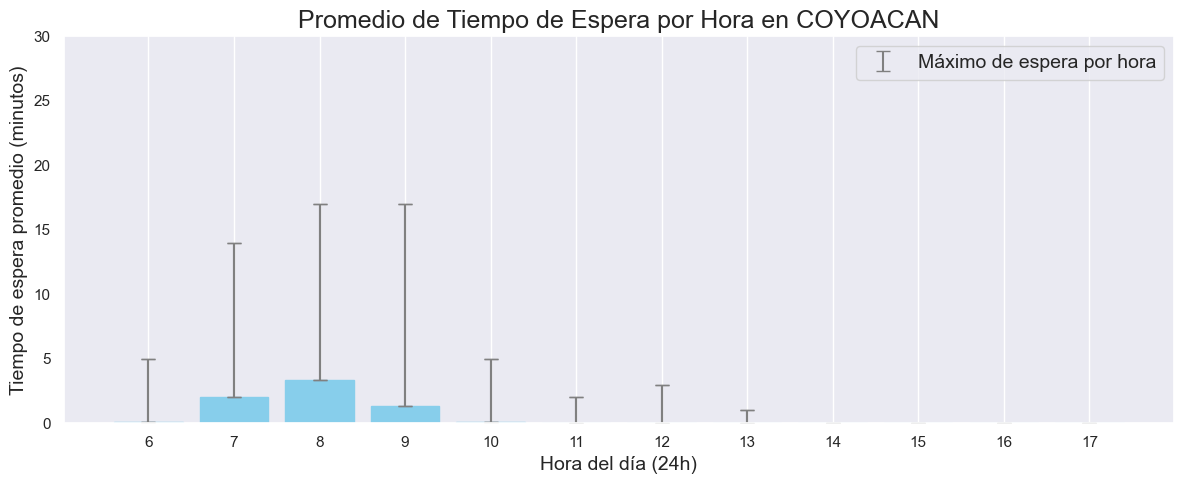

In [38]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max","std", "count"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)

plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en COYOACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 35, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCOY.png', dpi=300)

# Culiacan

In [10]:
df_fechas = df[df["Sucursal"]=="CULIACAN"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN", df,i)
    df_te = simular_atencion(df_sim, cajas=7) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

C:\Users\jajp2\AppData\Local\Temp\ipykernel_49636\2281291635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 4 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 5 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 3 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 4 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 3 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 5 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:14:00 | Caja 2 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 2 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:24:00 | Caja 3 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:29:00 | Caja 1 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:30:00 | Caja 2 atiende ID 15 (Prioridad 0) - Es

09:03:00 | Caja 2 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
09:05:00 | Caja 1 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 2 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 3 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 4 atiende ID 181 (Prioridad 0) - Espera: 0.0 min
09:08:00 | Caja 5 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 1 atiende ID 183 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 1 atiende ID 184 (Prioridad 0) - Espera: 0.0 min
09:20:00 | Caja 2 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 3 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 1 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 1 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 2 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 3 atiende ID 190 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 4 atiende

12:10:00 | Caja 1 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
12:12:00 | Caja 2 atiende ID 318 (Prioridad 1) - Espera: 0.0 min
12:16:00 | Caja 1 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
12:16:00 | Caja 2 atiende ID 319 (Prioridad 0) - Espera: 0.0 min
12:17:00 | Caja 3 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 4 atiende ID 321 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 5 atiende ID 323 (Prioridad 0) - Espera: 0.0 min
12:20:00 | Caja 2 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 5 atiende ID 324 (Prioridad 0) - Espera: 0.0 min
12:26:00 | Caja 1 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
12:27:00 | Caja 3 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
12:27:00 | Caja 4 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 1 atiende ID 329 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 1 atiende ID 330 (Prioridad 0) - Espera: 0.0 min
12:45:00 | Caja 2 atiende ID 331 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 1 atiende

17:10:00 | Caja 1 atiende ID 448 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 2 atiende ID 449 (Prioridad 0) - Espera: 0.0 min
17:15:00 | Caja 3 atiende ID 451 (Prioridad 1) - Espera: 0.0 min
17:15:00 | Caja 4 atiende ID 450 (Prioridad 0) - Espera: 0.0 min
17:16:00 | Caja 1 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
17:19:00 | Caja 1 atiende ID 453 (Prioridad 1) - Espera: 0.0 min
17:31:00 | Caja 1 atiende ID 454 (Prioridad 1) - Espera: 0.0 min
17:36:00 | Caja 1 atiende ID 455 (Prioridad 0) - Espera: 0.0 min
17:41:00 | Caja 1 atiende ID 456 (Prioridad 1) - Espera: 0.0 min
17:41:00 | Caja 2 atiende ID 457 (Prioridad 0) - Espera: 0.0 min
17:46:00 | Caja 1 atiende ID 458 (Prioridad 1) - Espera: 0.0 min
17:46:00 | Caja 2 atiende ID 459 (Prioridad 1) - Espera: 0.0 min
17:48:00 | Caja 3 atiende ID 460 (Prioridad 1) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 461 (Prioridad 1) - Espera: 0.0 min
17:51:00 | Caja 2 atiende ID 462 (Prioridad 1) - Espera: 0.0 min
17:55:00 | Caja 3 atiende

08:49:00 | Caja 1 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 2 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
08:51:00 | Caja 3 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
08:51:00 | Caja 5 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:53:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 4 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
08:53:00 | Caja 6 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 2 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 5 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
08:56:00 | Caja 7 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 1.0 min
08:58:00 | Caja 6 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 3 atiende ID 147 (Prioridad 1) - Espera: 1.0 min
09:00:00 | Caja 5 atiende ID 148 (Prioridad 1) - Espera: 2.0 min
09:00:00 | Caja 6 atiende

11:10:00 | Caja 1 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 4 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 5 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 6 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 7 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 1 atiende ID 273 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 2 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 3 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 4 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 1 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
11:32:00 | Caja 2 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 1 atiende

15:44:00 | Caja 1 atiende ID 395 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 2 atiende ID 397 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 3 atiende ID 398 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 4 atiende ID 399 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 1 atiende ID 400 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 2 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 3 atiende ID 402 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 403 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 2 atiende ID 404 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 3 atiende ID 405 (Prioridad 0) - Espera: 0.0 min
16:04:00 | Caja 1 atiende ID 406 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 1 atiende ID 407 (Prioridad 0) - Espera: 0.0 min
16:17:00 | Caja 2 atiende ID 409 (Prioridad 1) - Espera: 0.0 min
16:17:00 | Caja 3 atiende ID 408 (Prioridad 0) - Espera: 0.0 min
16:18:00 | Caja 4 atiende

08:25:00 | Caja 2 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
08:27:00 | Caja 1 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
08:27:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 4 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
08:31:00 | Caja 4 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 5 atiende ID 128 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 1 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
08:38:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 1 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 4 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 5 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 1 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 2 atiende

10:35:00 | Caja 4 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 5 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 6 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 7 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 3 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 258 (Prioridad 0) - Espera: 2.0 min
10:42:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 2 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 3 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 4 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 3 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 2 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 4 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
10:54:00 | Caja 1 atiende

14:54:00 | Caja 2 atiende ID 397 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 3 atiende ID 398 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 3 atiende ID 399 (Prioridad 0) - Espera: 0.0 min
14:58:00 | Caja 4 atiende ID 400 (Prioridad 1) - Espera: 0.0 min
15:02:00 | Caja 1 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
15:03:00 | Caja 2 atiende ID 402 (Prioridad 1) - Espera: 0.0 min
15:03:00 | Caja 3 atiende ID 403 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 4 atiende ID 404 (Prioridad 0) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 405 (Prioridad 0) - Espera: 0.0 min
15:08:00 | Caja 1 atiende ID 407 (Prioridad 1) - Espera: 0.0 min
15:08:00 | Caja 3 atiende ID 406 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 408 (Prioridad 0) - Espera: 0.0 min
15:18:00 | Caja 1 atiende ID 409 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 1 atiende ID 410 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 2 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 3 atiende

07:48:00 | Caja 5 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 6 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 7 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 4 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 2.0 min
07:53:00 | Caja 3 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 5 atiende ID 95 (Prioridad 0) - Espera: 2.0 min
07:53:00 | Caja 7 atiende ID 98 (Prioridad 0) - Espera: 0.0 min
07:55:00 | Caja 2 atiende ID 100 (Prioridad 1) - Espera: 1.0 min
07:57:00 | Caja 3 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
07:59:00 | Caja 1 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 2 atiende ID 103 (Prioridad 0) - Espera: 0.0 min
08:01:00 | Caja 4 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 5 atiende ID 105 (P

10:19:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 3 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 1 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 2 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 3 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
10:29:00 | Caja 4 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 3 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 273 (Prioridad 0) - Espera: 0.0 min
10:42:00 | Caja 3 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 4 atiende ID 274 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 1 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 2 atiende

15:05:00 | Caja 6 atiende ID 400 (Prioridad 1) - Espera: 0.0 min
15:05:00 | Caja 7 atiende ID 401 (Prioridad 0) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 402 (Prioridad 0) - Espera: 0.0 min
15:09:00 | Caja 1 atiende ID 403 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 2 atiende ID 404 (Prioridad 1) - Espera: 0.0 min
15:12:00 | Caja 3 atiende ID 405 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 1 atiende ID 406 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 2 atiende ID 407 (Prioridad 0) - Espera: 0.0 min
15:27:00 | Caja 1 atiende ID 408 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 2 atiende ID 409 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 3 atiende ID 410 (Prioridad 1) - Espera: 0.0 min
15:32:00 | Caja 4 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 1 atiende ID 412 (Prioridad 1) - Espera: 0.0 min
15:41:00 | Caja 1 atiende ID 413 (Prioridad 0) - Espera: 0.0 min
15:59:00 | Caja 1 atiende ID 414 (Prioridad 0) - Espera: 0.0 min
16:00:00 | Caja 2 atiende

08:07:00 | Caja 1 atiende ID 97 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 2 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 6 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 7 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
08:11:00 | Caja 1 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 3 atiende ID 101 (Prioridad 0) - Espera: 2.0 min
08:11:00 | Caja 4 atiende ID 102 (Prioridad 0) - Espera: 2.0 min
08:13:00 | Caja 2 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 4 atiende ID 103 (Prioridad 0) - Espera: 3.0 min
08:14:00 | Caja 7 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 104 (Prioridad 0) - Espera: 5.0 min
08:15:00 | Caja 4 atiende ID 107 (Prioridad 0) - Espera: 2.0 min
08:17:00 | Caja 2 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 1 atiende ID

10:04:00 | Caja 2 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
10:04:00 | Caja 3 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
10:05:00 | Caja 4 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 5 atiende ID 227 (Prioridad 0) - Espera: 0.0 min
10:06:00 | Caja 6 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
10:07:00 | Caja 7 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 2 atiende ID 230 (Prioridad 0) - Espera: 1.0 min
10:10:00 | Caja 3 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 5 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
10:12:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 4 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 2 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 1 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 2 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 3 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 1 atiende

13:13:00 | Caja 1 atiende ID 352 (Prioridad 1) - Espera: 0.0 min
13:14:00 | Caja 2 atiende ID 353 (Prioridad 1) - Espera: 0.0 min
13:15:00 | Caja 3 atiende ID 354 (Prioridad 1) - Espera: 0.0 min
13:15:00 | Caja 4 atiende ID 355 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 1 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 357 (Prioridad 1) - Espera: 0.0 min
13:23:00 | Caja 2 atiende ID 358 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 3 atiende ID 359 (Prioridad 0) - Espera: 0.0 min
13:25:00 | Caja 4 atiende ID 360 (Prioridad 0) - Espera: 0.0 min
13:26:00 | Caja 1 atiende ID 361 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 3 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 363 (Prioridad 0) - Espera: 0.0 min
13:29:00 | Caja 5 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 1 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 1 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 2 atiende

07:39:00 | Caja 1 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 1 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 1 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 2 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 1 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 3 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 4 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 5 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 6 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 7 atiende ID 73 (Priorid

09:42:00 | Caja 1 atiende ID 210 (Prioridad 1) - Espera: 2.0 min
09:42:00 | Caja 2 atiende ID 212 (Prioridad 1) - Espera: 1.0 min
09:42:00 | Caja 4 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 5 atiende ID 209 (Prioridad 0) - Espera: 3.0 min
09:42:00 | Caja 7 atiende ID 211 (Prioridad 0) - Espera: 1.0 min
09:43:00 | Caja 3 atiende ID 214 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 1 atiende ID 215 (Prioridad 0) - Espera: 0.0 min
09:47:00 | Caja 2 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 3 atiende ID 217 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 4 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 1 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 2 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 5 atiende ID 220 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 6 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 2 atiende

12:16:00 | Caja 1 atiende ID 337 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 2 atiende ID 338 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 3 atiende ID 339 (Prioridad 0) - Espera: 0.0 min
12:21:00 | Caja 1 atiende ID 340 (Prioridad 0) - Espera: 0.0 min
12:23:00 | Caja 3 atiende ID 341 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 3 atiende ID 342 (Prioridad 1) - Espera: 0.0 min
12:28:00 | Caja 1 atiende ID 343 (Prioridad 0) - Espera: 0.0 min
12:30:00 | Caja 2 atiende ID 344 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 3 atiende ID 345 (Prioridad 0) - Espera: 0.0 min
12:33:00 | Caja 2 atiende ID 346 (Prioridad 0) - Espera: 0.0 min
12:35:00 | Caja 2 atiende ID 347 (Prioridad 0) - Espera: 0.0 min
12:36:00 | Caja 1 atiende ID 348 (Prioridad 0) - Espera: 0.0 min
12:38:00 | Caja 2 atiende ID 349 (Prioridad 1) - Espera: 0.0 min
12:38:00 | Caja 3 atiende ID 350 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 4 atiende ID 351 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 1 atiende

17:54:00 | Caja 1 atiende ID 471 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 3 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 4 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 5 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:11:00 | Caja 3 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 2 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 4 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:17:00 | Caja 3 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 5 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 1 atiende ID 14 (Prioridad 0) - E

08:50:00 | Caja 5 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 6 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 7 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
08:51:00 | Caja 4 atiende ID 175 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 1 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 2 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 3 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 4 atiende ID 179 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 5 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 6 atiende ID 181 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 7 atiende ID 182 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 2 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 3 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 2 atiende ID 186 (Prioridad 1) - Espera: 1.0 min
09:00:00 | Caja 4 atiende ID 187 (Prioridad 1) - Espera: 2.0 min
09:00:00 | Caja 6 atiende

11:36:00 | Caja 4 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 5 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 6 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 2 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 3 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 4 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
11:45:00 | Caja 5 atiende ID 327 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 1 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 329 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 3 atiende ID 330 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 1 atiende ID 331 (Prioridad 0) - Espera: 0.0 min
11:55:00 | Caja 2 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 4 atiende ID 333 (Prioridad 0) - Espera: 0.0 min
11:57:00 | Caja 3 atiende ID 334 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 4 atiende

17:09:00 | Caja 1 atiende ID 448 (Prioridad 0) - Espera: 0.0 min
17:10:00 | Caja 3 atiende ID 449 (Prioridad 1) - Espera: 0.0 min
17:17:00 | Caja 1 atiende ID 451 (Prioridad 1) - Espera: 0.0 min
17:17:00 | Caja 2 atiende ID 450 (Prioridad 0) - Espera: 0.0 min
17:19:00 | Caja 2 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
17:22:00 | Caja 3 atiende ID 453 (Prioridad 0) - Espera: 0.0 min
17:31:00 | Caja 1 atiende ID 454 (Prioridad 0) - Espera: 0.0 min
17:34:00 | Caja 1 atiende ID 455 (Prioridad 1) - Espera: 0.0 min
17:37:00 | Caja 1 atiende ID 456 (Prioridad 1) - Espera: 0.0 min
17:43:00 | Caja 1 atiende ID 457 (Prioridad 1) - Espera: 0.0 min
17:47:00 | Caja 1 atiende ID 458 (Prioridad 0) - Espera: 0.0 min
17:48:00 | Caja 2 atiende ID 459 (Prioridad 0) - Espera: 0.0 min
17:55:00 | Caja 1 atiende ID 460 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 2 atiende ID 

08:46:00 | Caja 1 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 2 atiende ID 156 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 157 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 4 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 5 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 6 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 7 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
08:51:00 | Caja 3 atiende ID 163 (Prioridad 1) - Espera: 2.0 min
08:51:00 | Caja 4 atiende ID 160 (Prioridad 0) - Espera: 3.0 min
08:52:00 | Caja 2 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 5 atiende ID 164 (Prioridad 0) - Espera: 2.0 min
08:53:00 | Caja 6 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 7 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 3 atiende ID 169 (Prioridad 1) - Espera: 0.0 min
09:00:00 | Caja 4 atiende

11:16:00 | Caja 1 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 4 atiende ID 304 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 5 atiende ID 305 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 3 atiende ID 306 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 1 atiende ID 307 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 308 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 3 atiende ID 309 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 4 atiende ID 310 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 6 atiende ID 312 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 7 atiende ID 311 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 1 atiende ID 313 (Prioridad 1) - Espera: 1.0 min
11:31:00 | Caja 2 atiende ID 314 (Prioridad 0) - Espera: 1.0 min
11:31:00 | Caja 7 atiende ID 315 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 2 atiende

16:04:00 | Caja 1 atiende ID 430 (Prioridad 0) - Espera: 0.0 min
16:08:00 | Caja 1 atiende ID 431 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 1 atiende ID 432 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 2 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
16:22:00 | Caja 1 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 1 atiende ID 435 (Prioridad 1) - Espera: 0.0 min
16:28:00 | Caja 2 atiende ID 436 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 3 atiende ID 437 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 4 atiende ID 438 (Prioridad 0) - Espera: 0.0 min
16:36:00 | Caja 1 atiende ID 439 (Prioridad 1) - Espera: 0.0 min
16:41:00 | Caja 2 atiende ID 440 (Prioridad 0) - Espera: 0.0 min
16:44:00 | Caja 1 atiende ID 441 (Prioridad 1) - Espera: 0.0 min
16:46:00 | Caja 2 atiende ID 442 (Prioridad 1) - Espera: 0.0 min
16:47:00 | Caja 1 atiende ID 443 (Prioridad 1) - Espera: 0.0 min
16:48:00 | Caja 3 atiende ID 444 (Prioridad 1) - Espera: 0.0 min
16:49:00 | Caja 4 atiende

08:53:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 4.0 min
08:53:00 | Caja 3 atiende ID 141 (Prioridad 0) - Espera: 7.0 min
08:54:00 | Caja 5 atiende ID 142 (Prioridad 0) - Espera: 8.0 min
08:54:00 | Caja 6 atiende ID 156 (Prioridad 1) - Espera: 2.0 min
08:55:00 | Caja 2 atiende ID 147 (Prioridad 0) - Espera: 7.0 min
08:56:00 | Caja 5 atiende ID 148 (Prioridad 0) - Espera: 8.0 min
08:57:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 4.0 min
08:57:00 | Caja 7 atiende ID 152 (Prioridad 0) - Espera: 7.0 min
08:58:00 | Caja 4 atiende ID 153 (Prioridad 0) - Espera: 8.0 min
08:58:00 | Caja 5 atiende ID 161 (Prioridad 1) - Espera: 3.0 min
08:59:00 | Caja 2 atiende ID 154 (Prioridad 0) - Espera: 8.0 min
09:00:00 | Caja 6 atiende ID 155 (Prioridad 0) - Espera: 8.0 min
09:00:00 | Caja 7 atiende ID 163 (Prioridad 1) - Espera: 3.0 min
09:01:00 | Caja 1 atiende ID 158 (Prioridad 0) - Espera: 8.0 min
09:01:00 | Caja 3 atiende ID 159 (Prioridad 0) - Espera: 8.0 min
09:02:00 | Caja 4 atiende

10:58:00 | Caja 4 atiende ID 285 (Prioridad 0) - Espera: 1.0 min
10:59:00 | Caja 3 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 5 atiende ID 286 (Prioridad 0) - Espera: 1.0 min
10:59:00 | Caja 7 atiende ID 287 (Prioridad 0) - Espera: 1.0 min
11:00:00 | Caja 1 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 2 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 3 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 3 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 1 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 1 atiende ID 295 (Prioridad 1) - Espera: 0.0 min
11:16:00 | Caja 1 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 3 atiende ID 298 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 4 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 5 atiende

15:49:00 | Caja 1 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 2 atiende ID 423 (Prioridad 0) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 424 (Prioridad 0) - Espera: 0.0 min
15:58:00 | Caja 2 atiende ID 425 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 2 atiende ID 427 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 3 atiende ID 428 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 4 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 5 atiende ID 431 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 6 atiende ID 430 (Prioridad 0) - Espera: 0.0 min
16:24:00 | Caja 1 atiende ID 432 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 2 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 1 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 2 atiende ID 435 (Prioridad 0) - Espera: 0.0 min
16:32:00 | Caja 3 atiende ID 436 (Prioridad 0) - Espera: 0.0 min
16:33:00 | Caja 4 atiende

08:31:00 | Caja 4 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 2 atiende ID 140 (Prioridad 0) - Espera: 0.0 min
08:35:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 5 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 6 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 2 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 5 atiende ID 151 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 2 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 153 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 5 atiende

10:59:00 | Caja 1 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 2 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 3 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 4 atiende ID 278 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 5 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 2 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 3 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 283 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 284 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 3 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 1 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 2 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
11:23:00 | Caja 4 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende

15:07:00 | Caja 1 atiende ID 404 (Prioridad 1) - Espera: 0.0 min
15:08:00 | Caja 2 atiende ID 405 (Prioridad 0) - Espera: 0.0 min
15:09:00 | Caja 3 atiende ID 406 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 4 atiende ID 407 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 5 atiende ID 408 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 1 atiende ID 409 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 410 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 1 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 2 atiende ID 412 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 1 atiende ID 413 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 2 atiende ID 414 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 3 atiende ID 415 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 1 atiende ID 416 (Prioridad 0) - Espera: 0.0 min
15:37:00 | Caja 2 atiende ID 417 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 1 atiende ID 418 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 3 atiende

08:03:00 | Caja 3 atiende ID 95 (Prioridad 0) - Espera: 0.0 min
08:04:00 | Caja 4 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:04:00 | Caja 6 atiende ID 96 (Prioridad 0) - Espera: 0.0 min
08:05:00 | Caja 5 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 2 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 1 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 3 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 4 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 7 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 2 atiende ID 106 (Prioridad 1) - Espera: 1.0 min
08:10:00 | Caja 6 atiende ID 102 (Prioridad 0) - Espera: 2.0 min
08:12:00 | Caja 1 atiende ID 105 (Prioridad 0) - Espera: 3.0 min
08:12:00 | Caja 3 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 4 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 7 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 5 atiende ID 1

09:39:00 | Caja 1 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
09:40:00 | Caja 2 atiende ID 224 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 3 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 1 atiende ID 226 (Prioridad 0) - Espera: 0.0 min
09:47:00 | Caja 2 atiende ID 227 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 3 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 4 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 2 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 5 atiende ID 231 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 3 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 4 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 6 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
09:52:00 | Caja 7 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 5 atiende

12:39:00 | Caja 1 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 2 atiende ID 365 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 3 atiende ID 366 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 2 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 4 atiende ID 369 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 1 atiende ID 370 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 1 atiende ID 371 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 2 atiende ID 372 (Prioridad 1) - Espera: 0.0 min
12:57:00 | Caja 3 atiende ID 373 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 1 atiende ID 374 (Prioridad 0) - Espera: 0.0 min
13:03:00 | Caja 3 atiende ID 375 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 4 atiende ID 376 (Prioridad 0) - Espera: 0.0 min
13:10:00 | Caja 1 atiende ID 377 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 1 atiende ID 378 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 2 atiende

06:31:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 3 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:36:00 | Caja 2 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:37:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:38:00 | Caja 4 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:38:00 | Caja 5 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:38:00 | Caja 6 atiende ID 16 (Prioridad 1) - Espera: 0.0 min
06:40:00 | Caja 2 atiende ID 17 (Prioridad 1) - Espera: 0.0 min
06:43:00 | Caja 1 atiende ID 18 (Prioridad 0) - Espera: 0.0 min
06:44:00 | Caja 2 atiende ID 19 (Prioridad 1) - Espera: 0.0 min
06:49:00 | Caja 1 atiende ID 20 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 3 atiende ID 21 (Prioridad 1) - Espera: 0.0 min
06:52:00 | Caja 4 atiende ID 22 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 1 atiende ID 23 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 2 atiende ID 24 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 3 atiende ID 25 (Priorid

09:36:00 | Caja 1 atiende ID 175 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 2 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 3 atiende ID 177 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 4 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 5 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 1 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 2 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 3 atiende ID 182 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 4 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 5 atiende ID 183 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 6 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 2 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 3 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 4 atiende

13:01:00 | Caja 1 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 2 atiende ID 303 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 3 atiende ID 304 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 305 (Prioridad 0) - Espera: 0.0 min
13:10:00 | Caja 2 atiende ID 306 (Prioridad 1) - Espera: 0.0 min
13:11:00 | Caja 3 atiende ID 307 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 1 atiende ID 308 (Prioridad 1) - Espera: 0.0 min
13:15:00 | Caja 2 atiende ID 309 (Prioridad 0) - Espera: 0.0 min
13:16:00 | Caja 3 atiende ID 310 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 1 atiende ID 311 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 312 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 2 atiende ID 313 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 3 atiende ID 314 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 4 atiende ID 315 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 1 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 2 atiende

07:29:00 | Caja 1 atiende ID 53 (Prioridad 0) - Espera: 1.0 min
07:30:00 | Caja 2 atiende ID 54 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 3 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
07:32:00 | Caja 1 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
07:32:00 | Caja 4 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
07:33:00 | Caja 2 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
07:33:00 | Caja 5 atiende ID 58 (Prioridad 0) - Espera: 0.0 min
07:34:00 | Caja 1 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 6 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 7 atiende ID 62 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 2 atiende ID 63 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 4 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:38:00 | Caja 1 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 2 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 1 atiende ID 68 (Priorid

09:23:00 | Caja 2 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 5 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 3 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 7 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 192 (Prioridad 1) - Espera: 1.0 min
09:27:00 | Caja 4 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 2 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 3 atiende ID 189 (Prioridad 0) - Espera: 2.0 min
09:29:00 | Caja 6 atiende ID 193 (Prioridad 0) - Espera: 2.0 min
09:31:00 | Caja 4 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 5 atiende ID 196 (Prioridad 0) - Espera: 0.0 min
09:35:00 | Caja 1 atiende ID 198 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 2 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 3 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 3 atiende

11:58:00 | Caja 1 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 2 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 3 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 4 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 1 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 3 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
12:06:00 | Caja 1 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 328 (Prioridad 0) - Espera: 0.0 min
12:12:00 | Caja 2 atiende ID 329 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 1 atiende ID 330 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 2 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 3 atiende ID 331 (Prioridad 0) - Espera: 0.0 min
12:21:00 | Caja 2 atiende ID 333 (Prioridad 0) - Espera: 0.0 min
12:22:00 | Caja 4 atiende ID 334 (Prioridad 0) - Espera: 0.0 min
12:23:00 | Caja 1 atiende ID 335 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 5 atiende

17:12:00 | Caja 2 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
17:14:00 | Caja 2 atiende ID 453 (Prioridad 1) - Espera: 0.0 min
17:26:00 | Caja 1 atiende ID 454 (Prioridad 0) - Espera: 0.0 min
17:31:00 | Caja 1 atiende ID 455 (Prioridad 1) - Espera: 0.0 min
17:33:00 | Caja 2 atiende ID 456 (Prioridad 0) - Espera: 0.0 min
17:35:00 | Caja 1 atiende ID 457 (Prioridad 1) - Espera: 0.0 min
17:37:00 | Caja 3 atiende ID 458 (Prioridad 1) - Espera: 0.0 min
17:41:00 | Caja 1 atiende ID 459 (Prioridad 1) - Espera: 0.0 min
17:41:00 | Caja 4 atiende ID 460 (Prioridad 1) - Espera: 0.0 min
17:42:00 | Caja 3 atiende ID 461 (Prioridad 0) - Espera: 0.0 min
17:44:00 | Caja 5 atiende ID 462 (Prioridad 1) - Espera: 0.0 min
17:46:00 | Caja 1 atiende ID 463 (Prioridad 1) - Espera: 0.0 min
17:48:00 | Caja 2 atiende ID 464 (Prioridad 0) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 465 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 1 atiende ID 466 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende

08:26:00 | Caja 1 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 3 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 4 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 5 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
08:27:00 | Caja 2 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 6 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 4 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 5 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 3 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 6 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 4 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 7 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 3 atiende

11:25:00 | Caja 1 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 2 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 3 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 4 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 2 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 5 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 3 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 4 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 1 atiende ID 299 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 2 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 3 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 4 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
11:49:00 | Caja 1 atiende

15:56:00 | Caja 1 atiende ID 424 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 3 atiende ID 425 (Prioridad 1) - Espera: 0.0 min
16:02:00 | Caja 1 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 2 atiende ID 427 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 3 atiende ID 428 (Prioridad 0) - Espera: 0.0 min
16:06:00 | Caja 3 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
16:08:00 | Caja 2 atiende ID 430 (Prioridad 0) - Espera: 0.0 min
16:09:00 | Caja 1 atiende ID 431 (Prioridad 0) - Espera: 0.0 min
16:10:00 | Caja 4 atiende ID 432 (Prioridad 1) - Espera: 0.0 min
16:10:00 | Caja 5 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
16:17:00 | Caja 1 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
16:21:00 | Caja 2 atiende ID 435 (Prioridad 0) - Espera: 0.0 min
16:23:00 | Caja 2 atiende ID 436 (Prioridad 1) - Espera: 0.0 min
16:23:00 | Caja 3 atiende ID 437 (Prioridad 1) - Espera: 0.0 min
16:24:00 | Caja 1 atiende ID 438 (Prioridad 0) - Espera: 0.0 min
16:25:00 | Caja 3 atiende

08:37:00 | Caja 6 atiende ID 154 (Prioridad 0) - Espera: 8.0 min
08:38:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 5 atiende ID 156 (Prioridad 0) - Espera: 3.0 min
08:39:00 | Caja 3 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 7 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 2 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 4 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 5 atiende ID 162 (Prioridad 1) - Espera: 1.0 min
08:42:00 | Caja 2 atiende ID 163 (Prioridad 1) - Espera: 1.0 min
08:43:00 | Caja 6 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 7 atiende ID 164 (Prioridad 0) - Espera: 3.0 min
08:45:00 | Caja 3 atiende ID 167 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 1 atiende ID 169 (Prioridad 1) - Espera: 1.0 min
08:48:00 | Caja 4 atiende

10:29:00 | Caja 3 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 5 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 6 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 1 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 3 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 4 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 3 atiende ID 294 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 4 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 3 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
10:46:00 | Caja 4 atiende ID 299 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 5 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 6 atiende

14:59:00 | Caja 1 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 2 atiende ID 417 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 1 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
15:08:00 | Caja 2 atiende ID 419 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 3 atiende ID 420 (Prioridad 0) - Espera: 0.0 min
15:11:00 | Caja 4 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 2 atiende ID 424 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 3 atiende ID 423 (Prioridad 0) - Espera: 0.0 min
15:20:00 | Caja 1 atiende ID 425 (Prioridad 0) - Espera: 0.0 min
15:22:00 | Caja 3 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
15:28:00 | Caja 1 atiende ID 427 (Prioridad 0) - Espera: 0.0 min
15:29:00 | Caja 2 atiende ID 428 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 3 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 1 atiende ID 430 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 1 atiende

07:40:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 3 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
07:41:00 | Caja 4 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 1 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 1 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 85 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
07:55:00 | Caja 2 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 3 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 4 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 5 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 6 atiende ID 89 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 7 atiende ID 91 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
07:59:00 | Caja 6 atiende ID 94 (Priorid

10:26:00 | Caja 7 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 2 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 3 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 4 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 5 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 4 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 3 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 4 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 5 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 3 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
10:42:00 | Caja 4 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 2 atiende

14:04:00 | Caja 1 atiende ID 391 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 2 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 3 atiende ID 393 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 1 atiende ID 394 (Prioridad 0) - Espera: 0.0 min
14:15:00 | Caja 2 atiende ID 395 (Prioridad 1) - Espera: 0.0 min
14:15:00 | Caja 3 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 4 atiende ID 397 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 398 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 399 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 400 (Prioridad 0) - Espera: 0.0 min
14:26:00 | Caja 3 atiende ID 401 (Prioridad 0) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 402 (Prioridad 0) - Espera: 0.0 min
14:33:00 | Caja 2 atiende ID 403 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 2 atiende ID 404 (Prioridad 0) - Espera: 0.0 min
14:39:00 | Caja 1 atiende ID 405 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 1 atiende

07:43:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 2 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 3 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 4 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 5 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 6 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 7 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 4 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 1 atiende ID 81 (Prioridad 1) - Espera: 1.0 min
07:48:00 | Caja 3 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 7 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 1 atiende ID 77 (Prioridad 0) - Espera: 3.0 min
07:49:00 | Caja 4 atiende ID 78 (Prioridad 0) - Espera: 3.0 min
07:49:00 | Caja 5 atiende ID 80 (Prioridad 0) - Espera: 2.0 min
07:50:00 | Caja 3 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 1 atiende ID 85 (Priorid

10:25:00 | Caja 2 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 3 atiende ID 210 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 1 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 2 atiende ID 212 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 3 atiende ID 213 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 4 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 216 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 3 atiende ID 217 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 4 atiende ID 218 (Prioridad 0) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 4 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 1 atiende ID 222 (Prioridad 0) - Espera: 0.0 min
10:45:00 | Caja 2 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 3 atiende

14:43:00 | Caja 1 atiende ID 354 (Prioridad 0) - Espera: 0.0 min
14:47:00 | Caja 1 atiende ID 355 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 1 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 2 atiende ID 357 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 358 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 2 atiende ID 359 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 1 atiende ID 360 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 3 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 1 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 4 atiende ID 362 (Prioridad 0) - Espera: 0.0 min
15:02:00 | Caja 5 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 2 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 1 atiende ID 367 (Prioridad 0) - Espera: 0.0 min
15:18:00 | Caja 1 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
15:18:00 | Caja 2 atiende

07:51:00 | Caja 6 atiende ID 85 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
07:55:00 | Caja 1 atiende ID 87 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 2 atiende ID 88 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 3 atiende ID 89 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 1 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 4 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 5 atiende ID 92 (Prioridad 0) - Espera: 0.0 min
08:02:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 3 atiende ID 95 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 6 atiende ID 94 (Prioridad 0) - Espera: 0.0 min
08:03:00 | Caja 2 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
08:03:00 | Caja 7 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 99 (Prioridad 1) - Espera: 1.0 min
08:06:00 | Caja 5 atiende ID 98 (Prioridad 0) - Espera: 1.0 min
08:07:00 | Caja 3 atiende ID 100 (Priori

10:28:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 2 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 4 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 5 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 6 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 2 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 7 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 4 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 3 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 5 atiende ID 255 (Prioridad 0) - Espera: 1.0 min
10:35:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 6 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 3 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 4 atiende

14:03:00 | Caja 1 atiende ID 376 (Prioridad 0) - Espera: 0.0 min
14:03:00 | Caja 2 atiende ID 377 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 1 atiende ID 378 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 3 atiende ID 379 (Prioridad 1) - Espera: 0.0 min
14:15:00 | Caja 1 atiende ID 381 (Prioridad 1) - Espera: 0.0 min
14:15:00 | Caja 2 atiende ID 380 (Prioridad 0) - Espera: 0.0 min
14:17:00 | Caja 3 atiende ID 382 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 383 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 3 atiende ID 384 (Prioridad 0) - Espera: 0.0 min
14:36:00 | Caja 1 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 2 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 3 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 4 atiende ID 388 (Prioridad 0) - Espera: 0.0 min
14:42:00 | Caja 1 atiende ID 389 (Prioridad 1) - Espera: 0.0 min
14:43:00 | Caja 2 atiende ID 390 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 1 atiende

07:39:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 4 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 3 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 5 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 3 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 4 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 6 atiende ID 77 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 5 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
07:48:00 | Caja 7 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 1 atiende ID 80 (Prioridad 0) - Espera: 1.0 min
07:49:00 | Caja 6 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 3 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 4 atiende ID 85 (Priorid

10:23:00 | Caja 2 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 3 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 4 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 2 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 2 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 4 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 3 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 5 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 6 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende

14:04:00 | Caja 1 atiende ID 380 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 2 atiende ID 381 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 2 atiende ID 382 (Prioridad 1) - Espera: 0.0 min
14:08:00 | Caja 1 atiende ID 383 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 1 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 2 atiende ID 385 (Prioridad 0) - Espera: 0.0 min
14:13:00 | Caja 1 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 3 atiende ID 387 (Prioridad 0) - Espera: 0.0 min
14:15:00 | Caja 4 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 389 (Prioridad 0) - Espera: 0.0 min
14:19:00 | Caja 3 atiende ID 390 (Prioridad 1) - Espera: 0.0 min
14:25:00 | Caja 1 atiende ID 391 (Prioridad 0) - Espera: 0.0 min
14:26:00 | Caja 2 atiende ID 392 (Prioridad 0) - Espera: 0.0 min
14:27:00 | Caja 1 atiende ID 393 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 3 atiende ID 394 (Prioridad 1) - Espera: 0.0 min
14:29:00 | Caja 2 atiende

07:55:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 2 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 3 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 4 atiende ID 71 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 5 atiende ID 73 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 6 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:58:00 | Caja 1 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
07:59:00 | Caja 2 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 1 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 3 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
08:03:00 | Caja 5 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 2 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 4 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
08:06:00 | Caja 5 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 3 atiende ID 84 (Priorid

10:19:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 3 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 2 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 4 atiende ID 231 (Prioridad 0) - Espera: 0.0 min
10:22:00 | Caja 5 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 2 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 4 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 3 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
10:29:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 2 atiende ID 238 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 4 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 3 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 5 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 6 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 1 atiende

13:20:00 | Caja 2 atiende ID 370 (Prioridad 0) - Espera: 0.0 min
13:22:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
13:25:00 | Caja 1 atiende ID 372 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 2 atiende ID 373 (Prioridad 0) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 374 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 2 atiende ID 375 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 3 atiende ID 376 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 4 atiende ID 378 (Prioridad 1) - Espera: 0.0 min
13:32:00 | Caja 5 atiende ID 379 (Prioridad 1) - Espera: 0.0 min
13:32:00 | Caja 6 atiende ID 377 (Prioridad 0) - Espera: 0.0 min
13:34:00 | Caja 1 atiende ID 380 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 2 atiende ID 381 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 3 atiende ID 382 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 4 atiende ID 383 (Prioridad 0) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 1 atiende

07:23:00 | Caja 3 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 4 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 2 atiende ID 63 (Prioridad 0) - Espera: 0.0 min
07:26:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 3 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:27:00 | Caja 5 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:27:00 | Caja 6 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
07:27:00 | Caja 7 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
07:28:00 | Caja 1 atiende ID 69 (Prioridad 0) - Espera: 1.0 min
07:29:00 | Caja 2 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:29:00 | Caja 3 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 4 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 5 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:33:00 | Caja 2 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:33:00 | Caja 6 atiende ID 74 (Prioridad 0) - Espera: 2.0 min
07:35:00 | Caja 4 atiende ID 76 (Priorid

09:26:00 | Caja 4 atiende ID 202 (Prioridad 1) - Espera: 1.0 min
09:26:00 | Caja 5 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 200 (Prioridad 0) - Espera: 4.0 min
09:27:00 | Caja 2 atiende ID 203 (Prioridad 0) - Espera: 2.0 min
09:27:00 | Caja 3 atiende ID 204 (Prioridad 0) - Espera: 1.0 min
09:28:00 | Caja 4 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 1 atiende ID 207 (Prioridad 0) - Espera: 1.0 min
09:29:00 | Caja 6 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
09:31:00 | Caja 2 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 3 atiende ID 209 (Prioridad 0) - Espera: 3.0 min
09:33:00 | Caja 1 atiende ID 210 (Prioridad 0) - Espera: 4.0 min
09:34:00 | Caja 2 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 2 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 3 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 5 atiende ID 214 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 1 atiende

11:47:00 | Caja 1 atiende ID 335 (Prioridad 1) - Espera: 0.0 min
11:47:00 | Caja 2 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
11:49:00 | Caja 3 atiende ID 337 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 4 atiende ID 338 (Prioridad 0) - Espera: 0.0 min
11:51:00 | Caja 5 atiende ID 340 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 6 atiende ID 339 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 1 atiende ID 341 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 2 atiende ID 342 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 3 atiende ID 343 (Prioridad 0) - Espera: 0.0 min
11:57:00 | Caja 2 atiende ID 344 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 1 atiende ID 345 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 2 atiende ID 346 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 1 atiende ID 347 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 1 atiende ID 349 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 2 atiende ID 348 (Prioridad 0) - Espera: 0.0 min
12:17:00 | Caja 1 atiende

16:44:00 | Caja 1 atiende ID 466 (Prioridad 1) - Espera: 0.0 min
16:49:00 | Caja 1 atiende ID 468 (Prioridad 1) - Espera: 0.0 min
16:49:00 | Caja 2 atiende ID 467 (Prioridad 0) - Espera: 0.0 min
16:52:00 | Caja 3 atiende ID 469 (Prioridad 0) - Espera: 0.0 min
16:54:00 | Caja 1 atiende ID 471 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 2 atiende ID 470 (Prioridad 0) - Espera: 0.0 min
16:58:00 | Caja 1 atiende ID 472 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 1 atiende ID 473 (Prioridad 0) - Espera: 0.0 min
17:17:00 | Caja 1 atiende ID 474 (Prioridad 1) - Espera: 0.0 min
17:18:00 | Caja 2 atiende ID 475 (Prioridad 1) - Espera: 0.0 min
17:19:00 | Caja 3 atiende ID 476 (Prioridad 1) - Espera: 0.0 min
17:20:00 | Caja 4 atiende ID 477 (Prioridad 1) - Espera: 0.0 min
17:27:00 | Caja 1 atiende ID 478 (Prioridad 1) - Espera: 0.0 min
17:27:00 | Caja 2 atiende ID 479 (Prioridad 1) - Espera: 0.0 min
17:30:00 | Caja 1 atiende ID 480 (Prioridad 0) - Espera: 0.0 min
17:34:00 | Caja 1 atiende

08:34:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
08:35:00 | Caja 2 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 3 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 2 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 4 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 3 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 5 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 6 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 3 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 7 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 6 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 4 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 2 atiende

11:17:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 3 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 4 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 5 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 6 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 1 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 2 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 4 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
11:25:00 | Caja 6 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 5 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 3 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 5 atiende ID 284 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 7 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 1 atiende

14:50:00 | Caja 2 atiende ID 398 (Prioridad 0) - Espera: 0.0 min
14:51:00 | Caja 1 atiende ID 399 (Prioridad 1) - Espera: 0.0 min
14:54:00 | Caja 3 atiende ID 400 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 2 atiende ID 402 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 1 atiende ID 403 (Prioridad 1) - Espera: 0.0 min
15:05:00 | Caja 1 atiende ID 404 (Prioridad 0) - Espera: 0.0 min
15:09:00 | Caja 2 atiende ID 405 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 1 atiende ID 406 (Prioridad 1) - Espera: 0.0 min
15:13:00 | Caja 2 atiende ID 407 (Prioridad 1) - Espera: 0.0 min
15:14:00 | Caja 3 atiende ID 408 (Prioridad 1) - Espera: 0.0 min
15:16:00 | Caja 1 atiende ID 409 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 2 atiende ID 410 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 1 atiende ID 412 (Prioridad 0) - Espera: 0.0 min
15:31:00 | Caja 2 atiende

07:48:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 2 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 3 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 4 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 6 atiende ID 77 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 5 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 7 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 3 atiende ID 81 (Prioridad 0) - Espera: 2.0 min
07:54:00 | Caja 1 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 2 atiende ID 82 (Prioridad 0) - Espera: 4.0 min
07:55:00 | Caja 4 atiende ID 84 (Prioridad 0) - Espera: 3.0 min
07:57:00 | Caja 2 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 3 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
07:58:00 | Caja 5 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
07:58:00 | Caja 6 atiende ID 89 (Priorid

10:26:00 | Caja 1 atiende ID 216 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 2 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 3 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 4 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 5 atiende ID 219 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 6 atiende ID 220 (Prioridad 0) - Espera: 0.0 min
10:29:00 | Caja 7 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 3 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 4 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 5 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 2 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 3 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 1 atiende

14:18:00 | Caja 4 atiende ID 348 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 2 atiende ID 349 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 350 (Prioridad 1) - Espera: 0.0 min
14:32:00 | Caja 1 atiende ID 351 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 1 atiende ID 352 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 354 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 2 atiende ID 353 (Prioridad 0) - Espera: 0.0 min
14:47:00 | Caja 2 atiende ID 355 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 1 atiende ID 357 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 2 atiende ID 358 (Prioridad 0) - Espera: 0.0 min
15:02:00 | Caja 3 atiende ID 359 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 1 atiende ID 360 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 2 atiende ID 361 (Prioridad 0) - Espera: 0.0 min
15:20:00 | Caja 1 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 2 atiende

07:39:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 1 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 2 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
07:46:00 | Caja 2 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 3 atiende ID 67 (Prioridad 0) - Espera: 0.0 min
07:46:00 | Caja 4 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 71 (Prioridad 0) - Espera: 0.0 min
07:49:00 | Caja 5 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 6 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 7 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 3 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 1 atiende ID 79 (Priorid

09:32:00 | Caja 7 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 1 atiende ID 202 (Prioridad 1) - Espera: 1.0 min
09:33:00 | Caja 5 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 2 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
09:35:00 | Caja 4 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 1 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 2 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 3 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 4 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 5 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 2 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 4 atiende ID 212 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 3 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 6 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 7 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 5 atiende

12:47:00 | Caja 1 atiende ID 333 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 2 atiende ID 334 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 1 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 335 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 4 atiende ID 337 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 1 atiende ID 338 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 2 atiende ID 339 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 4 atiende ID 340 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 5 atiende ID 341 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 1 atiende ID 342 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 3 atiende ID 343 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 2 atiende ID 344 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 4 atiende ID 346 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 5 atiende ID 345 (Prioridad 0) - Espera: 0.0 min
13:10:00 | Caja 1 atiende ID 347 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 2 atiende

07:49:00 | Caja 1 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 87 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 4 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 5 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 2 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 3 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 6 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 2 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 5 atiende ID 95 (Prioridad 0) - Espera: 0.0 min
07:59:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
07:59:00 | Caja 4 atiende ID 96 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 2 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 3 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
08:03:00 | Caja 1 atiende ID 100 (Priori

10:24:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 2.0 min
10:24:00 | Caja 4 atiende ID 248 (Prioridad 0) - Espera: 1.0 min
10:25:00 | Caja 2 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 3 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 5 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 6 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 7 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 1.0 min
10:29:00 | Caja 2 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 4 atiende ID 252 (Prioridad 0) - Espera: 2.0 min
10:31:00 | Caja 3 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 5 atiende ID 258 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 1 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 5 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 6 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 1 atiende

14:10:00 | Caja 1 atiende ID 375 (Prioridad 1) - Espera: 0.0 min
14:12:00 | Caja 2 atiende ID 376 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 1 atiende ID 377 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 378 (Prioridad 0) - Espera: 0.0 min
14:27:00 | Caja 1 atiende ID 379 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 2 atiende ID 380 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 1 atiende ID 381 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 1 atiende ID 382 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 2 atiende ID 383 (Prioridad 1) - Espera: 0.0 min
14:42:00 | Caja 3 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 4 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
14:50:00 | Caja 1 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 2 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 389 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 2 atiende

07:34:00 | Caja 2 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 4 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:34:00 | Caja 5 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
07:35:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 1 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
07:40:00 | Caja 3 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 4 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 5 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:41:00 | Caja 6 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 7 atiende ID 73 (Prioridad 0) - Espera: 0.0 min
07:42:00 | Caja 2 atiende ID 74 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 4 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:45:00 | Caja 3 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 5 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 6 atiende ID 78 (Priorid

10:16:00 | Caja 2 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 1 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 3 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 2 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 4 atiende ID 227 (Prioridad 0) - Espera: 0.0 min
10:23:00 | Caja 2 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 5 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 6 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 7 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 1 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 4 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 2 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 6 atiende ID 235 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 3 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 7 atiende

14:11:00 | Caja 1 atiende ID 358 (Prioridad 1) - Espera: 0.0 min
14:12:00 | Caja 2 atiende ID 359 (Prioridad 1) - Espera: 0.0 min
14:14:00 | Caja 3 atiende ID 360 (Prioridad 1) - Espera: 0.0 min
14:14:00 | Caja 4 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 1 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 2 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 3 atiende ID 365 (Prioridad 0) - Espera: 0.0 min
14:26:00 | Caja 1 atiende ID 366 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 3 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 1 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 4 atiende ID 368 (Prioridad 0) - Espera: 0.0 min
14:35:00 | Caja 2 atiende ID 370 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 4 atiende ID 372 (Prioridad 0) - Espera: 0.0 min
14:40:00 | Caja 1 atiende

07:36:00 | Caja 1 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 2 atiende ID 77 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 3 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:37:00 | Caja 4 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
07:39:00 | Caja 1 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
07:40:00 | Caja 5 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 2 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 3 atiende ID 83 (Prioridad 0) - Espera: 0.0 min
07:42:00 | Caja 4 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
07:44:00 | Caja 5 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 6 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 1 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 89 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 91 (Priorid

10:05:00 | Caja 6 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 2 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 3 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 7 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 5 atiende ID 245 (Prioridad 0) - Espera: 1.0 min
10:09:00 | Caja 4 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 3 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 6 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 2 atiende ID 249 (Prioridad 0) - Espera: 1.0 min
10:12:00 | Caja 3 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 2 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 4 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 5 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 6 atiende

13:21:00 | Caja 1 atiende ID 374 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 375 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 2 atiende ID 376 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 3 atiende ID 377 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 1 atiende ID 378 (Prioridad 0) - Espera: 0.0 min
13:34:00 | Caja 2 atiende ID 379 (Prioridad 0) - Espera: 0.0 min
13:39:00 | Caja 1 atiende ID 380 (Prioridad 1) - Espera: 0.0 min
13:39:00 | Caja 2 atiende ID 381 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 3 atiende ID 383 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 4 atiende ID 382 (Prioridad 0) - Espera: 0.0 min
13:43:00 | Caja 2 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
13:45:00 | Caja 3 atiende ID 385 (Prioridad 0) - Espera: 0.0 min
13:45:00 | Caja 4 atiende ID 386 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 1 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 2 atiende ID 388 (Prioridad 0) - Espera: 0.0 min
13:51:00 | Caja 4 atiende

,id,prioridad,hora_llegada,hora_inicio,espera_min,caja
0,0,0,2024-03-01 06:00:00,2024-03-01 06:00:00,0.0,1
1,1,0,2024-03-01 06:00:00,2024-03-01 06:00:00,0.0,2
2,2,1,2024-03-01 06:01:00,2024-03-01 06:01:00,0.0,3
3,3,1,2024-03-01 06:03:00,2024-03-01 06:03:00,0.0,4
4,4,1,2024-03-01 06:04:00,2024-03-01 06:04:00,0.0,5
...,...,...,...,...,...,...
12356,455,1,2024-03-27 17:28:00,2024-03-27 17:28:00,0.0,1
12357,456,1,2024-03-27 17:29:00,2024-03-27 17:29:00,0.0,2
12358,457,1,2024-03-27 17:30:00,2024-03-27 17:30:00,0.0,3
12359,458,1,2024-03-27 17:42:00,2024-03-27 17:42:00,0.0,1


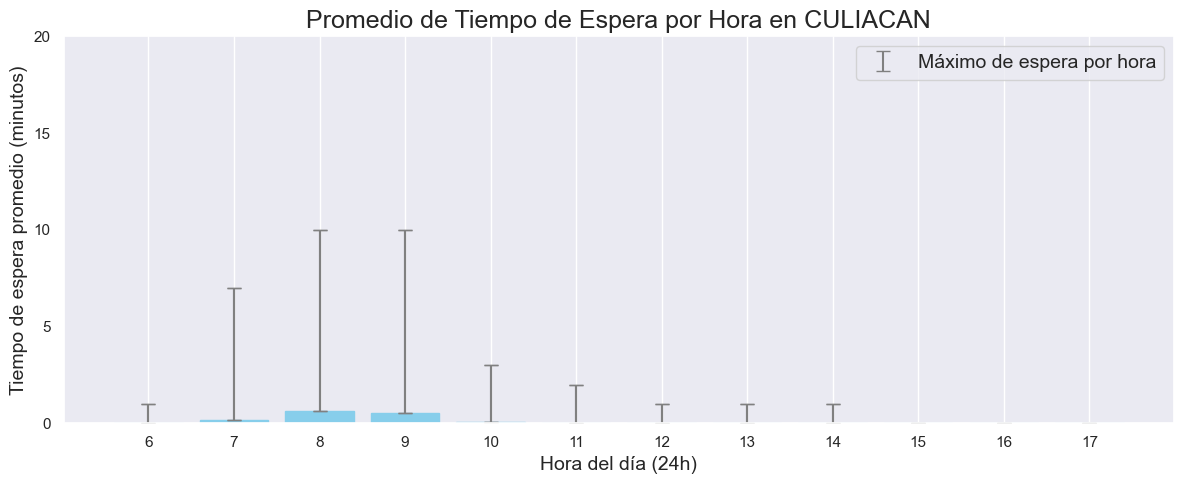

In [11]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCUL.png', dpi=300)

# CULIACAN CAÑADAS

In [29]:
df_fechas = df[df["Sucursal"]=="CULIACAN CAÑADAS"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN CAÑADAS", df,i)
    df_te = simular_atencion(df_sim, cajas=4) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

C:\Users\jajp2\AppData\Local\Temp\ipykernel_49636\1921989064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:05:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 2 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:21:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:23:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:23:00 | Caja 3 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:24:00 | Caja 2 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:26:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:28:00 | Caja 2 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:31:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:32:00 | Caja 2 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:32:00 | Caja 3 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:36:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:38:00 | Caja 2 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:39:00 | Caja 3 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:42:00 | Caja 1 atiende ID 15 (Prioridad 0) - Es

10:10:00 | Caja 1 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 1 atiende ID 192 (Prioridad 0) - Espera: 0.0 min
10:16:00 | Caja 2 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 1 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
10:20:00 | Caja 1 atiende ID 195 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 2 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 1 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 2 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 3 atiende ID 198 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 1 atiende ID 200 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 3 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 2 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 3 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 1 atiende

17:39:00 | Caja 1 atiende ID 319 (Prioridad 1) - Espera: 0.0 min
17:42:00 | Caja 2 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
17:45:00 | Caja 1 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
17:45:00 | Caja 3 atiende ID 321 (Prioridad 0) - Espera: 0.0 min
17:49:00 | Caja 1 atiende ID 323 (Prioridad 0) - Espera: 0.0 min
17:54:00 | Caja 1 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 1 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 3 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 2 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 3 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:21:00 | Caja 1 atiende ID 9 (Prioridad 0

09:27:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 2 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 3 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 4 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 2 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 1 atiende ID 155 (Prioridad 0) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 2 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
09:46:00 | Caja 1 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
09:46:00 | Caja 3 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 4 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 2 atiende

15:40:00 | Caja 2 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
15:41:00 | Caja 3 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 2 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 2 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
15:55:00 | Caja 3 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
16:10:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
16:17:00 | Caja 1 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
16:19:00 | Caja 2 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 3 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
16:21:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
16:42:00 | Caja 1 atiende ID 293 (Prioridad 0) - Espera: 0.0 min
16:45:00 | Caja 2 atiende ID 294 (Prioridad 0) - Espera: 0.0 min
16:46:00 | Caja 1 atiende

08:39:00 | Caja 1 atiende ID 107 (Prioridad 0) - Espera: 4.0 min
08:39:00 | Caja 2 atiende ID 108 (Prioridad 0) - Espera: 4.0 min
08:39:00 | Caja 3 atiende ID 110 (Prioridad 0) - Espera: 2.0 min
08:44:00 | Caja 1 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 2 atiende ID 111 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 2 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 1 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 3 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 1 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 4 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 2 atiende ID 119 (Prioridad 1) - Espera: 1.0 min
08:53:00 | Caja 3 atiende ID 120 (Prioridad 0) - Espera: 1.0 min
08:55:00 | Caja 3 atiende ID 121 (Prioridad 0) - Espera: 1.0 min
08:58:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 3 atiende

14:42:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 2 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
15:08:00 | Caja 1 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 2 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 1 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
15:37:00 | Caja 1 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 2 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 2 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 2 atiende

08:58:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
09:01:00 | Caja 2 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
09:03:00 | Caja 1 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
09:05:00 | Caja 2 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
09:08:00 | Caja 3 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 1 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 2 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
09:19:00 | Caja 4 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 1 atiende ID 151 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 2 atiende ID 152 (Prioridad 0) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 153 (Prioridad 0) - Espera: 0.0 min
09:34:00 | Caja 1 atiende ID 154 (Prioridad 0) - Espera: 0.0 min
09:36:00 | Caja 2 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 3 atiende

16:39:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 1 atiende ID 276 (Prioridad 0) - Espera: 0.0 min
16:52:00 | Caja 2 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
16:54:00 | Caja 1 atiende ID 278 (Prioridad 0) - Espera: 0.0 min
17:00:00 | Caja 1 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
17:08:00 | Caja 1 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
17:44:00 | Caja 1 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 3 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 2 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:17:00 | Caja 1 atiende ID 8 (Prioridad

08:59:00 | Caja 4 atiende ID 146 (Prioridad 0) - Espera: 1.0 min
09:02:00 | Caja 1 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
09:04:00 | Caja 2 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:05:00 | Caja 3 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
09:10:00 | Caja 1 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 2 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 3 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 4 atiende ID 153 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 154 (Prioridad 0) - Espera: 1.0 min
09:21:00 | Caja 1 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 2 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 2 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
09:33:00 | Caja 1 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 3 atiende ID 159 (Prioridad 0) - Espera: 0.0 min
09:36:00 | Caja 1 atiende

15:22:00 | Caja 1 atiende ID 284 (Prioridad 0) - Espera: 0.0 min
15:27:00 | Caja 1 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 1 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
15:31:00 | Caja 2 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
15:33:00 | Caja 1 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
15:34:00 | Caja 3 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
15:37:00 | Caja 1 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
15:39:00 | Caja 2 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
16:00:00 | Caja 1 atiende ID 293 (Prioridad 0) - Espera: 0.0 min
16:04:00 | Caja 2 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 3 atiende ID 295 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 1 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 4 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
16:14:00 | Caja 1 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
16:16:00 | Caja 2 atiende

08:52:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
08:52:00 | Caja 2 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
08:52:00 | Caja 3 atiende ID 118 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 3 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 2 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 3 atiende ID 122 (Prioridad 0) - Espera: 0.0 min
09:01:00 | Caja 1 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
09:02:00 | Caja 2 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
09:06:00 | Caja 1 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 2 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 2 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 3 atiende ID 128 (Prioridad 0) - Espera: 0.0 min
09:13:00 | Caja 1 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 2 atiende

15:47:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 2 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 1 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
15:53:00 | Caja 2 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 1 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 2 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
16:13:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 2 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 3 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
16:19:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 1 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
16:35:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
16:39:00 | Caja 2 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
16:43:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
16:44:00 | Caja 2 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
16:48:00 | Caja 1 atiende

08:13:00 | Caja 4 atiende ID 120 (Prioridad 1) - Espera: 1.0 min
08:14:00 | Caja 2 atiende ID 121 (Prioridad 1) - Espera: 2.0 min
08:14:00 | Caja 3 atiende ID 118 (Prioridad 0) - Espera: 5.0 min
08:15:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 1.0 min
08:15:00 | Caja 4 atiende ID 123 (Prioridad 1) - Espera: 1.0 min
08:17:00 | Caja 2 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 4 atiende ID 124 (Prioridad 0) - Espera: 2.0 min
08:19:00 | Caja 1 atiende ID 125 (Prioridad 0) - Espera: 2.0 min
08:19:00 | Caja 3 atiende ID 127 (Prioridad 0) - Espera: 1.0 min
08:21:00 | Caja 2 atiende ID 128 (Prioridad 1) - Espera: 1.0 min
08:21:00 | Caja 3 atiende ID 129 (Prioridad 0) - Espera: 1.0 min
08:21:00 | Caja 4 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
08:23:00 | Caja 1 atiende ID 131 (Prioridad 0) - Espera: 1.0 min
08:25:00 | Caja 4 atiende ID 132 (Prioridad 0) - Espera: 3.0 min
08:27:00 | Caja 1 atiende ID 133 (Prioridad 0) - Espera: 5.0 min
08:28:00 | Caja 2 atiende

12:49:00 | Caja 2 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 3 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 4 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 1 atiende ID 255 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 2 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 1 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
13:00:00 | Caja 2 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 2 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
13:11:00 | Caja 1 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
13:16:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 2 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 3 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
13:19:00 | Caja 2 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 1 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 2 atiende

09:21:00 | Caja 1 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 2 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
09:23:00 | Caja 3 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 4 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 1 atiende ID 136 (Prioridad 0) - Espera: 1.0 min
09:26:00 | Caja 2 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
09:29:00 | Caja 1 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 2 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 2 atiende ID 140 (Prioridad 0) - Espera: 0.0 min
09:34:00 | Caja 3 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 4 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
09:36:00 | Caja 1 atiende ID 145 (Prioridad 1) - Espera: 1.0 min
09:36:00 | Caja 2 atiende ID 144 (Prioridad 0) - Espera: 1.0 min
09:39:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 3 atiende

15:18:00 | Caja 1 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
15:28:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 1 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 1 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 2 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 1 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 2 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
16:14:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
16:28:00 | Caja 1 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
16:38:00 | Caja 1 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
16:43:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
16:44:00 | Caja 2 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
16:46:00 | Caja 1 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 1 atiende ID 275 (Prioridad 0) - Espera: 0.0 min
17:12:00 | Caja 1 atiende

08:41:00 | Caja 2 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 2 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
08:50:00 | Caja 2 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 3 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
08:51:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:51:00 | Caja 4 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 3 atiende ID 126 (Prioridad 1) - Espera: 1.0 min
08:55:00 | Caja 1 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 2 atiende ID 122 (Prioridad 0) - Espera: 3.0 min
08:55:00 | Caja 4 atiende ID 123 (Prioridad 0) - Espera: 3.0 min
08:57:00 | Caja 2 atiende ID 131 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 3 atiende ID 124 (Prioridad 0) - Espera: 6.0 min
08:59:00 | Caja 4 atiende

13:34:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 2 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
13:39:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
13:39:00 | Caja 2 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
13:45:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
13:46:00 | Caja 2 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 2 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
14:01:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
14:05:00 | Caja 1 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 2 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
14:09:00 | Caja 1 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
14:13:00 | Caja 2 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 3 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 3 atiende

07:40:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 5.0 min
07:41:00 | Caja 2 atiende ID 72 (Prioridad 0) - Espera: 10.0 min
07:42:00 | Caja 4 atiende ID 76 (Prioridad 1) - Espera: 5.0 min
07:44:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 6.0 min
07:45:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 6.0 min
07:46:00 | Caja 4 atiende ID 80 (Prioridad 1) - Espera: 6.0 min
07:47:00 | Caja 2 atiende ID 81 (Prioridad 1) - Espera: 7.0 min
07:48:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 7.0 min
07:50:00 | Caja 1 atiende ID 83 (Prioridad 1) - Espera: 8.0 min
07:51:00 | Caja 2 atiende ID 79 (Prioridad 0) - Espera: 12.0 min
07:51:00 | Caja 3 atiende ID 85 (Prioridad 1) - Espera: 6.0 min
07:51:00 | Caja 4 atiende ID 87 (Prioridad 1) - Espera: 5.0 min
07:52:00 | Caja 1 atiende ID 88 (Prioridad 1) - Espera: 5.0 min
07:54:00 | Caja 3 atiende ID 84 (Prioridad 0) - Espera: 10.0 min
07:55:00 | Caja 2 atiende ID 86 (Prioridad 0) - Espera: 10.0 min
07:55:00 | Caja 4 atiende ID 90 (Pri

11:17:00 | Caja 1 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 1 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 2 atiende ID 211 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 3 atiende ID 212 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 1 atiende ID 213 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 215 (Prioridad 0) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 1 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
11:44:00 | Caja 1 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 2 atiende ID 219 (Prioridad 0) - Espera: 0.0 min
11:55:00 | Caja 1 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 1 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 222 (Prioridad 0) - Espera: 0.0 min
12:02:00 | Caja 2 atiende

07:08:00 | Caja 3 atiende ID 40 (Prioridad 1) - Espera: 1.0 min
07:09:00 | Caja 1 atiende ID 41 (Prioridad 1) - Espera: 2.0 min
07:10:00 | Caja 2 atiende ID 42 (Prioridad 0) - Espera: 3.0 min
07:10:00 | Caja 4 atiende ID 43 (Prioridad 0) - Espera: 3.0 min
07:12:00 | Caja 3 atiende ID 49 (Prioridad 1) - Espera: 1.0 min
07:13:00 | Caja 1 atiende ID 50 (Prioridad 1) - Espera: 2.0 min
07:13:00 | Caja 2 atiende ID 44 (Prioridad 0) - Espera: 6.0 min
07:13:00 | Caja 4 atiende ID 51 (Prioridad 1) - Espera: 1.0 min
07:14:00 | Caja 2 atiende ID 45 (Prioridad 0) - Espera: 6.0 min
07:16:00 | Caja 1 atiende ID 46 (Prioridad 0) - Espera: 7.0 min
07:16:00 | Caja 3 atiende ID 52 (Prioridad 1) - Espera: 2.0 min
07:17:00 | Caja 4 atiende ID 47 (Prioridad 0) - Espera: 7.0 min
07:18:00 | Caja 3 atiende ID 48 (Prioridad 0) - Espera: 7.0 min
07:19:00 | Caja 1 atiende ID 53 (Prioridad 1) - Espera: 3.0 min
07:19:00 | Caja 2 atiende ID 54 (Prioridad 1) - Espera: 2.0 min
07:19:00 | Caja 4 atiende ID 55 (Priorid

09:15:00 | Caja 2 atiende ID 171 (Prioridad 0) - Espera: 16.0 min
09:19:00 | Caja 2 atiende ID 173 (Prioridad 1) - Espera: 14.0 min
09:20:00 | Caja 1 atiende ID 174 (Prioridad 1) - Espera: 14.0 min
09:20:00 | Caja 3 atiende ID 175 (Prioridad 1) - Espera: 14.0 min
09:20:00 | Caja 4 atiende ID 172 (Prioridad 0) - Espera: 15.0 min
09:23:00 | Caja 2 atiende ID 176 (Prioridad 1) - Espera: 12.0 min
09:23:00 | Caja 4 atiende ID 177 (Prioridad 1) - Espera: 7.0 min
09:24:00 | Caja 3 atiende ID 179 (Prioridad 1) - Espera: 3.0 min
09:26:00 | Caja 3 atiende ID 178 (Prioridad 0) - Espera: 7.0 min
09:27:00 | Caja 1 atiende ID 182 (Prioridad 1) - Espera: 2.0 min
09:27:00 | Caja 2 atiende ID 183 (Prioridad 1) - Espera: 2.0 min
09:27:00 | Caja 4 atiende ID 184 (Prioridad 1) - Espera: 1.0 min
09:29:00 | Caja 2 atiende ID 185 (Prioridad 1) - Espera: 3.0 min
09:29:00 | Caja 4 atiende ID 180 (Prioridad 0) - Espera: 6.0 min
09:30:00 | Caja 1 atiende ID 181 (Prioridad 0) - Espera: 6.0 min
09:30:00 | Caja 3 a

14:42:00 | Caja 1 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
14:42:00 | Caja 2 atiende ID 299 (Prioridad 0) - Espera: 0.0 min
14:43:00 | Caja 3 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 1 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 2 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 3 atiende ID 304 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 4 atiende ID 303 (Prioridad 0) - Espera: 0.0 min
14:51:00 | Caja 1 atiende ID 305 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 1 atiende ID 306 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 1 atiende ID 307 (Prioridad 1) - Espera: 0.0 min
15:02:00 | Caja 2 atiende ID 309 (Prioridad 1) - Espera: 0.0 min
15:02:00 | Caja 3 atiende ID 308 (Prioridad 0) - Espera: 0.0 min
15:07:00 | Caja 1 atiende ID 310 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 311 (Prioridad 0) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 312 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 1 atiende

08:10:00 | Caja 2 atiende ID 108 (Prioridad 0) - Espera: 5.0 min
08:11:00 | Caja 1 atiende ID 109 (Prioridad 0) - Espera: 5.0 min
08:11:00 | Caja 4 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 3 atiende ID 113 (Prioridad 1) - Espera: 2.0 min
08:13:00 | Caja 4 atiende ID 114 (Prioridad 1) - Espera: 1.0 min
08:14:00 | Caja 2 atiende ID 115 (Prioridad 1) - Espera: 1.0 min
08:15:00 | Caja 1 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 3 atiende ID 117 (Prioridad 1) - Espera: 1.0 min
08:17:00 | Caja 4 atiende ID 118 (Prioridad 1) - Espera: 1.0 min
08:19:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 4 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 4 atiende ID 123 (Prioridad 1) - Espera: 1.0 min
08:23:00 | Caja 1 atiende ID 124 (Prioridad 1) - Espera: 2.0 min
08:23:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 1.0 min
08:25:00 | Caja 1 atiende

12:15:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 2 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
12:21:00 | Caja 3 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
12:29:00 | Caja 1 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
12:31:00 | Caja 2 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 2 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 3 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 1 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 2 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 1 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
12:59:00 | Caja 2 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
13:00:00 | Caja 3 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 4 atiende

07:48:00 | Caja 4 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 72 (Prioridad 1) - Espera: 1.0 min
07:50:00 | Caja 2 atiende ID 73 (Prioridad 1) - Espera: 1.0 min
07:51:00 | Caja 3 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 4 atiende ID 70 (Prioridad 0) - Espera: 3.0 min
07:53:00 | Caja 2 atiende ID 71 (Prioridad 0) - Espera: 4.0 min
07:54:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 3 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 2 atiende ID 77 (Prioridad 0) - Espera: 2.0 min
07:57:00 | Caja 3 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 4 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 1.0 min
08:00:00 | Caja 3 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 4 atiende ID 80 (Prioridad 0) - Espera: 2.0 min
08:01:00 | Caja 2 atiende ID 81 (Prioridad 0) - Espera: 2.0 min
08:03:00 | Caja 4 atiende ID 84 (Priorid

10:16:00 | Caja 1 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 2 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 3 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 4 atiende ID 215 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 216 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 217 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 1 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende ID 219 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 2 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 3 atiende ID 222 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 3 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 4 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 1 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 2 atiende

06:55:00 | Caja 1 atiende ID 26 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 1 atiende ID 27 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 2 atiende ID 28 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 3 atiende ID 29 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 2 atiende ID 31 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 4 atiende ID 30 (Prioridad 0) - Espera: 0.0 min
07:04:00 | Caja 3 atiende ID 33 (Prioridad 1) - Espera: 1.0 min
07:04:00 | Caja 4 atiende ID 32 (Prioridad 0) - Espera: 1.0 min
07:05:00 | Caja 1 atiende ID 36 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 2 atiende ID 34 (Prioridad 0) - Espera: 3.0 min
07:07:00 | Caja 4 atiende ID 35 (Prioridad 0) - Espera: 2.0 min
07:08:00 | Caja 3 atiende ID 37 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 1 atiende ID 38 (Prioridad 1) - Espera: 1.0 min
07:09:00 | Caja 2 atiende ID 39 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 3 atiende ID 40 (Prioridad 0) - Espera: 1.0 min
07:12:00 | Caja 4 atiende ID 41 (Priorid

10:50:00 | Caja 1 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 2 atiende ID 173 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 2 atiende ID 174 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 3 atiende ID 175 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 176 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 2 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 1 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 2 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 2 atiende ID 181 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 3 atiende ID 182 (Prioridad 0) - Espera: 0.0 min
11:15:00 | Caja 4 atiende ID 183 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 1 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 2 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 1 atiende ID 186 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 2 atiende

07:16:00 | Caja 1 atiende ID 42 (Prioridad 1) - Espera: 1.0 min
07:17:00 | Caja 2 atiende ID 43 (Prioridad 1) - Espera: 2.0 min
07:17:00 | Caja 4 atiende ID 44 (Prioridad 0) - Espera: 2.0 min
07:19:00 | Caja 3 atiende ID 45 (Prioridad 0) - Espera: 2.0 min
07:20:00 | Caja 1 atiende ID 46 (Prioridad 0) - Espera: 0.0 min
07:21:00 | Caja 2 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 3 atiende ID 48 (Prioridad 0) - Espera: 0.0 min
07:23:00 | Caja 4 atiende ID 49 (Prioridad 0) - Espera: 0.0 min
07:25:00 | Caja 1 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 2 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 3 atiende ID 52 (Prioridad 0) - Espera: 0.0 min
07:27:00 | Caja 4 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 1 atiende ID 54 (Prioridad 1) - Espera: 1.0 min
07:28:00 | Caja 2 atiende ID 55 (Prioridad 0) - Espera: 0.0 min
07:30:00 | Caja 2 atiende ID 56 (Prioridad 0) - Espera: 1.0 min
07:31:00 | Caja 1 atiende ID 57 (Priorid

10:34:00 | Caja 1 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 2 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 1 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 1 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 3 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 1 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 2 atiende ID 194 (Prioridad 0) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 2 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 3 atiende ID 198 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 4 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
10:54:00 | Caja 1 atiende ID 200 (Prioridad 0) - Espera: 1.0 min
11:00:00 | Caja 1 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 2 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 1 atiende

07:38:00 | Caja 1 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 2 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 3 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
07:41:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 2 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:44:00 | Caja 3 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 4 atiende ID 71 (Prioridad 0) - Espera: 0.0 min
07:45:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 2.0 min
07:48:00 | Caja 3 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 1 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 3 atiende ID 79 (Prioridad 0) - Espera: 0.0 min
07:55:00 | Caja 4 atiende ID 81 (Priorid

11:30:00 | Caja 3 atiende ID 196 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 2 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 2 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 3 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:47:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 204 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 3 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
12:02:00 | Caja 1 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
12:05:00 | Caja 2 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
12:19:00 | Caja 1 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
12:21:00 | Caja 2 atiende ID 210 (Prioridad 1) - Espera: 0.0 min
12:27:00 | Caja 1 atiende

07:34:00 | Caja 3 atiende ID 64 (Prioridad 0) - Espera: 7.0 min
07:35:00 | Caja 2 atiende ID 69 (Prioridad 1) - Espera: 3.0 min
07:35:00 | Caja 4 atiende ID 70 (Prioridad 1) - Espera: 1.0 min
07:36:00 | Caja 3 atiende ID 68 (Prioridad 0) - Espera: 6.0 min
07:37:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 2 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 4 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 3 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 1 atiende ID 76 (Prioridad 1) - Espera: 2.0 min
07:44:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 1.0 min
07:46:00 | Caja 3 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 1 atiende ID 79 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 3 atiende ID 82 (Priorid

10:43:00 | Caja 1 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 1 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
10:47:00 | Caja 2 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 2 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 3 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 1 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 1 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 2 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
11:05:00 | Caja 3 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
11:06:00 | Caja 2 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 4 atiende ID 212 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 3 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 1 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 1 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 2 atiende

08:15:00 | Caja 2 atiende ID 108 (Prioridad 0) - Espera: 1.0 min
08:17:00 | Caja 1 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 4 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 1 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 2 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 4 atiende ID 114 (Prioridad 0) - Espera: 2.0 min
08:23:00 | Caja 1 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 2 atiende ID 115 (Prioridad 0) - Espera: 3.0 min
08:25:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 4.0 min
08:26:00 | Caja 2 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:27:00 | Caja 1 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 3 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 4 atiende ID 120 (Prioridad 0) - Espera: 0.0 min
08:31:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 2 atiende

13:33:00 | Caja 1 atiende ID 242 (Prioridad 0) - Espera: 0.0 min
13:38:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
13:39:00 | Caja 2 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
13:43:00 | Caja 2 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
14:02:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 1 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 2 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
14:15:00 | Caja 1 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 1 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
14:51:00 | Caja 2 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
15:03:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
15:03:00 | Caja 2 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
15:08:00 | Caja 1 atiende

08:09:00 | Caja 2 atiende ID 90 (Prioridad 0) - Espera: 3.0 min
08:10:00 | Caja 1 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 3 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 4 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 1 atiende ID 91 (Prioridad 0) - Espera: 7.0 min
08:14:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 2.0 min
08:15:00 | Caja 4 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 1 atiende ID 96 (Prioridad 0) - Espera: 3.0 min
08:17:00 | Caja 3 atiende ID 98 (Prioridad 0) - Espera: 1.0 min
08:18:00 | Caja 4 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 1 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 2 atiende ID 100 (Prioridad 0) - Espera: 1.0 min
08:21:00 | Caja 3 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 4 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 1 atiende ID 103 (Prioridad 0) - Espera: 1.0 min
08:25:00 | Caja 1 atiende ID 105 (P

11:16:00 | Caja 1 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 224 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 2 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 2 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 3 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 2 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
11:45:00 | Caja 3 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 1 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 2 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
12:04:00 | Caja 1 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
12:04:00 | Caja 2 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
12:08:00 | Caja 1 atiende

08:17:00 | Caja 2 atiende ID 99 (Prioridad 0) - Espera: 2.0 min
08:19:00 | Caja 1 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 2 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 3 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 2 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 2 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 2 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 3 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 1 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 2 atiende 

12:23:00 | Caja 2 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
12:32:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
12:32:00 | Caja 2 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
12:36:00 | Caja 1 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
12:37:00 | Caja 2 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 3 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 4 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 2 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 1 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 1 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
13:17:00 | Caja 1 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 2 atiende

09:21:00 | Caja 1 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 3 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 4 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 4 atiende ID 138 (Prioridad 0) - Espera: 1.0 min
09:28:00 | Caja 3 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 2 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 2 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 3 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 4 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 3 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 1 atiende

17:19:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 2 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:11:00 | Caja 3 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:11:00 | Caja 4 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:13:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 1.0 min
06:15:00 | Caja 2 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 1 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:19:00 | Caja 2 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 3 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:20:00 | Caja 4 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:21:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:23:00 | Caja 2 atiende ID 14 (Prioridad 0) - E

09:09:00 | Caja 2 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 2 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
09:24:00 | Caja 3 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 2 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
09:34:00 | Caja 1 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
09:35:00 | Caja 3 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
09:35:00 | Caja 4 atiende ID 152 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 2 atiende ID 153 (Prioridad 0) - Espera: 2.0 min
09:39:00 | Caja 4 atiende

15:15:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
15:18:00 | Caja 2 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 2 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 1 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 2 atiende ID 274 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 1 atiende ID 275 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 2 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 2 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 2 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 3 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 4 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 2 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 1 atiende

08:01:00 | Caja 2 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 1 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 3 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
08:03:00 | Caja 4 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
08:05:00 | Caja 2 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 3 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 1 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
08:09:00 | Caja 2 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
08:10:00 | Caja 3 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
08:12:00 | Caja 1 atiende ID 109 (Prioridad 0) - Espera: 0.0 min
08:13:00 | Caja 2 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 1 atiende 

11:24:00 | Caja 1 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 242 (Prioridad 0) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 1 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
11:32:00 | Caja 2 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 2 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 3 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 4 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
11:41:00 | Caja 2 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
11:47:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
11:47:00 | Caja 2 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
11:48:00 | Caja 3 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 2 atiende

07:18:00 | Caja 1 atiende ID 39 (Prioridad 0) - Espera: 3.0 min
07:19:00 | Caja 1 atiende ID 40 (Prioridad 1) - Espera: 0.0 min
07:19:00 | Caja 2 atiende ID 41 (Prioridad 1) - Espera: 0.0 min
07:19:00 | Caja 4 atiende ID 42 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 3 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 1 atiende ID 45 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 4 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 3 atiende ID 44 (Prioridad 0) - Espera: 3.0 min
07:24:00 | Caja 4 atiende ID 47 (Prioridad 0) - Espera: 2.0 min
07:25:00 | Caja 1 atiende ID 48 (Prioridad 0) - Espera: 2.0 min
07:26:00 | Caja 3 atiende ID 49 (Prioridad 0) - Espera: 0.0 min
07:27:00 | Caja 2 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
07:29:00 | Caja 1 atiende ID 53 (Prioridad 1) - Espera: 2.0 min
07:30:00 | Caja 2 atiende ID 54 (Prioridad 1) - Espera: 1.0 min
07:31:00 | Caja 4 atiende ID 50 (Prioridad 0) - Espera: 5.0 min
07:32:00 | Caja 3 atiende ID 55 (Priorid

10:17:00 | Caja 1 atiende ID 169 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 2 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
10:20:00 | Caja 1 atiende ID 171 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 3 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 4 atiende ID 173 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 175 (Prioridad 0) - Espera: 0.0 min
10:35:00 | Caja 2 atiende ID 176 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 177 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 2 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 1 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 2 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende ID 183 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 1 atiende

07:00:00 | Caja 1 atiende ID 23 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 2 atiende ID 24 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 1 atiende ID 25 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 3 atiende ID 27 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 4 atiende ID 28 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 2 atiende ID 26 (Prioridad 0) - Espera: 2.0 min
07:07:00 | Caja 3 atiende ID 29 (Prioridad 0) - Espera: 0.0 min
07:08:00 | Caja 4 atiende ID 30 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 1 atiende ID 31 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 2 atiende ID 32 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 1 atiende ID 34 (Prioridad 1) - Espera: 3.0 min
07:14:00 | Caja 2 atiende ID 33 (Prioridad 0) - Espera: 4.0 min
07:16:00 | Caja 2 atiende ID 36 (Prioridad 1) - Espera: 1.0 min
07:16:00 | Caja 3 atiende ID 35 (Prioridad 0) - Espera: 3.0 min
07:18:00 | Caja 1 atiende ID 38 (Prioridad 1) - Espera: 0.0 min
07:18:00 | Caja 3 atiende ID 37 (Priorid

10:06:00 | Caja 1 atiende ID 163 (Prioridad 0) - Espera: 0.0 min
10:09:00 | Caja 1 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 2 atiende ID 165 (Prioridad 0) - Espera: 0.0 min
10:12:00 | Caja 1 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 1 atiende ID 167 (Prioridad 0) - Espera: 0.0 min
10:17:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 3 atiende ID 169 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 1 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 2 atiende ID 171 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 1 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 2 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 3 atiende ID 173 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 2 atiende ID 175 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 4 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 2 atiende

17:37:00 | Caja 1 atiende ID 300 (Prioridad 0) - Espera: 0.0 min
17:46:00 | Caja 1 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
17:48:00 | Caja 1 atiende ID 302 (Prioridad 0) - Espera: 0.0 min
17:57:00 | Caja 1 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 1 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 3 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:25:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:29:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:32:00 | Caja 2 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:33:00 | Caja 1 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:34:00 | Caja 3 atiende ID 11 (Prioridad 0) 

09:20:00 | Caja 2 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 3 atiende ID 166 (Prioridad 0) - Espera: 0.0 min
09:23:00 | Caja 4 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 1.0 min
09:26:00 | Caja 2 atiende ID 169 (Prioridad 1) - Espera: 3.0 min
09:27:00 | Caja 3 atiende ID 170 (Prioridad 1) - Espera: 1.0 min
09:28:00 | Caja 1 atiende ID 171 (Prioridad 1) - Espera: 2.0 min
09:28:00 | Caja 4 atiende ID 172 (Prioridad 1) - Espera: 1.0 min
09:31:00 | Caja 2 atiende ID 173 (Prioridad 1) - Espera: 4.0 min
09:31:00 | Caja 3 atiende ID 174 (Prioridad 1) - Espera: 4.0 min
09:33:00 | Caja 2 atiende ID 175 (Prioridad 1) - Espera: 5.0 min
09:33:00 | Caja 4 atiende ID 176 (Prioridad 1) - Espera: 2.0 min
09:34:00 | Caja 1 atiende ID 177 (Prioridad 1) - Espera: 3.0 min
09:35:00 | Caja 3 atiende ID 178 (Prioridad 1) - Espera: 4.0 min
09:36:00 | Caja 2 atiende

16:20:00 | Caja 1 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 2 atiende ID 295 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 3 atiende ID 296 (Prioridad 0) - Espera: 0.0 min
16:21:00 | Caja 4 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
16:30:00 | Caja 1 atiende ID 298 (Prioridad 1) - Espera: 0.0 min
16:45:00 | Caja 1 atiende ID 299 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 1 atiende ID 300 (Prioridad 0) - Espera: 0.0 min
16:54:00 | Caja 2 atiende ID 301 (Prioridad 0) - Espera: 0.0 min
17:01:00 | Caja 1 atiende ID 302 (Prioridad 0) - Espera: 0.0 min
17:23:00 | Caja 1 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
17:23:00 | Caja 2 atiende ID 304 (Prioridad 0) - Espera: 0.0 min
17:26:00 | Caja 1 atiende ID 305 (Prioridad 1) - Espera: 0.0 min
17:45:00 | Caja 1 atiende ID 306 (Prioridad 0) - Espera: 0.0 min
17:47:00 | Caja 2 atiende ID 307 (Prioridad 1) - Espera: 0.0 min
17:52:00 | Caja 1 atiende ID 308 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende

08:29:00 | Caja 4 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 5.0 min
08:30:00 | Caja 2 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 119 (Prioridad 0) - Espera: 1.0 min
08:34:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 2 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 3 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
08:38:00 | Caja 2 atiende ID 124 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 3 atiende ID 125 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 4 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 1.0 min
08:42:00 | Caja 2 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 128 (Prioridad 0) - Espera: 1.0 min
08:44:00 | Caja 1 atiende ID 130 (Prioridad 0) - Espera: 1.0 min
08:45:00 | Caja 4 atiende

13:40:00 | Caja 1 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
13:41:00 | Caja 2 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
13:43:00 | Caja 1 atiende ID 255 (Prioridad 0) - Espera: 0.0 min
13:46:00 | Caja 2 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 3 atiende ID 258 (Prioridad 0) - Espera: 0.0 min
13:50:00 | Caja 2 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
13:52:00 | Caja 1 atiende ID 260 (Prioridad 0) - Espera: 0.0 min
13:54:00 | Caja 3 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 2 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 4 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
13:59:00 | Caja 2 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
14:00:00 | Caja 3 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
14:01:00 | Caja 1 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
14:02:00 | Caja 3 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
14:03:00 | Caja 2 atiende

,id,prioridad,hora_llegada,hora_inicio,espera_min,caja
0,0,1,2024-03-01 06:05:00,2024-03-01 06:05:00,0.0,1
1,1,1,2024-03-01 06:09:00,2024-03-01 06:09:00,0.0,1
2,2,1,2024-03-01 06:10:00,2024-03-01 06:10:00,0.0,2
3,3,1,2024-03-01 06:21:00,2024-03-01 06:21:00,0.0,1
4,4,1,2024-03-01 06:23:00,2024-03-01 06:23:00,0.0,2
...,...,...,...,...,...,...
8194,308,1,2024-03-27 17:37:00,2024-03-27 17:37:00,0.0,1
8195,309,0,2024-03-27 17:38:00,2024-03-27 17:38:00,0.0,2
8196,310,0,2024-03-27 17:49:00,2024-03-27 17:49:00,0.0,1
8197,311,0,2024-03-27 17:49:00,2024-03-27 17:49:00,0.0,2


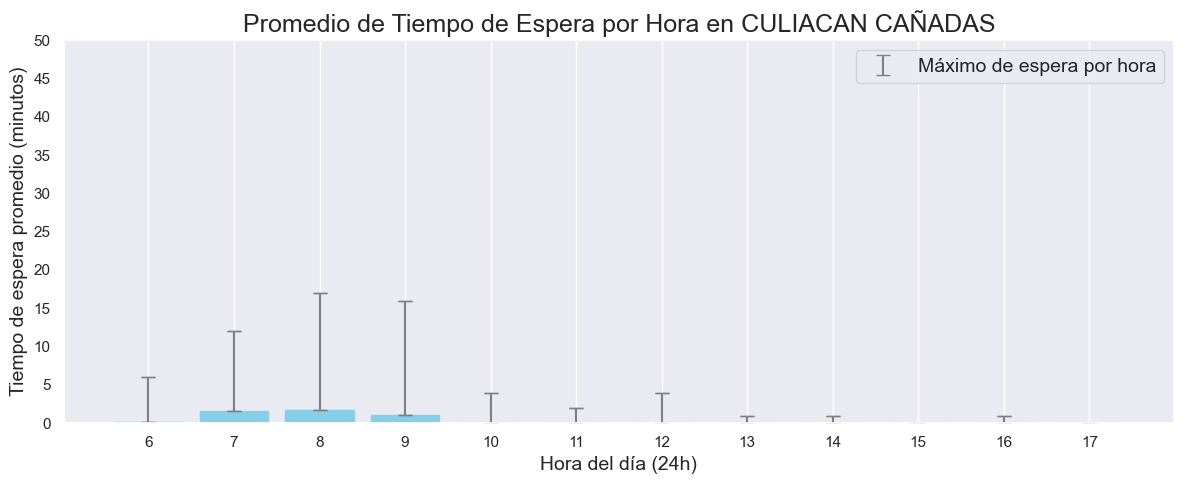

In [30]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN CAÑADAS", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 55, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCULCAN.png', dpi=300)

In [31]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 30])

0

In [33]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] >= 20])

0

In [22]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])

301

In [23]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] >= 25])

105

In [20]:
df2

,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,FechaHoraLLegada,Cajas,Prioridad
37332,437442,CULIACAN CAÑADAS,20240301,6,41692123,N006,Solicitar Estudios,06:29:05,06:38:23,9.30,2.620000,2024-03-01 06:29:05,3,0
37333,437458,CULIACAN CAÑADAS,20240301,6,41693739,P002,Triage,06:49:13,06:49:25,0.20,1.370000,2024-03-01 06:49:13,3,1
37334,437474,CULIACAN CAÑADAS,20240301,7,41696332,F001,Cotizacion,07:05:17,07:05:42,0.42,2.100000,2024-03-01 07:05:17,3,1
37335,437490,CULIACAN CAÑADAS,20240301,7,41701774,N041,Solicitar Estudios,07:21:39,07:36:43,15.07,3.518992,2024-03-01 07:21:39,3,1
37336,437506,CULIACAN CAÑADAS,20240301,7,41706287,N055,Solicitar Estudios,07:38:40,08:01:18,22.63,2.900000,2024-03-01 07:38:40,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58050,445616,CULIACAN CAÑADAS,20240327,12,43477567,P014,Triage,12:04:55,12:08:50,3.92,3.770000,2024-03-27 12:04:55,3,0
58051,445632,CULIACAN CAÑADAS,20240327,13,43481917,N148,Citados sin folio,13:08:34,13:08:38,0.07,1.430000,2024-03-27 13:08:34,3,0
58052,445648,CULIACAN CAÑADAS,20240327,13,43484867,C026,Citado,13:53:20,13:53:27,0.12,8.550000,2024-03-27 13:53:20,3,1
58053,445664,CULIACAN CAÑADAS,20240327,15,43488725,N161,Solicitar Estudios,15:02:08,15:02:17,0.15,3.518992,2024-03-27 15:02:08,3,1


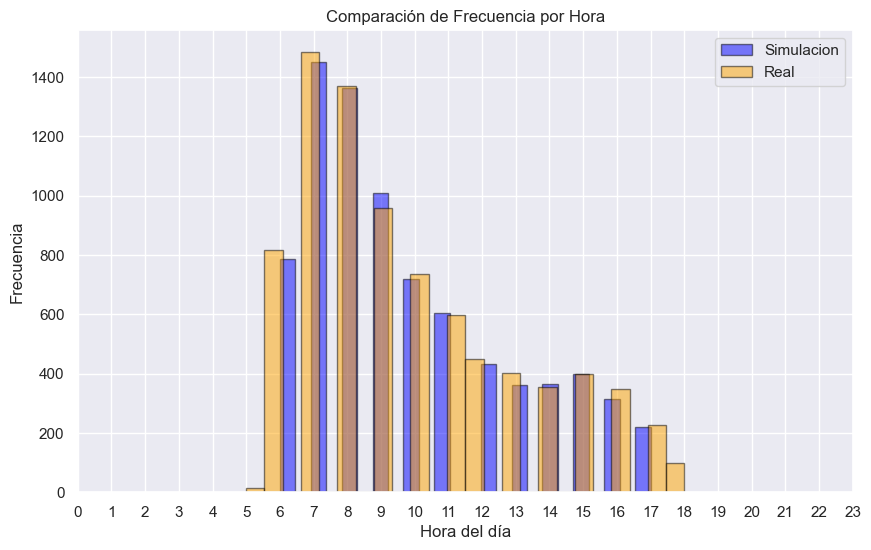

<Figure size 640x480 with 0 Axes>

In [28]:
df2 = df[df["Sucursal"]=="CULIACAN CAÑADAS"]
plt.figure(figsize=(10, 6))
plt.hist(df_simulacion_atencion['hora'], bins=24, alpha=0.5, label='Simulacion', color='blue', edgecolor='black')
plt.hist(df2['HoraLLegada'], bins=24, alpha=0.5, label='Real', color='orange', edgecolor='black')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencia por Hora')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


plt.tight_layout()

plt.savefig("numpacientes.png", dpi=300)

In [17]:
df[df["Sucursal"]=="CULIACAN"].shape

(12706, 14)

In [18]:
df[df["Sucursal"]=="CULIACAN CAÑADAS"].shape

(8257, 14)

In [19]:
df[df["Sucursal"]=="COYOACAN"].shape

(29025, 14)

In [40]:
dataframe = pd.read_csv('data/muestras_clean.csv')
print(dataframe.shape)
dataframe.head()

(59650, 14)


,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,FechaHoraLLegada,Cajas,Prioridad
0,316483,COYOACAN,20240301,6,41684208,N015,Solicitar Estudios,06:02:44,06:13:23,13.321135,3.518992,2024-03-01 06:02:44,10,1
1,316499,COYOACAN,20240301,6,41684414,N025,Solicitar Estudios,06:09:35,06:19:43,10.130000,3.518992,2024-03-01 06:09:35,10,0
2,316515,COYOACAN,20240301,6,41684824,N038,Solicitar Estudios,06:18:16,06:30:42,12.430000,3.518992,2024-03-01 06:18:16,10,0
3,316531,COYOACAN,20240301,6,41684679,P004,Triage,06:25:09,06:27:01,1.870000,3.518992,2024-03-01 06:25:09,10,1
4,316547,COYOACAN,20240301,6,41685173,C011,Citado,06:35:09,06:37:47,2.630000,3.518992,2024-03-01 06:35:09,10,0


In [41]:
cajas_por_sucursal = {
    'COYOACAN': 11,  # cambiado de 10 a 11
    'CULIACAN': 7,
    'CULIACAN CAÑADAS': 4,  # cambiado de 3 a 4
    'CULIACAN COLEGIO MILITAR': 4,
    'CULIACAN LA CONQUISTA': 5
}

# Asignar nueva columna
dataframe['Cajas'] = dataframe['Sucursal'].map(cajas_por_sucursal)

In [43]:
dataframe['Sucursal'].unique()

array(['COYOACAN', 'CULIACAN', 'CULIACAN CAÑADAS',
       'CULIACAN COLEGIO MILITAR', 'CULIACAN LA CONQUISTA'], dtype=object)